<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

#####***Install Some Packages***

In [1]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####***Import Basic Modules***

In [2]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
#import random
import yfinance as yf
from scipy import stats

#####***Import Extra Modules***

In [3]:
#from scipy import special as sp

#####***Import Porker***

In [4]:
!git clone https://github.com/georgemcredmond/BlackJackPython

Cloning into 'BlackJackPython'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), 53.56 KiB | 2.14 MiB/s, done.


In [5]:
class Poker:
    def __init__(self, num_players):
        self.num_players = num_players
        self.numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
        self.shapes = ['s', 'd', 'h', 'c'] # 무늬: 스페이드, 다이아몬드, 하트, 클로버
        self.cards = [number + shape for number in self.numbers for shape in self.shapes]
    def run(self):
        self.chosen_cards = random.sample(self.cards, 5*self.num_players)
    def display_cards(self):
        self.run()
        fig, axes = plt.subplots(self.num_players, 5, figsize=(5,self.num_players*1.5), squeeze=False) 
        for i in range(self.num_players):
            for j, five_card in enumerate(self.chosen_cards[i*5:(i+1)*5]):
                img = plt.imread(f'BlackJackPython/DECK/{five_card}.gif') 
                axes[i,j].imshow(img)
                axes[i,j].set_xticks([])
                axes[i,j].set_yticks([])
        plt.tight_layout
        plt.show()

#####***Import Monty, MontyStick, MontySwitch***

In [6]:
class Monty:    
    def __init__(self):
        self.doors = [0, 1, 2]
        self.car_position = random.choice(self.doors)
        self.first_choice = None
        self.host_choice = None
        self.final_choice = None
    def first_round(self):
        self.first_choice = int(input(f'Choose one from {self.doors} : '))
        print(f'You choose Door {self.first_choice} as your first choice.', end="\n\n")
    def host_round(self):
        host_list = [0, 1, 2]
        host_list.remove(self.car_position)
        try:
            host_list.remove(self.first_choice)
        except ValueError:
            pass
        self.host_choice = random.choice(host_list)
        print(f'Host open Door {self.host_choice} and show a goat.', end="\n\n")         
    def final_round(self):
        player_list = [0, 1, 2]
        player_list.remove(self.host_choice)
        self.final_choice = int(input(f'Choose one from {player_list} : '))
        print(f'You choose Door {self.final_choice} as your final choice.', end="\n\n")
    def open_final_round_door(self):
        print(f'Let\'s open Door {self.final_choice}.')
        if self.final_choice == self.car_position:
            print('Congrat! You have a brand new car!', end="\n\n")
        else:
            print('Sorry, you have a goat.', end="\n\n")   
    def run(self):
        self.first_round() 
        self.host_round()
        self.final_round()
        self.open_final_round_door()

class MontyStick:  
    def __init__(self):
        self.doors = [0, 1, 2]
        self.car_position = random.choice(self.doors)
        self.final_choice = random.choice(self.doors)
    def run(self):
        if self.final_choice == self.car_position:
            return 1
        else:
            return 0

class MontySwitch: 
    def __init__(self):
        self.doors = [0, 1, 2]
        self.car_position = random.choice(self.doors)
        self.final_choice = random.choice(self.doors)
    def run(self):
        if self.final_choice == self.car_position:
            return 0
        else:
            return 1

#####***import SimpleRandomWalk***





In [7]:
class SimpleRandomWalk:
    
    def run_MC(self, num_paths=1, num_steps=100, seed=None):
        """
        num_paths : number of paths to generate
        num_steps : number of coin flips to make a sample path
        seed      : seed of random number generator        
        """        
        if seed is not None:
            np.random.seed(seed)

        Z = np.random.standard_normal( ( num_paths, num_steps ) )
        C = np.ones_like(Z)
        C[Z<0] = -1

        SRW = np.zeros( ( num_paths, num_steps + 1 ) )
        t = np.arange( num_steps + 1 )
        for i in range( 1, num_steps + 1 ):
            SRW[:,i] = SRW[:,i-1] + C[:,i-1]
        return t, SRW

#####***import Coin, FancyCoin***





In [8]:
class Coin:
    def __init__(self, p=0.5):
        """
        p         : probability of head       
        """
        self.p = p
    
    def run_MC(self, num_paths=1, num_steps=100, seed=None):
        """
        num_paths : number of paths to generate
        num_steps : number of coin flips to make a sample path
        seed      : seed of random number generator        
        """        
        if seed is not None:
            np.random.seed(seed)

        return np.random.binomial( n=1, p=self.p, size=( num_paths, num_steps ) )

In [9]:
import PIL
import urllib

class FancyCoin:
    def __init__(self, p=0.5):
        """
        p         : probability of head       
        """
        self.p = p
    
    def run_MC(self, num_steps=5, seed=None):
        """
        num_steps : number of coin flips to make a sample path
        seed      : seed of random number generator        
        """        
        if seed is not None:
            np.random.seed(seed)

        url_head = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/US_Half_Dollar_Obverse_2015.png/154px-US_Half_Dollar_Obverse_2015.png"
        img_head = np.array(PIL.Image.open(urllib.request.urlopen(url_head)))

        url_tail = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/US_50_Cent_Rev.png/154px-US_50_Cent_Rev.png"
        img_tail = np.array(PIL.Image.open(urllib.request.urlopen(url_tail)))

        fig, axes = plt.subplots(nrows=1, ncols=num_steps, figsize=(3*num_steps,3))
        for i in range(num_steps):
            if np.random.uniform() > 1 - self.p:
                axes[i].imshow(img_head)
            else:
                axes[i].imshow(img_tail)
            axes[i].axis('off')
        plt.show()

#####***import GamblerRuin***





In [10]:
class GamblerRuin(Coin):
    def __init__(self, p=0.49, initial=100, goal=200):
        """
        p         : probability of head       
        """
        self.p = p
        self.q = 1 - self.p
        self.initial = initial
        self.goal = goal
        self.bankrupt = 0 
    
    def run_MC(self, num_paths=1, num_steps=100, seed=None, verbose=False):
        """
        num_paths : number of paths to generate
        num_steps : number of coin flips to make a sample path
        seed      : seed of random number generator        
        """       
        coin = 2 * super().run_MC(num_paths, num_steps, seed) - 1
        path = self.initial + np.concatenate([np.zeros((num_paths,1)),coin.cumsum(axis=1)],axis=1)
        gambler_ruin_result = np.zeros((num_paths,))
        for i in range(num_paths):
            for position in path[i]:
                if position == self.goal:
                    gambler_ruin_result[i] = 1
                    break
                    break
                if position == self.bankrupt:
                    gambler_ruin_result[i] = -1
                    break
                    break

        num_win = gambler_ruin_result[gambler_ruin_result==1].sum()
        num_loss = - gambler_ruin_result[gambler_ruin_result==-1].sum()
        prob_loss_simulation = num_loss / ( num_win + num_loss )
        if verbose: 
            print(f"{num_paths = }")
            print(f"{num_win = }")
            print(f"{num_loss = }")
            print(f"ruin probability by simulation : {prob_loss_simulation:.2%}")
        return path, gambler_ruin_result, num_paths, num_win, num_loss, prob_loss_simulation

    def compute_ruin_probability(self, verbose=False):
        # IQ = AQ + b
        I = np.eye(self.goal+1)
        A = self.p*np.eye(self.goal+1, k=1) + self.q*np.eye(self.goal+1, k=-1)
        A[0,1] = 0
        A[-1,-2] = 0
        b = np.zeros((self.goal+1,1))
        b[0,0] = 1

        Q = np.linalg.solve(I-A,b).reshape(self.goal+1)
        if verbose:
            print(f"Minimum initial capital with ruin probability less than half where {self.p = } : ", np.where(Q<=0.5)[0][0])
        return Q

#####***import Dice***





In [11]:
class Dice:   
    def run_MC(self, num_paths=1, num_steps=100, seed=None):
        """
        num_paths : number of paths to generate
        num_steps : number of coin flips to make a sample path
        seed      : seed of random number generator        
        """        
        if seed is not None:
            np.random.seed(seed)

        return np.random.randint( low=1, high=7, size=( num_paths, num_steps ) )

###***Chapter 1 Counting***

####***Section 1 Poker***

#####***Standard Poker Hand Rankings***

<img src="https://www.fgbradleys.com/images/poker_hands.gif">

Sorce [Standard Poker Hand Rankings](https://www.fgbradleys.com/et_poker.asp)

#####***Playing Poker***

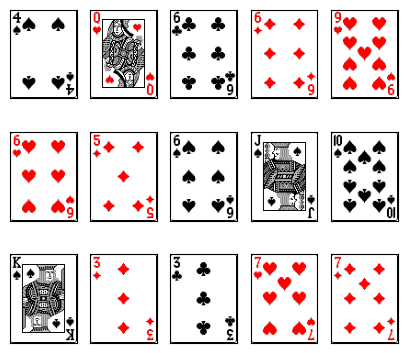

In [ ]:
def main():
    obj = Poker(3)
    obj.display_cards()

if __name__ == "__main__":
    main()

#####***Probability of Certain Cards***

In [ ]:
def main():
    p = 13 * sp.comb(4,3) * sp.comb(12,2) * 4 * 4 / sp.comb(52,5) # prob of triple
    print(p)

if __name__ == "__main__":
    main()

0.02112845138055222


In [ ]:
def main():
    p = (10 * 4**5 / sp.comb(52,5)) - (4 * 10 / sp.comb(52,5)) # prob of straight (must exclude stright flush prob)
    print(p)

if __name__ == "__main__":
    main()

0.0039246467817896395


In [ ]:
def main():
    p = (4 * sp.comb(13,5) / sp.comb(52,5)) - (4 * 10 / sp.comb(52,5)) # prob of flush (must exclude stright flush prob)
    print(p)

if __name__ == "__main__":
    main()

0.001965401545233478


In [ ]:
def main():
    p = (13 * sp.comb(4,3) * 12 * sp.comb(4,2)) / sp.comb(52,5) # prob of full house
    print(p)

if __name__ == "__main__":
    main()

0.0014405762304921968


In [ ]:
def main():
    p = (13 * (52-4)) / sp.comb(52,5) # prob of four of a kind
    print(p)

if __name__ == "__main__":
    main()

0.00024009603841536616


In [ ]:
def main():
    p = 4 * 10 / sp.comb(52,5) # prob of straight flush including royal straight flush
    print(p)

if __name__ == "__main__":
    main()

1.5390771693292702e-05


In [ ]:
def main():
    p = 4 / sp.comb(52,5) # prob of royal straight flush
    print(p)

if __name__ == "__main__":
    main()

1.5390771693292702e-06


####***Section 2 Counting***

######***Enumeration***



List all the cases in $\Omega$ and count them.

######***Divide and Conquer***

[Step 1] Divide all the cases into several disjoint categories $A_i$.

[Step 2] Count all the cases in each category $A_i$.

[Step 3] $|\Omega|=\sum_i|A_i|$.

<img src="https://qualityengineer.weebly.com/uploads/1/3/1/0/131059459/law-of-total-probability-venn-diagram_orig.png">

Sorce [TOTAL PROBABILITY LAW](https://qualityengineer.weebly.com/probability/total-probability-law)


######***Tree Diagram***

[Step 1] Divide all the cases into several disjoint categories $A_i$ using tree diagram.

[Step 2] Count all the cases in each category $A_i$.

[Step 3] $|\Omega|=\sum_i|A_i|$.

***Example - Number of paths from $A$ to $C$***

Count number of paths from $A$ to $C$, where there are paths from $A$ to $B$ and from $B$ to $C$ as follows:

<img src="https://github.com/SungchulLee/img/blob/main/%20Number%20of%20paths%20from%20$A$%20to%20$C$%201.png?raw=true">

***Solution***

***Branching of paths from $A$ to $B$***

<img src="https://github.com/SungchulLee/img/blob/main/%20Number%20of%20paths%20from%20$A$%20to%20$C$%202.png?raw=true">

***Branching of paths from $B$ to $C$***

<img src="https://github.com/SungchulLee/img/blob/main/%20Number%20of%20paths%20from%20$A$%20to%20$C$%203.png?raw=true">

***Tree diagram of paths from $A$ to $C$***

<img src="https://github.com/SungchulLee/img/blob/main/%20Number%20of%20paths%20from%20$A$%20to%20$C$%204.png?raw=true">

######***Functinal Relation***

***One-to-One***

<img src="https://github.com/SungchulLee/img/blob/main/one%20to%20one.png?raw=true">

***Many-to-One***

<img src="https://github.com/SungchulLee/img/blob/main/many-to-one.png?raw=true">

***One-to-Many***

<img src="https://github.com/SungchulLee/img/blob/main/many-to-one.png?raw=true">

***Many-to-Many***

<img src="https://s3.amazonaws.com/charitycdn/cache/resizedcrop-80e697b2afcab7cf735c50abfbce0136-840x480.jpg" width=30%>

Sorce [Pelé Signed Football - Limited Edition](https://www.charitystars.com/product/pele-signed-football-limited-edition)

######***Example - Number of words made from $BOB$***

***Example - Number of words made from $BOB$***

***Attach indices***

$$
\text{Number of words made from $B_1OB_2$}\quad\quad\quad\quad3\times 2\times 1=3!
$$

***Remove indices***

<img src="https://github.com/SungchulLee/img/blob/main/bob.png?raw=true">

This is 2-to-1.

***Many-to-one***

$$
\text{Number of words made from $BOB$}\quad\quad\quad\quad
\frac{3!}{2}
$$

***Example - umber of words made from $BBOOO$***

***Attach indices***

$$
\text{Number of words made from $B_1B_2O_1O_2O_3$}\quad\quad\quad\quad5!
$$

***Remove indices***

<img src="https://github.com/SungchulLee/img/blob/main/bbooo.png?raw=true">

This is (2!3!)-to-1.

***Many-to-one***

$$
\text{Number of words made from $BBOOO$}\quad\quad\quad\quad
\frac{5!}{2!3!}
$$

***Example - Permutation and combination***

***Number of choosing president, vice-president, secretary***

$$\begin{array}{lll}
&&\text{There are $n$ people}\\
&&\text{Choose president - Number of branching $n$}\\
&&\text{Choose vice-president - Number of branching $n-1$}\\
&&\text{Choose secretary - Number of branching $n-2$}\\
\text{Tree diagram}&\Rightarrow&\text{Number of choosing president, vice-president, secretary is}\\
&&n\times(n-1)\times(n-2)
\end{array}$$

***Number of choosing three committee members***

$$\begin{array}{lll}
&&\text{There are $n$ people}\\
&&\text{Choose president - Number of branching $n$}\\
&&\text{Choose vice-president - Number of branching $n-1$}\\
&&\text{Choose secretary - Number of branching $n-2$}\\
\text{Tree diagram}&\Rightarrow&\text{Number of choosing president, vice-president, secretary is}\\
&&n\times(n-1)\times(n-2)\\
&&\text{Remove rank or indices}\\
\text{$3!$-to-1}&\Rightarrow&\text{Number of choosing three committee members is}\\
&&\frac{n\times(n-1)\times(n-2)}{3!}
\end{array}$$

***Permutation ($n$ choose $k${\color{red}with order)***

The number of ways of choosing from $n$ people, $k$ people to form a committee of president, vice-president,$\cdots$, secretary is 
$$
n\times(n-1)\times(n-2)\cdots\times(n-(k-1))
$$

***Combination ($n$ choose $k$ without order)***

The number of ways of choosing from $n$ people, $k$ people to form a committee is 
$$
{n\choose k}=\frac{n!}{k!(n-k)!}
$$

######***Inclusion-Exclusion Principle***


$$\begin{array}{lll}
\left|\cup_{i=1}^nA_i\right|&=&\sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|+\cdots+(-1)^{n+1}\left|A_1A_2\cdots A_n\right|
\end{array}$$

***Example - Minesweeper***

<img src="https://github.com/SungchulLee/img/blob/main/Minesweeper%201.png?raw=true">

<img src="https://github.com/SungchulLee/img/blob/main/Minesweeper%202.png?raw=true">

***Inclusion-Exclusion Principle***

***Two Sets***

$$\begin{array}{lll}
\left|A\cup B\right|&\le& \left|A\right|+\left|B\right|\\
\left|A\cup B\right|&=& \left|A\right|+\left|B\right|-\left|A\cap B\right|
\end{array}$$

***Three Sets***

$$\begin{array}{lll}
\left|A\cup B\cup C\right|&\le& \left|A\right|+\left|B\right|+\left|C\right|\\
\left|A\cup B\cup C\right|&\ge& \left|A\right|+\left|B\right|+\left|C\right|-\left|AB\right|-\left|BC\right|-\left|CA\right|\\
\left|A\cup B\cup C\right|&=& \left|A\right|+\left|B\right|+\left|C\right|-\left|AB\right|-\left|BC\right|-\left|CA\right|+\left|ABC\right|
\end{array}$$

***Many Sets***

$$\begin{array}{lll}
\left|\cup_{i=1}^nA_i\right|&\le& \sum_{i=1}^n\left|A_i\right|\\
\left|\cup_{i=1}^nA_i\right|&\ge& \sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|\\
\left|\cup_{i=1}^nA_i\right|&\le& \sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|+\sum_{1\le i<j<k\le n}\left|A_iA_jA_k\right|\\
&&\cdots\\
\left|\cup_{i=1}^nA_i\right|&=&\sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|+\cdots+(-1)^{n+1}\left|A_1A_2\cdots A_n\right|
\end{array}$$

######***Example - Matching Problem***

For a bijective function $f$ on $\{1,2,\cdots,n\},$ 
$x$ is called a fixed point of $f$ if $f(x)=x$.
Count the number of the bijective functions $f$ on $\{1,2,\cdots,n\}$ with no fixed points.

***Solution***

$$\begin{array}{llll}
\Omega&\text{Set of all the bijective functions $f$ on $\{1,2,\cdots,n\}$}\\
\\
A_i&\text{Set of the bijective functions $f$  which fixes $i$}\\
\\
\cup_{i=1}^nA_i&\text{Set of the bijective functions $f$  which fixes some $i$}\\
\\
B=\Omega\setminus\cup_{i=1}^nA_i&\text{Set of the bijective functions $f$ with no fixed points}\\
\end{array}$$

***$\cup_iA_i\quad$ bijective functions that fix some $i$***

By the inclusion-exclusion principle  
$$\begin{array}{lll}
\left|\cup_{i=1}^nA_i\right|
&=&\sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|+\cdots+(-1)^{n+1}\left|A_1A_2\cdots A_n\right|\\
&=&{n\choose 1}\times (n-1)!-{n\choose 2}\times (n-2)!+\cdots+(-1)^{n+1}{n\choose n}\times (n-n)!\\
&=&n!\left(\frac{1}{1!}-\frac{1}{2!}+\cdots+(-1)^{n+1}\frac{1}{n!}\right)
\end{array}$$

***$B=\Omega\setminus\cup_{i=1}^nA_i\quad$ bijective functions with no fixed points***

$$
|B|=|\Omega|-\left|\cup_{i=1}^nA_i\right|
=n!-\left(1-\frac{1}{1!}+\frac{1}{2!}-\cdots+(-1)^{n}\frac{1}{n!}\right)
$$

######***Complement***


$$|A|=|\Omega|-|A^c|$$

######***Two Different Ways of Counting***

***Example - Number of ways of forming a committee of size $k$ from $n$ people***

$$\begin{array}{llc}
\text{Choose $k$ people without order and form a committee}&&\displaystyle {n\choose k}\\
\\
\text{Choose $n-k$ people without order and remove them}&&\displaystyle {n\choose n-k}\\
\text{Form a committee with remaining $k$ people}&&\\
\end{array}$$

$${n\choose k}={n\choose n-k}$$

***Example - Number of ways of forming a committee of size $k$ with president from $n$ people***

$$\begin{array}{llc}
\text{Choose $k$ people without order and form a committee}&&\displaystyle {n\choose k}\\
\text{Elect one as president from $k$ members}&&\displaystyle k{n\choose k}\\
\\
\text{Elect one as president from $n$ people}&&\displaystyle n\\
\text{Choose remaining $k-1$ members to form a committee}&&\displaystyle n{n-1\choose k-1}\\
\end{array}$$

$$k {n\choose k}=n{n-1\choose k-1}$$





***Example - Number of ways of forming a committee of size $k$ from $m$ men and $n$ women***

$$\begin{array}{llc}
\text{Choose $k$ people and form a committee}&&\displaystyle {m+n\choose k}\\
\\
\text{Choose $l$ male, $k-l$ female, form a committee }&&\displaystyle {m\choose l}{n\choose k-l}\\
\text{Choose male, female, and form a committee}&&\displaystyle \sum_{max(0,k-n)\le l\le min(m,k)}{m\choose l}{n\choose k-l}\\
\end{array}$$

$$
\text{Vandermonde's identity}\quad\quad\quad\quad
{m+n\choose k}=\sum_{max(0,k-n)\le l\le min(m,k)}{m\choose l}{n\choose k-l}$$

######***Binomial Expansion***

***Binomial Expansion***

$$
(x+y)^n=\sum_{k=0}^n{n\choose k}x^ky^{n-k}
$$
where
$$
\text{Binomial coefficient}\quad\quad\quad\quad
{n\choose k}=\frac{n!}{k!(n-k)!}
$$

***Multinomial Expansion***

$$
(x_1+\cdots+x_m)^n=\sum_{k_1+\cdots+k_m=n}{n\choose k_1 \cdots k_m}x_1^{k_1}\cdots x_m^{k_m}
$$
where
$$
\text{Multinomial coefficient}\quad\quad\quad\quad
{n\choose k_1 \cdots k_m}=\frac{n!}{k_1! \cdots k_m!}
$$

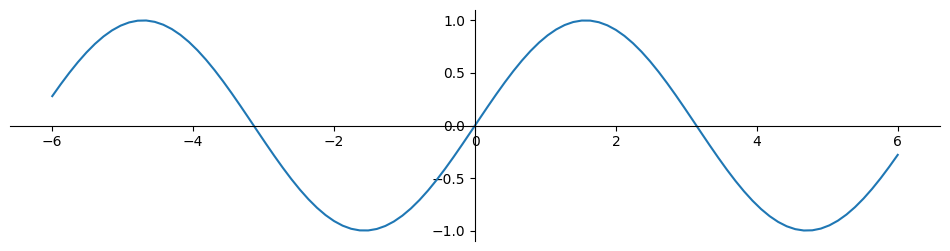

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-6,6,100)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x,y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
plt.show()

###***Chapter 2 Probability***

####***Section 1 Probability Measure***

#####***Sample***



Possible outcome $\omega$ of an experiment is a sample.

#####***Sample Space***



Collect all samples.
The set $\Omega$ of all samples is a sample space.

#####***Event***



Collect all samples of interest.
Technically this is a subset of $\Omega$. 
Any subset $A$ of $\Omega$ is an event.

#####***Probability Measure (Intuition)***



For each $\omega$ in $\Omega$
we attach a brick. 
Each brick may has different weights, but
the total weights of the bricks is 1.
This weight distribution over the sample space $\Omega$ is
a probability measure.

\begin{eqnarray}
P(\omega)&=&\mbox{Weight of the brick attached to $\omega$}\nonumber\\
P(A)&=&\sum_{\omega\in A}P(\omega)=\mbox{Weight of the bricks attached to $A$}\nonumber
\end{eqnarray}

#####***Probability Measure (Mathematical Definition)***











A probability measure $P$ is in a nutshell a real-valued function defined on events $A$:

$$
A\ \ \stackrel{P}{\rightarrow}\ \ P(A)
$$

More precisely, a probability measure $P$  is a real-valued function defined on events $A$ which satisfies the following three

$$\begin{array}{llll}
(1)&&\displaystyle P(\Omega)=1,\ P(\emptyset)=0\nonumber\\
\\
(2)&&\displaystyle 0\le P(A)\le 1\nonumber\\
\\
(3)&&\displaystyle P\left(\cup_{i=1}^{\infty}A_i\right)=\sum_{i=1}^{\infty}P\left(A_i\right)\quad\mbox{for any disjoint events $A_i$}\nonumber
\end{array}$$

####***Section 2 Equally Likely Probability Measure***

#####***Equally Likely Probability Measure***

\begin{eqnarray}
P(\omega)&=&\frac{1}{|\Omega|}\nonumber\\
P(A)&=&\frac{|A|}{|\Omega|}\nonumber
\end{eqnarray}

#####***Example - Flip a Fair Coin Three Times***



$$
P(HHH)=P(HHT)=\cdots=P(TTT)=\frac{1}{8}
$$

<img src="https://github.com/SungchulLee/img/blob/main/three%20coin%20flips.png?raw=true">

#####***Example - Probability of Full House***

The number $|\Omega|$ of ways of choosing 5 cards simultaneously is 
$$\Omega={52 \choose 5}$$
To choose a particular full house
$$\begin{array}{ll}
\mbox{decide the rank of the three equal-rank cards}&\mbox{13 choices}\\
\mbox{pick the suits of the three equal-rank cards}&\mbox{${4\choose 3}$ choices}\\
\mbox{determine the rank of the two equal-rank cards}&\mbox{12 choices}\\
\mbox{choose the suits of the two equal-rank cards}&\mbox{${4\choose 2}$ choices}\\
\end{array}$$
So, the number $|A|$ of ways of choosing a full house is   
$$|A|=13\cdot {4\choose 3}\cdot 12 \cdot {4\choose 2}$$
and 
the probability $P(A)$ that  we have full house is
$$
P(A)=\frac{|A|}{|\Omega|}=\frac{13\cdot {4\choose 3}\cdot 12 \cdot {4\choose 2}}{{52 \choose 5}}
$$

<img src="https://cdn-bpfni.nitrocdn.com/ATMRaIwpoDqKcTxjvUInsOfGfTdpynOR/assets/images/optimized/rev-ee28132/wp-content/uploads/2020/06/Full-House-600x400.jpg">

Sorce [Why Does a Full House Beat a Flush or a Straight?](https://www.colourbox.com/image/poker-cards-showing-full-house-hand-isolated-on-black-background-with-vignette-effect-image-30530214)

####***Section 3 Simulation***

#####***Smirnov Transform - Coin Flip***

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Generalized_inversion_method.svg/720px-Generalized_inversion_method.svg.png" width=30%>

[Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

$$
\displaystyle
X=F^{-1}(U)
$$

In [ ]:
def main():
    n = 10 # number_of_coin_flips
    p = 0.5 # probability_of_head

    c = np.zeros(n) # coin outcomes
    u = np.random.rand(n) # uniform random variables
    c[u>1-p] = 1 # coin flips using boolean masking

    # check the smirnov transform, relation between u and c
    # if ui <= 1-p, then ci = 0
    # if ui > 1-p, then ci = 1
    for ui, ci in zip(u,c):
        print(f"{ui = :.3}, {ui>1-p = }, {ci = }") 

if __name__ == "__main__":
    main()

ui = 0.447, ui>1-p = False, ci = 0.0
ui = 0.846, ui>1-p = True, ci = 1.0
ui = 0.699, ui>1-p = True, ci = 1.0
ui = 0.297, ui>1-p = False, ci = 0.0
ui = 0.814, ui>1-p = True, ci = 1.0
ui = 0.397, ui>1-p = False, ci = 0.0
ui = 0.881, ui>1-p = True, ci = 1.0
ui = 0.581, ui>1-p = True, ci = 1.0
ui = 0.882, ui>1-p = True, ci = 1.0
ui = 0.693, ui>1-p = True, ci = 1.0


#####***Simulation Ideas - Coin Flip*** [한국어](https://www.youtube.com/watch?v=A1u3LOPNOIo&list=PLXziV1DL41oieG80C_rv4ITBcOm7KqFf4)

In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using for loop
    for i in range(n):
        if np.random.uniform() > 1 - p: 
            print("H", end=' ')
        else:
            print("T", end=' ')
    print("\n\n")

if __name__ == "__main__":
    main()

H H H H T H T H H T H H H H T T T H H H H H T H T H T H H T 




In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using list append method
    coin = []
    for i in range(n):
        if np.random.uniform() > 1 - p:
            coin.append("H")
        else:
            coin.append("T")
    print(coin, end="\n\n")

if __name__ == "__main__":
    main()

['T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T']



In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using list comprehension
    uniform = np.random.uniform(size=(n,)) 
    coin = ['H' if (x > 1 - p) else 'T' for x in uniform]
    print(coin, end="\n\n")

if __name__ == "__main__":
    main()

['T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'H']



In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using vectorization
    uniform = np.random.uniform(size=(n,))
    coin = np.zeros_like(uniform)
    coin[uniform > 1-p] = 1.
    print(coin)

if __name__ == "__main__":
    main()

[0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1.]


#####***Simulation - Coin Flip***

In [14]:
def main():
    obj = Coin()
    print(obj.run_MC(num_steps=5, seed=1))

if __name__ == "__main__":
    main()

[[0 1 0 0 0]]


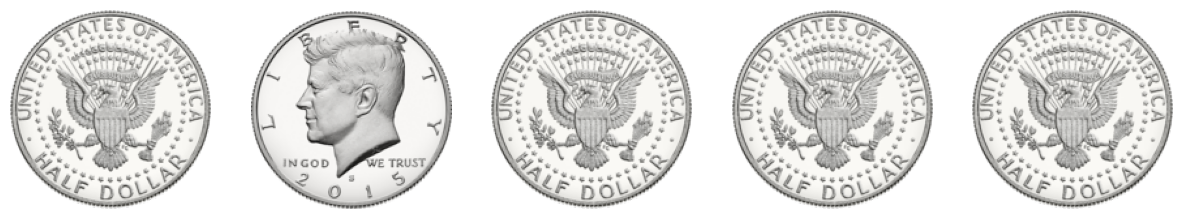

In [15]:
def main():
    obj = FancyCoin()
    obj.run_MC(num_steps=5, seed=1)

if __name__ == "__main__":
    main()

#####***Simulation - Dice***

In [ ]:
def main():
    dice = Dice()
    print(dice.run_MC())

if __name__ == "__main__":
    main()

[[6 3 4 3 4 6 1 1 1 4 1 3 3 1 5 4 5 6 1 5 4 6 4 5 6 2 6 4 1 1 1 6 6 2 1 5
  2 6 6 4 2 1 1 5 4 4 2 6 6 1 1 2 3 1 4 6 2 2 5 1 6 1 4 3 4 3 5 4 6 6 4 1
  4 1 5 3 4 6 6 5 1 3 4 4 2 6 4 5 6 6 4 4 2 2 2 4 3 3 5 4]]


####***Section 4 Properties of Probability Measure***

#####***Properties (4), (5), (6) of Probability Measure***

$$\begin{array}{llll}
(4)&&\displaystyle P\left(\cup_{i=1}^{n}A_i\right)=\sum_{i=1}^{n}P\left(A_i\right)\quad\mbox{for any disjoint events  $A_i$}\nonumber\\
\\
(5)&&\displaystyle P(A)\le P(B)\quad\mbox{for $A\subset B$}\nonumber\\
\\
(6)&&\displaystyle P(A)=1-P(A^c)\nonumber
\end{array}$$

####***Section 5 Inclusion-Exclusion Principle***

#####***Two events***


\begin{eqnarray}
(7)\quad P(A\cup B)&\le& P(A)+P(B)\nonumber\\
(7)\quad P(A\cup B)&=&P(A)+P(B)-P(A\cap B)\nonumber
\end{eqnarray}

#####***Three events***


\begin{eqnarray}
(7)\ P(A\cup B\cup C)&\le& P(A)+P(B)+P(C)\nonumber\\
(7)\ P(A\cup B\cup C)&\ge& P(A)+P(B)+P(C)-P(AB)-P(BC)-P(CA)\nonumber\\
(7)\ P(A\cup B\cup C)&=&P(A)+\cdots-P(AB)-\cdots+P(ABC)\nonumber
\end{eqnarray}

#####***Many events***


\begin{eqnarray}
(7)\quad P(\cup_{i=1}^nA_i)&\le& \sum_{i=1}^nP(A_i)\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&\ge& \sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&\le& \sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)+\sum_{1\le i<j<k\le n}P(A_iA_jA_k)\nonumber\\
&&\cdots\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&=&\sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)+\cdots+(-1)^{n+1}P(A_1A_2\cdots A_n)\nonumber
\end{eqnarray}

#####***Names***








$$\begin{array}{ll}
\mbox{First inequalities}&\mbox{Boole's inequality}\\
\mbox{All inequalities}&\mbox{Bonferroni's inequality}\\
\mbox{Last equalities}&\mbox{Inclusion-exclusion principle}
\end{array}$$

####***Section 6 Examples***

#####***Example - Newton-Pepys Problem (1693)***

Which of the following three has the greatest chance of success?
\begin{eqnarray}
A&&\mbox{Six fair dice are tossed independently and at least one 6 appears.}\nonumber\\
B&&\mbox{Twelve fair dice are tossed independently and at least two 6 appear.}\nonumber\\
C&&\mbox{Eighteen fair dice are tossed independently and at least three 6 appear.}\nonumber
\end{eqnarray}
Pepys initially thought $C$ had the highest probability, 
but Newton showed $A$ has.

***Solution***

***$P(A)$***
$$
|\Omega_A|=6^6,\quad |A^c|=5^6
\quad\Rightarrow\quad
P(A)=1-P(A^c)=1-\frac{5^6}{6^6}=0.6651
$$

***$P(B)$***
$$\begin{array}{ll}
\mbox{Number of twelve fair dice toss outcomes}&\displaystyle |\Omega_B|=6^{12}\nonumber\\
\mbox{Number of outcomes with no 6}&\displaystyle |B_0|=5^{12}\nonumber\\
\mbox{Number of outcomes with exactly one 6}&\displaystyle |B_1|={12\choose 1}\times 1\times 5^{11}\nonumber
\end{array}$$
$$
\Rightarrow\quad
P(B)=1-P(B_0)-P(B_1)=1-\frac{5^{12}}{6^{12}}-\frac{{12\choose 1}5^{11}}{6^{12}}
=0.6187
$$

***$P(C)$***
$$\begin{array}{ll}
\mbox{Number of eighteen fair dice toss outcomes}&\displaystyle |\Omega_C|=6^{18}\nonumber\\
\mbox{Number of outcomes with no 6}&\displaystyle |C_0|=5^{18}\nonumber\\
\mbox{Number of outcomes with exactly one 6}&\displaystyle |C_1|={18\choose 1}\times 1\times 5^{17}\nonumber\\
\mbox{Number of outcomes with exactly two 6}&\displaystyle |C_2|={18\choose 2}\times 1\times 1\times 5^{16}\nonumber
\end{array}$$
$$
\Rightarrow\quad
P(C)=1-P(C_0)-P(C_1)-P(C_2)
=
1-\frac{5^{18}}{6^{18}}-\frac{{18\choose 1}5^{17}}{6^{18}}
-\frac{{18\choose 2}5^{16}}{6^{18}}
=0.5973
$$

#####***Bertrand's Ballot Theorem (1887)***

During the election
$A$ wins against $B$,
where
$A$ receives $a$ votes and $B$ receives $b$ votes with $a > b$. 
The probability $P(A)$ that $A$ will be strictly ahead of $B$ throughout the count is
$$\frac{a-b}{a+b}$$

######***Proof***


$$\begin{array}{ll}
\mbox{Number of count patterns}&\displaystyle |\Omega|={a+b \choose b}\nonumber\\
\mbox{Number of count patterns staring with $B$}&\displaystyle |B_1|={a+b-1 \choose b-1}\nonumber\\
\mbox{Number of count patterns staring with $A$ but}\nonumber\\
\mbox{failing to be strictly ahead of $B$ all the time}&\displaystyle |B_2|=|B_1|={a+b-1 \choose b-1}\nonumber\\
\mbox{Number of count patterns staring with $A$ and}\\
\mbox{being strictly ahead of $B$ all the time}&\displaystyle |A|=|\Omega|-|B_1|-|B_2|\nonumber
\end{array}$$

Therefore,

$$
\displaystyle
P(A)=1-P(B_1)-P(B_2)
=1-\frac{{a+b-1 \choose b-1}}{{a+b \choose b}}-\frac{{a+b-1 \choose b-1}}{{a+b \choose b}}
=\frac{a-b}{a+b}
$$

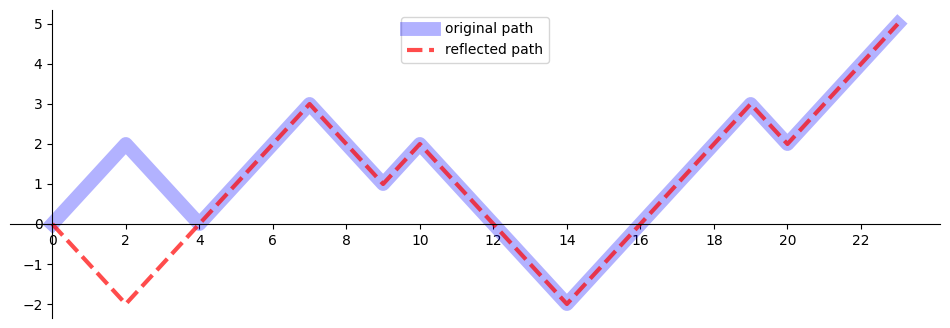

In [ ]:
import matplotlib.pyplot as plt

lst = [0,1,2,1,0,1,2,3,2,1,2,1,0,-1,-2,-1,0,1,2,3,2,3,4,5]
lst_reflected = [0,-1,-2,-1,0,1,2,3,2,1,2,1,0,-1,-2,-1,0,1,2,3,2,3,4,5]
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(range(len(lst)),lst,'-b',lw=10,ms=10,alpha=0.3,label='original path')
ax.plot(range(len(lst)),lst_reflected,'--r',lw=3,ms=10,alpha=0.7,label='reflected path')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22])
ax.legend(loc='upper center')
plt.show()

#####***Example - Urn Problems***

An urn contains 23 balls: 8 white, 6 blue, and 9 red.  We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:

$A$: all balls are red

$B$: 3 are blue, 2 are white, and 1 is red

$C$: exactly 4 balls are white

***Solution***
$$\begin{array}{lll}
P(A)&=&\frac{{9\choose 6}}{{23\choose 6}}=0.000832119825255\\
P(B)&=&\frac{{8\choose 2}{6\choose 3}{9\choose 1}}{{23\choose 6}}=0.0499271895153\\
P(C)&=&\frac{{8\choose 4}{15\choose 2}}{{23\choose 6}}=0.0728104847098\\
\end{array}$$

#####***Example - Matching Problem***

For a bijective function $f$ on $\{1,2,\cdots,n\},$ 
$x$ is called a fixed point of $f$ if $f(x)=x$.
Count the number of the bijective functions $f$ on $\{1,2,\cdots,n\}$ with no fixed points.

***Solution***
$$\begin{array}{llll}
\Omega&\mbox{Set of all the bijective functions $f$ on $\{1,2,\cdots,n\}$}\\
\\
A_i&\mbox{Set of the bijective functions $f$  which fixes $i$}\\
\\
A=\cup_{i=1}^nA_i&\mbox{Set of the bijective functions $f$  which fixes some $i$}\\
\\
B=\Omega\setminus\cup_{i=1}^nA_i&\mbox{Set of the bijective functions $f$ with no fixed points}\\
\end{array}$$

***$A=\cup_iA_i$ bijective functions that fix some $i$***

By the inclusion-exclusion principle  
\begin{eqnarray}
\left|\cup_{i=1}^nA_i\right|
&=&\sum_{i=1}^n\left|A_i\right|-\sum_{1\le i<j\le n}\left|A_iA_j\right|+\cdots+(-1)^{n+1}\left|A_1A_2\cdots A_n\right|\nonumber\\
&=&{n\choose 1}\times (n-1)!-{n\choose 2}\times (n-2)!+\cdots+(-1)^{n+1}{n\choose n}\times (n-n)!\nonumber\\
&=&n!\left(\frac{1}{1!}-\frac{1}{2!}+\cdots+(-1)^{n+1}\frac{1}{n!}\right)\nonumber
\end{eqnarray}

***$B=\Omega\setminus\cup_{i=1}^nA_i$ bijective functions with no fixed points***
$$
|B|=|\Omega|-\left|\cup_{i=1}^nA_i\right|
=n!-n!\left(\frac{1}{1!}-\frac{1}{2!}+\cdots+(-1)^{n+1}\frac{1}{n!}\right)
=n!\left(1-\frac{1}{1!}+\frac{1}{2!}-\cdots+(-1)^{n}\frac{1}{n!}\right)
$$

Therefore,

$$
\displaystyle
\mathbb{P}\left(B\right)=\frac{|B|}{|\Omega|}=1-\frac{1}{1!}+\frac{1}{2!}-\cdots+(-1)^{n}\frac{1}{n!}\sim e^{-1}
$$

###***Chapter 3 Conditional Probability***

###### ***Conditional Probability***

***Definition***
$$
P(B|A)=\frac{P(AB)}{P(A)}
$$

###### ***Chain Rule***

$$\begin{array}{lll}
P(AB)&=&P(A)P(B|A)\\
\\
P(ABC)&=&P(A)P(B|A)P(C|AB)\\
\\
P(ABCD)&=&P(A)P(B|A)P(C|AB)P(D|ABC)\\
\\
\vdots&=&\vdots\\
\end{array}$$

###### ***Bayes' Rule***

$$
P({\color{red}B}|{\color{red}A})=\frac{P({\color{red}A}|{\color{red}B})P(B)}{P(A)}
$$

###### ***Total Probability Law***

If $\Omega=\cup_{k=1}^nB_k$ disjointly or if  $A=\cup_{k=1}^nAB_k$ disjointly,
$$P(A)=\sum_{k=1}^nP(AB_k)=\sum_{k=1}^nP(B_k)P(A|B_k)$$


<img src="https://qualityengineer.weebly.com/uploads/1/3/1/0/131059459/law-of-total-probability-venn-diagram_orig.png">

Sorce [TOTAL PROBABILITY LAW](https://qualityengineer.weebly.com/probability/total-probability-law)

###### ***Bayes' Rule + Total Probability Law***

If $\Omega=\cup_{k=1}^nB_k$ disjointly or if $A=\cup_{k=1}^nAB_k$ disjointly, then 
$$
P({\color{red}B}_{\color{red}1}|{\color{red}A})
\stackrel{\mbox{Bayes}}{=}
\frac{P({\color{red}A}|{\color{red}B}_{\color{red}1})P(B_1)}{P(A)}
\stackrel{\mbox{TPL}}{=}
\frac{P(B_1)P(A|B_1)}{\sum_{k=1}^nP(B_k)P(A|B_k)}
$$

###### ***Conditional Probability as Probability Measure***

Conditional probability $P(\cdot |B)$ is also a probability measure
and hence it satisfies all the equalities and inequalities that the usual probability measure $P(\cdot)$ satisfies.
You just need to add ${\color{red}|}{\color{red}B}$ at the end of the equalities and inequalities before the right end parenthesis.

\begin{eqnarray}
(1)&&P(\Omega{\color{red}|}{\color{red}B})=1,\ P(\emptyset{\color{red}|}{\color{red}B})=0\nonumber\\
\nonumber\\
(2)&&0\le P(A{\color{red}|}{\color{red}B})\le 1    \ \ \ \ \ \mbox{for any event $A$}\nonumber\\
\nonumber\\
(3)&&P(\cup_{i=1}^{\infty}A_i{\color{red}|}{\color{red}B})=\sum_{i=1}^{\infty}P(A_i{\color{red}|}{\color{red}B})
\  \mbox{for disjoint $A_i$}\nonumber\\
\nonumber\\
(4)&&P(\cup_{i=1}^{n}A_i{\color{red}|}{\color{red}B})=\sum_{i=1}^{n}P(A_i{\color{red}|}{\color{red}B})
\  \mbox{for disjoint $A_i$}\nonumber\\
\nonumber\\
(5)&&P(A_1{\color{red}|}{\color{red}B})\le P(A_2{\color{red}|}{\color{red}B})
\ \ \ \ \ \mbox{for $A_1\subset A_2$}\nonumber\\
\nonumber\\
(6)&&P(A^c{\color{red}|}{\color{red}B})=1-P(A{\color{red}|}{\color{red}B})\nonumber\\
\nonumber\\
(7)&&P(\cup_{i=1}^nA_i{\color{red}|}{\color{red}B})\le \sum_{i=1}^nP(A_i{\color{red}|}{\color{red}B})\nonumber\\
\nonumber\\
(7)&&P(\cup_{i=1}^nA_i{\color{red}|}{\color{red}B})\ge \sum_{i=1}^nP(A_i{\color{red}|}{\color{red}B})-\sum_{1\le i<j\le n}P(A_iA_j{\color{red}|}{\color{red}B})\nonumber\\
\nonumber\\
(7)&&P(\cup_{i=1}^nA_i{\color{red}|}{\color{red}B})\le \sum_{i=1}^nP(A_i{\color{red}|}{\color{red}B})-\sum_{1\le i<j\le n}P(A_iA_j{\color{red}|}{\color{red}B})+\sum_{1\le i<j<k\le n}P(A_iA_jA_k{\color{red}|}{\color{red}B})\nonumber\\
&&\cdots\nonumber\\
(7)&&P(\cup_{i=1}^nA_i{\color{red}|}{\color{red}B})=\sum_{i=1}^nP(A_i{\color{red}|}{\color{red}B})-\cdots+(-1)^{n+1}P(A_1A_2\cdots A_n{\color{red}|}{\color{red}B})\nonumber
\end{eqnarray}

###### ***Example - Double Ace***

We choose two cards from the ordinary 52 cards deck.
$$\begin{array}{lll}
A\ &&\mbox{An ace is chosen}\nonumber\\
A_1&&\mbox{Spade ace is chosen}\nonumber\\
B\ &&\mbox{Both cards are aces}\nonumber
\end{array}$$
Guess which one is larger among the two, $P(B|A)$ and $P(B|A_1)$.
Compute $P(B|A)$ and $P(B|A_1)$.

<img src="https://www.businesstoday.com.my/wp-content/uploads/2020/10/aces.jpg">

Sorce [Five aces to overcoming the pandemic for CMOs](https://www.businesstoday.com.my/2020/10/31/five-aces-to-overcoming-the-pandemic-for-cmos/)

***Solution***

***Computation of $P(B|A_1)$***

Suppose that the spade ace is chosen.
Then, there are 51 cards left and among these 51 cards
we will chose one cards.
To have both aces
we have to choose diamond, heart, or club ace.
So, 
$$\displaystyle P(B|A_1)=\frac{3}{51}=0.0588$$

***Computation of $P(B|A)$***

$$
\displaystyle
P(B|A)=P(A|B)\frac{P(B)}{P(A)}=\frac{P(B)}{P(A)}=\frac{P(B)}{1-P(A^c)}=\frac{\frac{{4\choose 2}}{{52\choose 2}}}{1-\frac{{48\choose 2}}{{52\choose 2}}}=0.0303
$$

######***Example - Birthday Problem***

***US Birthday Data***

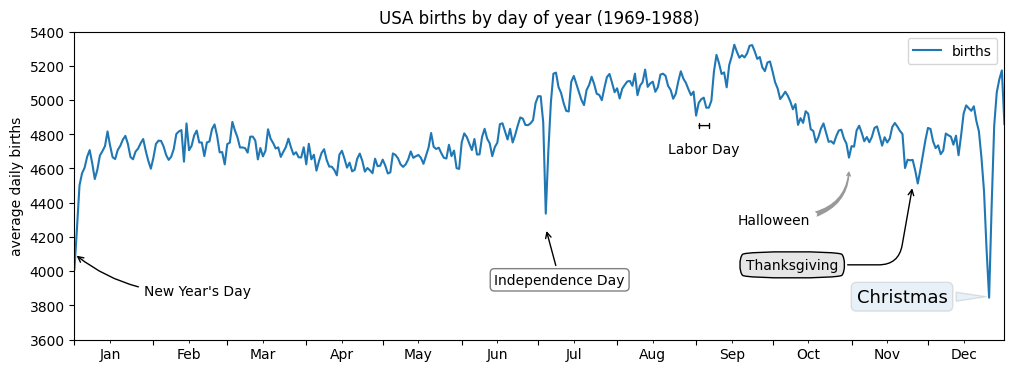

In [ ]:
from datetime import datetime

def main():
    # download us birthday data
    url = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'
    births = pd.read_csv(url) # (15547,5)

    # drop outliers
    quartiles = np.percentile(births['births'], [25, 50, 75])
    median, iqr = quartiles[1], (quartiles[2] - quartiles[0])
    births = births.query('(births > @median - 3.7 * @iqr) & (births < @median + 3.7 * @iqr)') # (14610,5)

    # make index
    births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

    births_by_date = births.pivot_table('births', [births.index.month, births.index.day]) # (366,1)

    # make index
    births_by_date.index = [datetime(2012, month, day)
                            for (month, day) in births_by_date.index]

    fig, ax = plt.subplots(figsize=(12, 4))
    births_by_date.plot(ax=ax)

    # Add labels to the plot
    ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
                xytext=(50, -30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=-0.2"))

    ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
                bbox=dict(boxstyle="round", fc="none", ec="gray"),
                xytext=(10, -40), textcoords='offset points', ha='center',
                arrowprops=dict(arrowstyle="->"))

    ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
                xytext=(0, -20), textcoords='offset points')
    ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
                xycoords='data', textcoords='data',
                arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

    ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
                xytext=(-80, -40), textcoords='offset points',
                arrowprops=dict(arrowstyle="fancy",
                                fc="0.6", ec="none",
                                connectionstyle="angle3,angleA=0,angleB=-90"))

    ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
                xytext=(-120, -60), textcoords='offset points',
                bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle,angleA=0,angleB=80,rad=20"))


    ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
                xytext=(-30, 0), textcoords='offset points',
                size=13, ha='right', va="center",
                bbox=dict(boxstyle="round", alpha=0.1),
                arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

    # Label the axes
    ax.set(title='USA births by day of year (1969-1988)',
        ylabel='average daily births')

    # Format the x axis with centered month labels
    ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
    ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

    ax.set_ylim(3600, 5400)

    plt.show()

if __name__ == "__main__":
    main()

***Example - Birthday Problem***

Let $p(n)$ be the probability that  there is at least one birthday match among $n$ people.
Find the minimum number $n$ of people 
that $p(n)$ is over 50%.

***Solution***

Let $B_k$ be the event that first $k$ people have all different birthdays.
Then, by the chain rule we have

\begin{eqnarray}
\displaystyle 
1-p(n)
&=&\displaystyle P(B_1B_2B_3\cdots B_n)\nonumber\\
&=&\displaystyle P(B_1)P(B_2|B_1)P(B_3|B_1B_2)\cdots P(B_n|B_1B_2\cdots B_{n-1})\nonumber\\
&=&\displaystyle P(B_1)P(B_2|B_1)P(B_3|B_2)\cdots P(B_n|B_{n-1})\nonumber\\
&=&\displaystyle (1)\left(\frac{364}{365}\right)\left(\frac{363}{365}\right)\cdots \left(\frac{(365-(n-1)}{365}\right)\nonumber\\
&=&\displaystyle (1)\left(1-\frac{1}{365}\right)\left(1-\frac{2}{365}\right)\cdots \left(1-\frac{n-1}{365}\right)\nonumber\\
&\approx&\displaystyle e^{-\frac{1}{365}}e^{-\frac{2}{365}}\cdots e^{-\frac{n-1}{365}}=e^{-\frac{n(n-1)}{2\times365}}\nonumber
\end{eqnarray}

$$
\displaystyle 
e^{-\frac{n(n-1)}{2\times365}}=0.5
\quad\Rightarrow\quad
n\approx 23
$$

\begin{array}{ccc}\hline
p(22)&p(23)&p(24)\\\hline
0.4757&0.5073&0.5383\\\hline
\end{array}

Smallest number of people with bithday matching prob more than half : 23


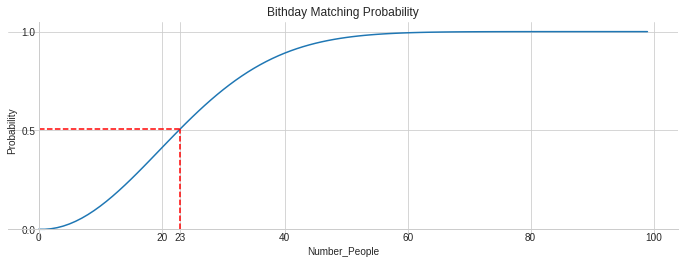

In [ ]:
def main():
    # probability_B[k] - probability that first k  people have all different birthdays
    probability_B = np.zeros(100)
    for k in range(100):
        if (k==0) or (k==1):
            probability_B[k] = 1
        else:
            probability_B[k] = probability_B[k-1] * (1-((k-1)/365)) 

    # probability_A[k] - probability that there is birthday match among first k
    probability_A = 1 - probability_B

    # Smallest number of people with bithday matching prob more than half
    n_small = np.where(probability_A>=0.5)[0][0]
    print(f"Smallest number of people with bithday matching prob more than half : {n_small}")

    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(probability_A)
    ax.plot([n_small,n_small],[0,probability_A[n_small]],'--r')
    ax.plot([0,n_small],[probability_A[n_small],probability_A[n_small]],'--r')
    ax.set_title("Bithday Matching Probability")
    ax.set_xlabel('Number_People')
    ax.set_ylabel('Probability')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.set_xticks([0,20,n_small,40,60,80,100])
    ax.set_yticks([0.0,0.5,1.0])
    plt.show()

if __name__ == "__main__":
    main()

###### ***Simulation - Monty [한국어](https://www.youtube.com/watch?v=bA2MU-HujOw&list=PLXziV1DL41oiJy-_i5RxOsDEEEmRZosRx)*** 

In [ ]:
def main():
    a = Monty()
    a.run()
   
if __name__ == "__main__":
    main()

Choose one from [0, 1, 2] : 1
You choose Door 1 as your first choice.

Host open Door 0 and show a goat.

Choose one from [1, 2] : 1
You choose Door 1 as your final choice.

Let's open Door 1.
Congrat! You have a brand new car!



###### ***Example - Monty Hall***

You are on a game show, and you're given the choice of three doors: 
Behind one door is a car and behind the others are goats. You pick a door, say \#1, and the host, who knows what's behind the doors, opens another door, say \#3, which has a goat. He then says to you,``Do you want to pick door \#2?" Is it to your advantage to switch your choice?

***Solution***

***Under the no change strategy the winning probability is 1/3.***

***Under the change strategy the winning probability is 2/3.***

\begin{eqnarray}
C&&\quad\mbox{Car door is chosen at the first round}\nonumber\\
G&&\quad\mbox{Goat door is chosen at the first round}\nonumber\\
W&&\quad\mbox{Win the prize}\nonumber
\end{eqnarray}

[Step 1] (Divide)
Using the first round choice
divide $W$ into $WC$ and $WG$.
$$
W=WC\cup WG\quad\mbox{disjointly}
$$

[Step 2] (Conquer)
Compute $P(WC)$ and $P(WG)$ using the chain rule.
\begin{eqnarray}
P(WC)&=&P(C)P(W|C)=\frac{1}{3}\times 0=0\nonumber\\
P(WG)&=&P(G)P(W|G)=\frac{2}{3}\times 1=\frac{2}{3}\nonumber
\end{eqnarray}

Therefore,

$$
P(W)=P(WC)+P(WG)=0+\frac{2}{3}=\frac{2}{3}
$$

###### ***Example - False Positive***

A laboratory blood test is 95% effective in detecting a certain cancer when it is, in fact, present. 
However, the test also yields a false positive result for 1% of the healthy persons tested. 
If 0.01% of the population actually has this particular cancer, what is the probability that a person has the cancer given that the test result is positive?

***Solution***

$$\begin{array}{llllllllllll}
P(C)=0.0001,&P(C^c)=0.9999\\
P(+|C)=0.95,&P(-|C)=0.05\\
P(+|C^c)=0.01,&P(-|C^c)=0.99\\
\end{array}$$

$$\begin{array}{llllllll}
P(C|+)
&\stackrel{\mbox{Bayes}}{=}&\displaystyle
\frac{P(+|C)P(C)}{P(+)}\\
&\stackrel{\mbox{TPL}}{=}&\displaystyle
\frac{P(+|C)P(C)}{P(+|C)P(C)+P(+|C^c)P(C^c)}\\
&=&\displaystyle
\frac{0.95\times 0.0001}{0.95\times 0.0001+0.01\times 0.9999}
&\approx&1\%
\end{array}$$

######***Joint, Marginal, and Conditional Probabilities***

Suppose we decompose the sample space $\Omega$ two different ways;
$$
\Omega=\cup_{i=1}^m A_i\quad\mbox{disjointly}
\quad\mbox{and}\quad
\Omega=\cup_{j=1}^n B_j\quad\mbox{disjointly}
$$

$$\begin{array}{|c||c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}\hline
P(A_1B_1)&P(A_1B_2)&\cdots&P(A_1B_n)&P(A_1)\\\hline
P(A_2B_1)&P(A_2B_2)&\cdots&P(A_2B_n)&P(A_2)\\\hline
\vdots&\vdots&\vdots&\vdots&\vdots\\\hline
P(A_mB_1)&P(A_mB_2)&\cdots&P(A_mB_n)&P(A_m)\\\hline
P(B_1)&P(B_2)&\cdots&P(B_n)&1\\\hline
\end{array}$$

$$\begin{array}{lll}
\text{Joint}&&P(A_iB_j)\\
\text{Marginal}&&P(A_i),\ P(B_j)\\
\text{Conditional}&&P(B_j|A_i)
\end{array}$$

***How to get Joint, Marginal, and Conditional Probabilities from Other Two***

$$\begin{array}{llll}
\mbox{Chain rule}&\displaystyle P(A_iB_j)=P(A_i)P(B_j|A_i)\\
\\
\mbox{Marginalization}&\displaystyle P(A_i)=\sum_jP(A_iB_j)\\
\mbox{Conditioning}&\displaystyle P(B_j|A_i)=\frac{P(A_iB_j)}{P(A_i)}
\end{array}$$

###### ***Independent, Pairwise Independent, Conditionally Independent Events***

***Definition of Independent Events***

$A$ and $B$ are independent if
$$
P(AB)=P(A)P(B)
$$

$A_1$, $\cdots$, $A_n$ are independent if
for any subcollection $A_{i_1}$, $\cdots$, $A_{i_m}$ of $A_1$, $\cdots$, $A_n$
$$
P(A_{i_1} A_{i_2} \cdots A_{i_m})=P(A_{i_1})P(A_{i_2})P\cdots P(A_{i_m})
$$

***Definition of Pairwise Independent Events***

$A_1$, $\cdots$, $A_n$ are pairwise independent if
for any pair $A_{i}$, $A_{j}$ from $A_1$, $\cdots$, $A_n$
$$
P(A_{i} A_{j})=P(A_{i})P(A_{j})
$$

***Definition of Conditionally Independent Events***

$A_1$, $\cdots$, $A_n$ are independent conditioned on $B$ if
for any subcollection $A_{i_1}$, $\cdots$, $A_{i_m}$ of $A_1$, $\cdots$, $A_n$
$$
P(A_{i_1} A_{i_2} \cdots A_{i_m}{\color{red}|}{\color{red}B})=P(A_{i_1}{\color{red}|}{\color{red}B})P(A_{i_2}{\color{red}|}{\color{red}B})P\cdots P(A_{i_m}{\color{red}|}{\color{red}B})
$$

***Example - Pairwise Independent but not Independent Events***

There are $n$ people in the class.
Suppose each one choose one's birthday independently and uniformly over the 365 days.
For each pair $i$ and $j$
we let $A_{ij}$ be the event that $i$ and $j$ share the common birthday.
Show that $A_{ij}$ are not independent but they are pairwise independent.

***$A_{ij}$ are not independent***
$$
P(A_{23}|A_{12},A_{13})=1
\neq
\frac{1}{365}=P(A_{23})
$$

***$A_{ij}$ are pair-wise independent***
$$
P(A_{13}|A_{12})
=
\frac{P(A_{12}A_{13})}{P(A_{12})}
=
\frac{\frac{1}{365^2}}{\frac{1}{365}}
=
\frac{1}{365}
=
P(A_{13})
$$

###### ***Simulation - Gamber's Ruin***

Suppose you have $k$ dollar. Each time you are betting 1 dollar  on some gambling
that we will win 1 dollar  with probability $p(\le 1/2)$ and lose 1 dollar  with probability $q:=1-p$.
If you lose all the money, you ruin!

gambler_ruin_result = array([1.])


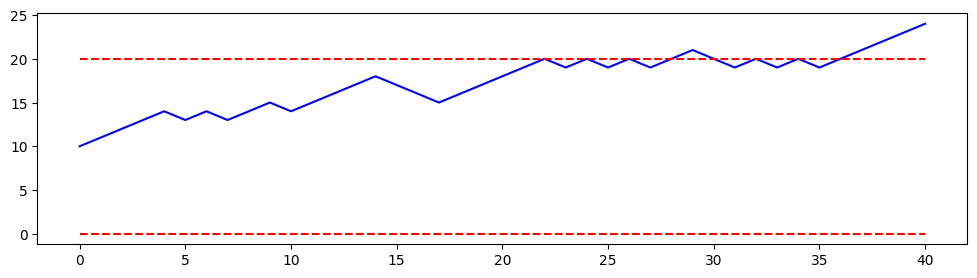

In [ ]:
def main():
    p = 0.49
    initial = 10
    goal = 20
    gambler = GamblerRuin(p=p, initial=initial, goal=goal)

    num_paths = 1
    num_steps = 40
    path, gambler_ruin_result, *_ = gambler.run_MC(num_paths=num_paths, num_steps=num_steps,seed=0)
    print(f"{gambler_ruin_result = }")

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(path[0],'-b')
    ax.plot(np.zeros_like(path[0]),'--r')
    ax.plot(np.ones_like(path[0])*goal,'--r')
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
def main():
    p = 0.49
    initial = 10
    goal = 20
    gambler = GamblerRuin(p=p, initial=initial, goal=goal)

    num_paths = 1_000
    num_steps = 100
    gambler.run_MC(num_paths=num_paths, num_steps=num_steps,seed=0, verbose=True)

if __name__ == "__main__":
    main()

num_paths = 1000
num_win = 256.0
num_loss = 383.0
ruin probability by simulation : 59.94%


###### ***Example - Gamber's Ruin***

Suppose you have $k$ dollar. Each time you are betting 1 dollar  on some gambling
that we will win 1 dollar  with probability $p(\le 1/2)$ and lose 1 dollar  with probability $q:=1-p$.
If you lose all the money, you ruin!
If you have $N$ dollar in your pocket, you happily quit this game.
Let $Q(k)$ be the ruin probability when you start with initial capital $k$ dollar:
$$\begin{array}{lllll}
R&&\mbox{Ruin}\nonumber\\
I&&\mbox{Initial capital}\nonumber\\
Q(k)=\mathbb{P}(R|I=k)&&\mbox{Ruin probability when you start with initial capital $k$ dollar}\nonumber
\end{array}$$
Calculate $Q(k)$.

***Solution***

***Recurrence Relation***

Decompose the ruin event $R$ according to the first outcome.
Let $W$ be the event that you win the first game. Then 

\begin{eqnarray}
\displaystyle 
Q(i)
&=&\displaystyle \mathbb{P}(R|I=i)\nonumber\\
&=&\displaystyle \mathbb{P}(RW|I=i)+\mathbb{P}(RW^c|I=i)\nonumber\\
&=&\displaystyle \mathbb{P}(W|I=i)\mathbb{P}(R|I=i,W)+\mathbb{P}(W^c|I=i)\mathbb{P}(R|I=i,W^c)\nonumber\\
&=&\displaystyle p\mathbb{P}(R|I=i,W)+q\mathbb{P}(R|I=i,W^c)\nonumber\\
&=&\displaystyle pQ(i+1)+qQ(i-1)\nonumber
\end{eqnarray}

$$\begin{array}{lllll}
\mbox{Recurrence relation}&&\displaystyle Q(i)=pQ(i+1)+qQ(i-1)\nonumber\\
\mbox{Boundary conditions}&&\displaystyle Q(0)=1\quad Q(N)=0\nonumber
\end{array}$$

***How to solve Recurrence Relation***

$$\begin{array}{lll}
Q(i)=pQ(i+1)+qQ(i-1)
&\Rightarrow&\displaystyle
pQ(i)+qQ(i)=pQ(i+1)+qQ(i-1)\\
&\Rightarrow&\displaystyle
q(Q(i)-Q(i-1))=p(Q(i+1)-Q(i))\\
&\Rightarrow&\displaystyle
(Q(i+1)-Q(i))=\frac{q}{p}(Q(i)-Q(i-1))\\
&\Rightarrow&\displaystyle
(Q(i+1)-Q(i))=\left(\frac{q}{p}\right)^i(Q(1)-Q(0))\\
\end{array}$$

$$\displaystyle
Q(N)-Q(0)
=\sum_{i=0}^{N-1}Q(i+1)-Q(i)
=\sum_{i=0}^{N-1}\left(\frac{q}{p}\right)^i(Q(1)-Q(0))
=\frac{1-\left(\frac{q}{p}\right)^N}{1-\left(\frac{q}{p}\right)}(Q(1)-Q(0))\\
$$

By the boundary condition $Q(0)=1$ and $Q(N)=0$, we have $Q(N)-Q(0)=-1$. By plugging this into the previous equation,

$$
Q(1)-Q(0)=-\frac{1-\left(\frac{q}{p}\right)}{1-\left(\frac{q}{p}\right)^N}
$$

$$\displaystyle
Q(k)-Q(0)
=\sum_{i=0}^{k-1}Q(i+1)-Q(i)
=\sum_{i=0}^{k-1}\left(\frac{q}{p}\right)^i(Q(1)-Q(0))
=\frac{1-\left(\frac{q}{p}\right)^k}{1-\left(\frac{q}{p}\right)}(Q(1)-Q(0))
=-\frac{1-\left(\frac{q}{p}\right)^k}{1-\left(\frac{q}{p}\right)^N}
$$

$$\displaystyle
Q(k)
=(Q(k)-Q(0))+Q(0)
=1-\frac{1-\left(\frac{q}{p}\right)^k}{1-\left(\frac{q}{p}\right)^N}
=
\frac{\left(\frac{q}{p}\right)^N-\left(\frac{q}{p}\right)^k}{\left(\frac{q}{p}\right)^N-1}
$$

######***Why Gambler's Ruin?***



Since $q/p>1$, $(q/p)^N>>>1$, and hence
$$
Q(k)
\approx
\frac{\left(\frac{q}{p}\right)^N-\left(\frac{q}{p}\right)^k}{\left(\frac{q}{p}\right)^N}
=1-\left(\frac{q}{p}\right)^{-(N-k)}
=1-e^{-(N-k)\log (q/p)}
$$

Since $q/p>1$, $\log(q/p)>0$ and hence
as $k\downarrow 0$
$$
\begin{array}{llll}
e^{-(N-k)\log (q/p)}&\downarrow&0\quad \mbox{exponentially fast}\nonumber\\
Q(k)\approx 1-e^{-(N-k)\log (q/p)}&\uparrow&1\quad \mbox{exponentially fast}\nonumber
\end{array}
$$

Minimum initial capital with ruin probability less than half where self.p = 0.5 :  100
Minimum initial capital with ruin probability less than half where self.p = 0.49 :  183
Minimum initial capital with ruin probability less than half where self.p = 0.48 :  192
Minimum initial capital with ruin probability less than half where self.p = 0.47 :  195


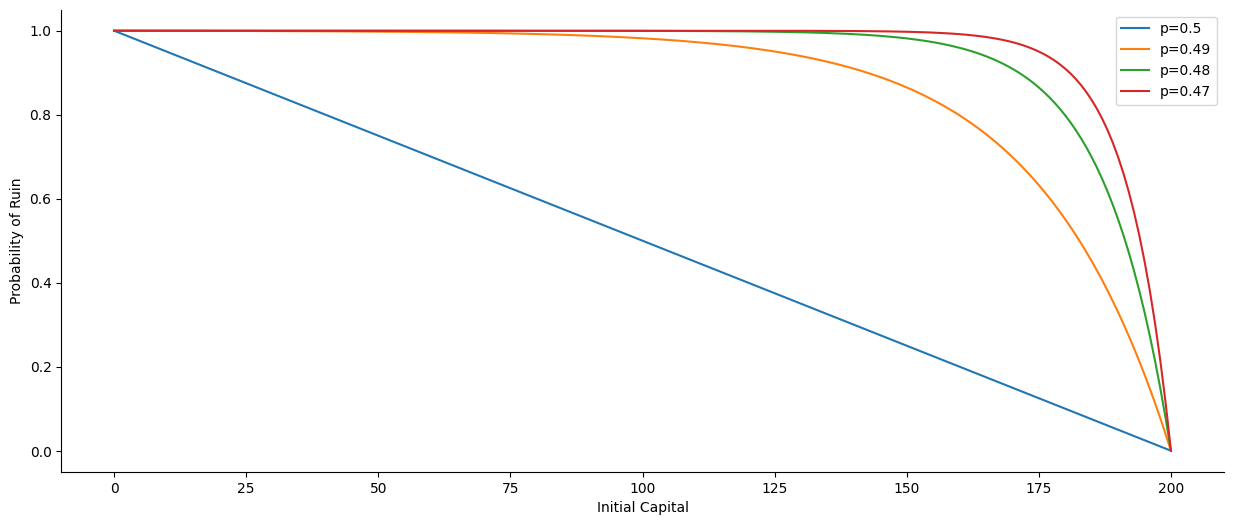

In [ ]:
def main():
    initial = 100
    goal = 200

    fig, ax = plt.subplots(1,1,figsize=(15,6))
    for p in [0.5,0.49,0.48,0.47]:
        obj = GamblerRuin(p=p, initial=initial, goal=goal)
        Q = obj.compute_ruin_probability(verbose=True) 
        ax.plot(Q, label=f'p={p}')
    ax.set_xlabel('Initial Capital')
    ax.set_ylabel('Probability of Ruin')
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

###***Chapter 4 Joint, Marginal, and Conditional Distribution***

####***Section 1 Distribution***

#####***Random Variable***



$$
X:\Omega\longrightarrow \mathbb{R}
$$

#####***Distribution***



Let $X$ be a random variable.
We move a brick attached to $\omega$,
to $X(\omega)$ in the real line $\mathbb{R}$.
In this way we move all the bricks in $\Omega$ to $\mathbb{R}$.
Then
the total weights of the bricks moved into  $\mathbb{R}$ is 1.
This brick or weight distribution over the real line $\mathbb{R}$ is
the distribution of $X$.
$$\begin{array}{llll}
\mathbb{P}(X=a)&=&\mbox{Weight of the bricks at $a$}\nonumber\\
\\
\mathbb{P}(X\in A)&=&\mbox{Weight of the bricks in $A$}\nonumber\\
\end{array}$$

#####***PMF/PDF***



$$\begin{array}{llll}
\mbox{PMF}&p_{x_i}&=&\mbox{Weight of the bricks attached to $x_i$}\nonumber\\
\\
\mbox{PDF}&f(x)dx&=&\mbox{Weight of the bricks in $[x,x+dx]$}\nonumber
\end{array}$$

#####***CDF***









\begin{eqnarray}
F(x)&=&\mathbb{P}(X\le x)\nonumber\\
\nonumber\\
&=&\left\{\begin{array}{ll}\displaystyle\sum_{x_i\le x}p_{x_i}&\mbox{if $X$ is discrete}\\\displaystyle\int_{-\infty}^x f(s)ds&\mbox{if $X$ is continuous}\end{array}\right.\nonumber\\
\nonumber\\
&=&\mbox{Weight of the bricks cumulatively stacked from $-\infty$ up to $x$}\nonumber
\end{eqnarray}

####***Section 2 Joint Distribution***

#####***Random Vector***



$$
{\bf X}:\Omega\longrightarrow \mathbb{R}^d
$$

#####***Joint Distribution***



Let ${\bf X}$ be a random vector.
We move a brick attached to $\omega$,
to ${\bf X}(\omega)$ in $\mathbb{R}^d$.
In this way we move all the bricks in $\Omega$ to $\mathbb{R}^d$.
Then
the total weights of the bricks moved into  $\mathbb{R}^d$ is 1.
This brick or weight distribution over $\mathbb{R}^d$ is
the joint distribution of ${\bf X}$.
$$\begin{array}{llll}
\mathbb{P}({\bf X}={\bf a})&=&\mbox{Weight of the bricks at ${\bf a}$}\nonumber\\
\\
\mathbb{P}({\bf X}\in A)&=&\mbox{Weight of the bricks in $A$}\nonumber\\
\end{array}$$

#####***Joint PMF/PDF***


$$\begin{array}{llll}
\mbox{Joint PMF}&p_{{\bf x}}&=&\mbox{Weight of the bricks attached to ${\bf x}$}\\
\\
\mbox{Joint PDF}&f({\bf x})d{\bf x}&=&\mbox{Weight of the bricks in $\prod_{i=1}^d[x_i,x_i+dx_i]$}
\end{array}$$

#####***Joint CDF***







\begin{eqnarray}
F({\bf x})&=&\mathbb{P}({\bf X}\le {\bf x})\nonumber\\
\nonumber\\
&=&\left\{\begin{array}{ll}\displaystyle\sum_{{\bf x}_i\le {\bf x}} p_{{\bf x}_i}&\mbox{if ${\bf X}$ is discrete}\\\displaystyle\int_{-\infty}^{{\bf x}} f({\bf s})d{\bf s}&\mbox{if ${\bf X}$ is continuous}\end{array}\right.\nonumber\\
\nonumber\\
&=&\mbox{Weight of the bricks cumulatively stacked from $-\infty$ up to ${\bf x}$}\nonumber
\end{eqnarray}

####***Section 3 How to get Joint, Marginal, Conditional from Other Two***

$$\begin{array}{llll}
\mbox{Chain rule}&\displaystyle p(x,y)=p(x)p(y|x)\\
\\
\mbox{Marginalization}&\displaystyle p(x)=\sum_yp(x,y)\\
\mbox{Conditioning}&\displaystyle p(y|x)=\frac{p(x,y)}{p(x)}
\end{array}$$

####***Section 4 Number $X$ of heads in first two flips and total number $Y$ of heads***

#####***Distribution of $X$***



<img src="https://github.com/SungchulLee/img/blob/main/Distribution%20of%20X.png?raw=true">

#####***Distribution of $Y$***



<img src="https://github.com/SungchulLee/img/blob/main/Distribution%20of%20Y.png?raw=true">

#####***Joint Distribution of $X$ and $Y$***



<img src="https://github.com/SungchulLee/img/blob/main/Joint%20Distribution%20of%20X%20and%20Y.png?raw=true">



#####***From Joint To Marginal $X$***



<img src="https://github.com/SungchulLee/img/blob/main/From%20Joint%20To%20Marginal%20X.png?raw=true">

#####***From Joint To Marginal $Y$***



<img src="https://github.com/SungchulLee/img/blob/main/From%20Joint%20To%20Marginal%20Y.png?raw=true">



#####***From Joint To Conditional Given $X=1$***



<img src="https://github.com/SungchulLee/img/blob/main/From%20Joint%20To%20Conditional%20Given%20X=1.png?raw=true">

#####***From Joint To Conditional Given $Y=2$***











<img src="https://github.com/SungchulLee/img/blob/main/From%20Joint%20To%20Conditional%20Given%20Y=2.png?raw=true">

####***Section 5 Examples***

#####***Example - From Joint to Marginal and Conditional***



The joint PMF of $X$ and $Y$ are given by

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

1.
Find the marginal PMF of $X$.

2.
Find the marginal PMF of $Y$.

3.
Find the conditional PMF of $X$ given $Y=1$.

4.
Find the conditional PMF of $Y$ given $X=2$.

***Solution***

1.
Do the column  sum
and
get 
the marginal PMF of $X$.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&\frac{3}{10}&\frac{3}{10}&\frac{4}{10}&{\bf \mathbb{P}(X=x_i)}\\\hline
\end{array}
$$

2.
Do the  row sum
and
get 
the marginal PMF of $Y$.

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j)}& {\bf y_j}&&&&                                     \\\hline\hline  
\frac{3}{10}&{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
\frac{2}{10}&{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
\frac{3}{10}&{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
\frac{2}{10}&{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

3.
To find the conditional PMF of $X$ given $Y=1$
we remove all the masses except the masses on the line $y=1$
and then normalize the masses so that the total mass of the remaining masses is 1.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&&\\\hline
{\bf 2}&&&&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&&&&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&&\\\hline
{\bf 2}&&&&\\\hline
{\bf 1}&0&\frac{2}{3}&\frac{1}{3}&\\\hline
{\bf 0}&&&&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&0&\frac{2}{3}&\frac{1}{3}&{\bf \mathbb{P}(X=x_i|Y=1)}\\\hline
\end{array}
$$


4.
To find the conditional PMF of $Y$ given $X=2$
we remove all the masses except the masses on the line $x=2$
and then normalize the masses so that the total mass of the remaining masses is 1.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&\frac{1}{10}&\\\hline
{\bf 2}&&&\frac{1}{10}&\\\hline
{\bf 1}&&&\frac{1}{10}&\\\hline
{\bf 0}&&&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j|X=2)}&{\bf y_j}&&&&                                     \\\hline\hline  
\frac{1}{4}&{\bf 3}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 2}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 1}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 0}&&&\frac{1}{4}&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

#####***Example - 3 Red Balls and 1 Blue Ball***



There are 3 red balls and 1 blue ball in the bin.
$$
\{{\color{red}r}, {\color{red}r}, {\color{red}r}, {\color{blue}b}\}
$$
We choose the first ball and record its color.
After the record remove the first ball from the bin.
Then
we choose the second ball and record its color.
Find the probability that the first ball is red and the second is blue.



$$
X_i=\left\{\begin{array}{ll}
1&\mbox{if $i$-th chosen ball blue}\\
0&\mbox{otherwise}
\end{array}\right.
$$


$$\mathbb{P}(X_1=0,X_2=1)=\mathbb{P}(X_1=0)\mathbb{P}(X_2=1|X_1=0)=\frac{3}{4}\times \frac{1}{3}=\frac{1}{4}$$

#####***Example - CDF***

Using the below CDF find $\mathbb{P}(X=5)$ and $\mathbb{P}(X\ge20)$.

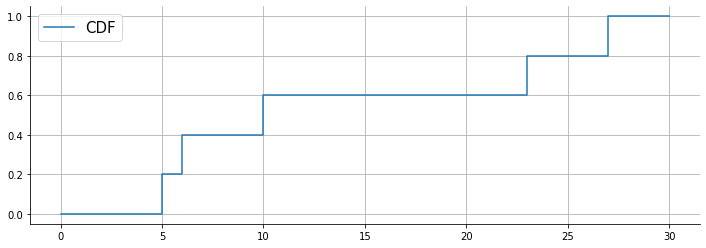

In [ ]:
def main():
    x = [0,5,5,6,6,10,10,23,23,27,27,30]
    y = [0.0,0.0,0.2,0.2,0.4,0.4,0.6,0.6,0.8,0.8,1.0,1.0]

    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(x,y,label='CDF')
    ax.grid('on')
    ax.legend(fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

if __name__ == "__main__":
    main()

***Solution***
$$\mathbb{P}(X=5)=F(5)-F(5-)=0.2-0=0.2$$


$$\mathbb{P}(X<20)=F(20-)=0.6\ \ \Rightarrow\ \ 
\mathbb{P}(X\ge20)=1-\mathbb{P}(X<20)=0.4$$

####***Section 6 Independent Random Variables***

#####***Independent Random Variables***

***Independent Random Variables***

$X$ and $Y$ are independent if for any $x$ and $y$
$$
p(x,y)=p(x)p(y)
$$

$X_1, X_2, \cdots, X_n$ are independent if for any $x_1$, $x_2$,$\cdots$, $x_n$
$$
p(x_1,x_2,\ldots,x_n)=p(x_1)p(x_2)\cdots p(x_n)
$$

***Pairwise Independent Random Variables***

$X_1, X_2, \cdots, X_n$ are pairwise independent if for any pair $X_i$, $X_j$
$$
\mbox{$X_i$ and $X_j$ are independent}
$$

***Conditionally Independent Random Variables***

$X_1$, $\cdots$, $X_n$ are conditionally independent conditioned on $Y$ if
for any $x_1$, $\cdots$, $x_n$, $y$
$$
p(x_1,x_2,\ldots,x_n|y)=p(x_1|y)p(x_2|y)\cdots p(x_n|y)
$$

#####***Example - Two Independent Random Variables***



The marginal PMFs of $X$ and $Y$ are given by

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j)}&{\bf y_j}&&&&                                     \\\hline\hline  
\frac{3}{10}&{\bf 3}&&&&\\\hline
\frac{2}{10}&{\bf 2}&&&&\\\hline
\frac{3}{10}&{\bf 1}&&&&\\\hline
\frac{2}{10}&{\bf 0}&&&&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&&\frac{2}{10}&\frac{3}{10}&\frac{5}{10}&{\bf \mathbb{P}(X=x_i)}\\\hline
\end{array}
$$

Suppose $X$ and $Y$ are independent.
Find the joint PMF of $X$ and $Y$, i.e., fill up the blank in below table.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&&\\\hline
{\bf 2}&&&&\\\hline
{\bf 1}&&&&\\\hline
{\bf 0}&&&&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j)}&{\bf y_j}&&&&                                     \\\hline\hline  
\frac{3}{10}&{\bf 3}&\frac{2}{10}\times\frac{3}{10}=\frac{6}{100}&\frac{3}{10}\times\frac{3}{10}=\frac{9}{100}&\frac{5}{10}\times\frac{3}{10}=\frac{15}{100}&\\\hline
\frac{2}{10}&{\bf 2}&\frac{2}{10}\times\frac{2}{10}=\frac{6}{100}&\frac{3}{10}\times\frac{2}{10}=\frac{6}{100}&\frac{5}{10}\times\frac{2}{10}=\frac{10}{100}&\\\hline
\frac{3}{10}&{\bf 1}&\frac{2}{10}\times\frac{3}{10}=\frac{6}{100}&\frac{3}{10}\times\frac{3}{10}=\frac{9}{100}&\frac{5}{10}\times\frac{3}{10}=\frac{15}{100}&\\\hline
\frac{2}{10}&{\bf 0}&\frac{2}{10}\times\frac{2}{10}=\frac{6}{100}&\frac{3}{10}\times\frac{2}{10}=\frac{6}{100}&\frac{5}{10}\times\frac{2}{10}=\frac{10}{100}&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&&\frac{2}{10}&\frac{3}{10}&\frac{5}{10}&{\bf \mathbb{P}(X=x_i)}\\\hline
\end{array}
$$

#####***Example - Two Dependent Random Variables***



The joint PMF of $X$ and $Y$ is given by

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&\frac{1}{6}&\frac{1}{6}&\frac{1}{6}&\\\hline
{\bf 2}&\frac{1}{6}&\frac{1}{6}&0&\\\hline
{\bf 1}&\frac{1}{6}&0&0&\\\hline
{\bf 0}&0&0&0&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

Determine whether $X$ and $Y$ are independent.


\begin{eqnarray}
\mbox{Conditional PMF $X$ given $Y=1$}
&&
p_{0|1}=1\nonumber\\
\mbox{Conditional PMF $X$ given $Y=2$}
&&
p_{0|2}=1/2,
\quad
p_{1|2}=1/2\nonumber\\
\mbox{Conditional PMF $X$ given $Y=3$}
&&
p_{0|3}=1/3,
\quad
p_{1|3}=1/3,
\quad
p_{2|3}=1/3\nonumber
\end{eqnarray}
The conditional PMF of $X$ given $Y=y_j$ depends on $y_j$
and hence $X$ and $Y$ are depen.



\begin{eqnarray}
\mbox{Conditional PMF $Y$ given $X=0$}
&&
p_{1|0}=1/3,
\quad
p_{2|0}=1/3,
\quad
p_{3|0}=1/3\nonumber\\
\mbox{Conditional PMF $Y$ given $X=1$}
&&
p_{2|1}=1/2,
\quad
p_{3|1}=1/2\nonumber\\
\mbox{Conditional PMF $Y$ given $X=2$}
&&
p_{3|2}=1\nonumber
\end{eqnarray}
The conditional PMF of $Y$ given $X=x_i$ depends on $x_i$
and hence $X$ and $Y$ are dependent.


####***Section 7 Distributions related to Coin Flips***

#####***Distributions related to Coin Flips***

\begin{array}{ll}\hline
\mbox{Distribution}&\mbox{Random variable}\\\hline
B(p)&\mbox{Flip a $p$-coin and check whether we have a head}\\
B(n,p)&\mbox{Flip a $p$-coin $n$ times and count the number of heads}\\
Geo(p)&\mbox{Flip a $p$-coin until first head and count the number of flips}\\
NB(r,p)&\mbox{Flip a $p$-coin until $r$-th head and count the number of flips}\\\hline
\end{array}

In [ ]:
def main():
    n = 10
    p = 0.7

    x = np.arange(n+1) # [0,1,2,3,...,n]
    pmf = stats.binom(n,p).pmf(x)
    cdf = stats.binom(n,p).cdf(x)

    fig, ax = plt.subplots(1,1,figsize=(12,4))
    ax.bar(x,cdf,alpha=0.2,color='red',label='CDF')
    ax.bar(x,pmf,label='PMF')
    ax.legend()
    ax.set_title(f'Binomial B({n},{p})', fontsize=20)
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
def main():
    n = 10
    p = 0.4

    x = np.arange(1,n+1) # [0,1,2,3,...,n]
    pmf = stats.geom(p).pmf(x)
    cdf = stats.geom(p).cdf(x)

    fig, ax = plt.subplots(1,1,figsize=(12,4))
    ax.bar(x,cdf,alpha=0.2,color='red',label='CDF')
    ax.bar(x,pmf,label='PMF')
    ax.legend()
    ax.set_title(f'Geometric Goe({p})', fontsize=20)
    plt.show()

if __name__ == "__main__":
    main()

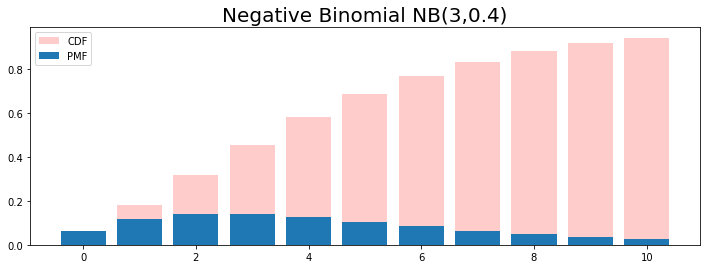

In [ ]:
def main():
    n_range = 10
    n = 3
    p = 0.4

    x = np.arange(n_range+1) # [0,1,2,3,...,n]
    pmf = stats.nbinom(n,p).pmf(x)
    cdf = stats.nbinom(n,p).cdf(x)

    fig, ax = plt.subplots(1,1,figsize=(12,4))
    ax.bar(x,cdf,alpha=0.2,color='red',label='CDF')
    ax.bar(x,pmf,label='PMF')
    ax.legend()
    ax.set_title(f'Negative Binomial NB({n},{p})', fontsize=20)
    plt.show()

if __name__ == "__main__":
    main()

#####***Example - How to generate $\pm 1$ Random Variables from Bernoulli Random Variables***



If $X$ has a Bernoulli distribution $\text{B}(p)$ with success rate $p$,
then 
$$
Y:=2X-1=\left\{\begin{array}{rl}
1&\mbox{with probability}\ p\\
-1&\mbox{with probability}\ 1-p
\end{array}\right.
$$

In particular,
suppose we flip a fair coin $n$ times independently
and we record the $i$-th flip result as $X_i$
by converting $H$ and $T$ to 1 and 0 respectively.
Then $X_i$ is either 1 or 0 equally likely.
Now, let $Y_i=2X_i-1$.
Then
$$
\mbox{$X_i$ iid with}\
X_i=\left\{\begin{array}{ll}
1&\mbox{with prob}\ 0.5\\
0&\mbox{with prob}\ 0.5
\end{array}\right.
\Rightarrow 
\mbox{$Y_i$ iid with}\
Y_i=\left\{\begin{array}{rl}
1&\mbox{with prob}\ 0.5\\
-1&\mbox{with prob}\ 0.5
\end{array}\right.
$$

#####***Sum of Two Binomial Random Variables***

***Theorem***

\begin{array}{lllllllll}
\mbox{$X\sim B(n,p)$, $Y\sim B(m,p)$}
&\quad\Rightarrow\quad&
X+Y\sim B(n+m,p)
&&\mbox{Not true in general}\nonumber\\
\mbox{$X\sim B(n,p)$, $Y\sim B(m,p)$}
&\quad\Rightarrow\quad&
X+Y\sim B(n+m,p)
&&\mbox{True if $X$, $Y$ independent}\nonumber
\end{array}

***Proof***

We flip the $p$-coin $n$ times and count the number $X$ of heads. 
We flip this coin $m$ times additionally and count the number $Y$ of heads in these additional coin flips. 
Then,
$X+Y$ is simply the number of heads in these $n+m$ coin flips.
So, $X+Y$ is $B(n+m,p)$. 

***Proof (Divide and conquer)***

Divide:
$$\mathbb{P}(X+Y=k)=\sum_{0\le l\le n,\ 0\le k-l\le m}\mathbb{P}(X=l,Y=k-l)$$


Conquer: 
\begin{eqnarray}
\mathbb{P}(X=l,Y=k-l)
&=&\mathbb{P}(X=l)\mathbb{P}(Y=k-l|X=l)\quad(\mbox{$X$ and $Y$ are independent})\nonumber\\
&=&\mathbb{P}(X=l)\mathbb{P}(Y=k-l)\quad(\mbox{$X\sim B(n,p)$, $Y\sim B(m,p)$})\nonumber\\
&=&{n\choose l}p^lq^{n-l}{m\choose k-l}p^{k-l}q^{m-(k-l)}\nonumber
\end{eqnarray}


By Vandermonde's iity
\begin{eqnarray}
\mathbb{P}(X+Y=k)
&=&\sum_{0\le l\le n, 0\le k-l\le m}{n\choose l}p^lq^{n-l}{m\choose k-l}p^{k-l}q^{m-(k-l)}\nonumber\\
&=&\left[\sum_{0\le l\le n, 0\le k-l\le m}{n\choose l}{m\choose k-l}\right]p^{k}q^{n+m-k}\nonumber\\
&=&{n+m\choose k}p^{k}q^{n+m-k}\nonumber
\end{eqnarray}

#####***Example - Number of Couples with Same Birthday***



There are $n$ people in the class.
Suppose each one choose one's birthday independently and uniformly over the 365 days.
For each pair $i$ and $j$
we let $A_{ij}$ be the event that $i$ and $j$ share the common birthday
and let $1_{A_{ij}}$ be its indicator.
Then, the number $X$ of common birthday pairs can be represented as 
$$
X=\sum_{1\le i<j\le n}^n1_{A_{ij}}
$$
Is $X$ binomial?

***Solution***

The indicator random $1_{A_{ij}}$ is either 1 or 0.
So it is a Bernoulli random variable with success rate $p=P(A_{ij})=1/365$;
$$1_{A_{ij}}\sim B(p)$$

\begin{eqnarray}
\mbox{$1_{A_{ij}}$ are  independent}\quad\ \
\ \ \Rightarrow\ \ 
X\sim B(m,p),\quad m={n\choose 2}
&&\mbox{Not true}\nonumber\\
\mbox{$1_{A_{ij}}$ are not independent}
\ \ \Rightarrow\ \ 
X\ \mbox{not binomial}\quad\quad\quad\quad\ \
&&\mbox{True}\nonumber
\end{eqnarray}

Suppose 1 and 2 share the common birthday
and suppose 1 and 3 share the common birthday.
Then, of course 2 and 3 share the common birthday.
In other word
$$
P(A_{23}|A_{12},A_{13})=1\neq\frac{1}{365}=P(A_{23})
$$

####***Section 8 Distributions related to Dice Rolling***

#####***Distributions related to Dice Rolling***

\begin{array}{cl}\hline
\mbox{Distribution}&\mbox{Random variable}\\\hline
Cat({\bf p})&\mbox{Roll a ${\bf p}$-dice and check the result}\\
Mul(n,{\bf p})&\mbox{Roll a ${\bf p}$-dice $n$ times and count the number of out comes}\\\hline
\end{array}

***Parameter ${\bf p}=(p_1,\ldots,p_K)$*** 
$$
p_j\ge 0,\quad\quad\quad\quad\sum_{i=1}^Kp_j=1
$$

***Categorical distribution $Cat({\bf p})$***
$$
\mathbb{P}(X_1=0,\ldots,X_j=1,\ldots,X_K=0)=p_j
$$

***Multinomial distribution $Mul(n,{\bf p})$***
$$
\mathbb{P}(X_1=n_1,\ldots,X_j=n_j,\ldots,X_K=n_K)={n\choose n_1\cdots n_K}p_1^{n_1}\cdots p_K^{n_K}
$$

###***Chapter 5 Expectation and Variance***

######***Expectation***

***Definition***

$$\begin{array}{lllllllll}
\mbox{Discrete}&EX&=&\displaystyle\sum_x x * P(X=x)\\
\mbox{Continuous}&EX&=&\displaystyle\int_{-\infty}^{\infty} x f(x)dx\\
\end{array}$$

***Interpretation 1***

\begin{eqnarray}
\underbrace{\mathbb{E}(X)}_{\mbox{Expected payoff}}
&=&\quad\quad\sum_{x_i}\quad \underbrace{x_i}_{\mbox{Payoff}}\quad\times \underbrace{p_{x_i}}_{\mbox{ Probability}}\nonumber
\end{eqnarray}

***Interpretation 2***

\begin{eqnarray}
\underbrace{\mathbb{E}(X)}_{\mbox{Area under curve}}
&=&\quad\quad\sum_{x_i}\quad \underbrace{x_i}_{\mbox{Height}}\quad\times\quad \underbrace{P(X=x_i)}_{\mbox{Width}}\nonumber
\end{eqnarray}

###### ***Properties of Expectation*** 

***Expectation as a Linear Operator***

\begin{eqnarray}
(1)&&\quad\displaystyle \mathbb{E}(X+Y)=\mathbb{E}(X)+\mathbb{E}(Y)\nonumber\\
(2)&&\quad\displaystyle \mathbb{E}(aX)=a\mathbb{E}(X)\nonumber\\
(3)&&\quad\displaystyle \mathbb{E}(a)=a\nonumber
\end{eqnarray}

***Proof***

\begin{eqnarray}
\mathbb{E}(X+Y)
&=&\sum_{x_i}\sum_{y_j}(x_i+y_j)p_{x_i,y_j}\nonumber\\
&=&\sum_{x_i}\sum_{y_j}x_ip_{x_i,y_j}+\sum_{x_i}\sum_{y_j}y_jp_{x_i,y_j}\nonumber\\
&=&\sum_{x_i}x_i\left(\sum_{y_j}p_{x_i,y_j}\right)+\sum_{y_j}y_j\left(\sum_{x_i}p_{x_i,y_j}\right)\nonumber\\
&=&\sum_{x_i}x_ip_{x_i}+\sum_{y_j}y_jp_{y_j}\nonumber\\
&=&\mathbb{E}(X)+\mathbb{E}(Y)\nonumber
\end{eqnarray}

***Change of Variable*** 

\begin{eqnarray}
(4)&&\quad\displaystyle \mathbb{E}[g(X)]=\sum_{x_i}g(x_i)p_{x_i}\nonumber\\
(5)&&\quad\displaystyle \mathbb{E}[g(X,Y)]=\sum_{x_i}\sum_{y_j}g(x_i,y_j)p_{x_i,y_j}\nonumber
\end{eqnarray}

***Proof***

\begin{eqnarray}
\mathbb{E}[g(X)]
&=&\sum_{g_k}g_kP(g(X)=g_k)\nonumber\\
&=&\sum_{g_k}g_k\left(\sum_{x_i,\ g(x_i)=g_k}p_{x_i}\right)\nonumber\\
%&=&\sum_{g_k}\left(\sum_{x_i,\ g(x_i)=g_k}{\color{red}g_k}p_{x_i}\right)\nonumber\\
&=&
\sum_{g_k}\left(\sum_{x_i,\ g(x_i)=g_k}g(x_i)p_{x_i}\right)\nonumber\\
%&=&\sum_{g_k}\sum_{x_i,\ g(x_i)=g_k}g(x_i)p_{x_i}\nonumber\\
&=&\sum_{x_i}\ g(x_i)p_{x_i}\nonumber
\end{eqnarray}

***Product of Independent Random Variables***

\begin{array}{llllllll}
(6)&&\quad\displaystyle \mathbb{E}\left[XY\right]=\mathbb{E}\left[X\right]\mathbb{E}\left[Y\right]&&\mbox{if $X$ and $Y$ are independent}\nonumber\\
\nonumber\\
(7)&&\quad\displaystyle \mathbb{E}\left[g(X)h(Y)\right]=\mathbb{E}\left[g(X)\right]\mathbb{E}\left[h(Y)\right]&&\mbox{if $X$ and $Y$ are independent}\nonumber
\end{array}

***Proof***

\begin{eqnarray}
\mathbb{E}[XY]
&=&
\sum_{x_i}\sum_{y_j}x_iy_jp_{x_i,y_j}
=
\sum_{x_i}\sum_{y_j}x_iy_jp_{x_i}p_{y_j}\nonumber\\
&=&
\left(\sum_{x_i}x_ip_{x_i}\right)
\left(\sum_{y_j}y_jp_{y_j}\right)
=\mathbb{E}[X]\mathbb{E}[Y]\nonumber
\end{eqnarray}

***No Free Lunch***

\begin{eqnarray}
(8)\ &&\quad\displaystyle X\ge 0\  \quad\Rightarrow\quad \mathbb{E}(X)\ge 0\nonumber\\
\nonumber\\
(9)\ &&\quad\displaystyle X\ge Y\quad\Rightarrow\quad \mathbb{E}(X)\ge \mathbb{E}(Y)\nonumber\\
\nonumber\\
(10)&&\quad\displaystyle |\mathbb{E}(X)|\le \mathbb{E}(|X|)\nonumber
\end{eqnarray}

***Proof***

$$
X\ge 0
\ \ \Rightarrow\ \ 
x_i\ge 0
\ \ \Rightarrow\ \ 
\mathbb{E}(X)=\sum_{x_i}x_ip_{x_i}\ge 0
$$

\begin{eqnarray}
X\ge Y
\quad\Rightarrow\quad
X-Y\ge 0
&\Rightarrow&
\mathbb{E}(X-Y)\ge 0\nonumber\\
&\Rightarrow&
\mathbb{E}(X)-\mathbb{E}(Y)\ge 0
\quad\Rightarrow\quad
\mathbb{E}(X)\ge \mathbb{E}(Y)\nonumber
\end{eqnarray}

***Cauchy-Schwartz Inequality***

\begin{eqnarray}
(11)&&\quad\displaystyle \mathbb{E}|XY|\le (\mathbb{E}X^2)^{1/2}(\mathbb{E}Y^2)^{1/2}\nonumber
\end{eqnarray}

***Proof***

If $\mathbb{E}X^2=0$, $X=0$ with probability 1 and hence $\mathbb{E}|XY|=0$.
By the same token, 
if $\mathbb{E}Y^2=0$, then $\mathbb{E}|XY|=0$.
In these two extreme cases (11) holds trivially.
So, without loss of generality
we assume that $\mathbb{E}X^2>0$ and $\mathbb{E}Y^2>0$.

With $t=-\mathbb{E}|XY|/\mathbb{E}Y^2$
\begin{eqnarray}
\displaystyle 
(|X|+t|Y|)^2
=X^2+2t|XY|+t^2Y^2\ge 0
&\quad\Rightarrow\quad&\displaystyle 
\mathbb{E}X^2+2t\mathbb{E}|XY|+t^2\mathbb{E}Y^2\ge 0\nonumber\\
&\quad\Rightarrow\quad&\displaystyle 
(\mathbb{E}X^2)(\mathbb{E}Y^2)\ge (\mathbb{E}|XY|)^2\nonumber
\end{eqnarray}

###### ***Example - Expectation of Coin Related Random Variables***



\begin{array}{ccc}\hline
\mbox{Distribution}&\mbox{Expectation}&\mbox{Variance}\\\hline
B(p)&p&pq\\
B(n,p)&np&npq\\
Geo(p)&\frac{1}{p}&\frac{q}{p^2}\\
NB(r,p)&\frac{r}{p}&\frac{rq}{p^2}\\\hline
\end{array}

$$
X\sim B(p)\ \ \Rightarrow\ \ \mathbb{E}(X)=1\times p+0\times q=p
$$


\begin{eqnarray}
X\sim B(n,p)
&\Rightarrow&X=\sum_{i=1}^nX_i,\ X_i\ \mbox{iid}\ B(p)\nonumber\\
&\Rightarrow&\mathbb{E}(X)=\sum_{i=1}^n\mathbb{E}(X_i)=np\nonumber
\end{eqnarray}



\begin{eqnarray}
1+x+x^2+\cdots=\frac{1}{1-x}
&\stackrel{\mbox{Diff wrt $x$}}{\Rightarrow}&1+2x+3x^2+\cdots=\frac{1}{(1-x)^2}\nonumber\\
&\stackrel{\mbox{Let $x=q$}}{\Rightarrow}&1+2q+3q^2+\cdots=\frac{1}{p^2}\nonumber\\
&\Rightarrow&X\sim Geo(p)\ \ \Rightarrow\ \  \mathbb{E}(X)=\left(\sum_{k=1}^{\infty} kq^{k-1}\right)p=\frac{1}{p}\nonumber
\end{eqnarray}


\begin{eqnarray}
X\sim NB(r,p)
&\Rightarrow&X=\sum_{i=1}^rX_i,\ X_i\ \mbox{iid}\ Geo(p)\nonumber\\
&\Rightarrow&\mathbb{E}(X)=\sum_{i=1}^r\mathbb{E}(X_i)=\frac{r}{p}\nonumber
\end{eqnarray}

###### ***Example - Maximization of Expected Profit***

A newsboy purchases papers at 10 cents and sells them at 15 cents. However, he is not allowed to return unsold papers. 
If his daily demand $X$ is $B(n,p)$ 
with $n=10$, $p=0.4$, 
approximately how many papers should he purchase 
so as to maximize his expected profit?

***Solution***

With $t$ purchase,
his profit $Y(t)$ and expected profit $f(t)=EY(t)$ are
\begin{eqnarray}
Y(t)
&=&
\left\{\begin{array}{ll}
5t&\mbox{if}\ X\ge t\\ 
5X-10(t-X)&\mbox{if}\ X< t
\end{array}\right.\nonumber\\
f(t)
&=&
5tP(X\ge t)+\sum_{i=0}^{t-1}(15i-10t)P(X=i)\nonumber
\end{eqnarray}


To find an optimal $t_0$ that maximize $f(t)$,
differentiate $f(t)$ discretely:
Find $t_0$ with
\begin{eqnarray}
f(t_0)-f(t_0-1)&=&15P(X\ge t_0)-10\ge 0\nonumber\\
f(t_0+1)-f(t_0)&=&15P(X\ge t_0+1)-10\le 0\nonumber
\end{eqnarray}
or
$$
P(X\le t_0-1)\le \frac{1}{3}\ \ \ \ \ \mbox{and}\ \ \ \ \ P(X\le t_0)\ge \frac{1}{3}
$$

###### ***Variance***

***Variance***

$$Var(X)=\mathbb{E}(X-\mathbb{E}X)^2=\mathbb{E}X^2-\left(\mathbb{E}X\right)^2$$

\begin{eqnarray}
Var(X)
&=&\mathbb{E}(X-\mathbb{E}X)^2\nonumber\\
&=&\mathbb{E}(X^2-2(\mathbb{E}X)X+(\mathbb{E}X)^2)\nonumber\\
&=&\mathbb{E}X^2-2(\mathbb{E}X)\mathbb{E}X+(\mathbb{E}X)^2\nonumber\\
&=&\mathbb{E}X^2-(\mathbb{E}X)^2\nonumber
\end{eqnarray}

***Covariance***

$$Cov(X,Y)=\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]
=\mathbb{E}(XY)-(\mathbb{E}X)(\mathbb{E}Y)$$

\begin{eqnarray}
Cov(X,Y)
&=&\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]\nonumber\\
&=&\mathbb{E}[XY-(\mathbb{E}Y)X-(\mathbb{E}X)Y+(\mathbb{E}X)(\mathbb{E}Y)]\nonumber\\
&=&\mathbb{E}(XY)-(\mathbb{E}Y)(\mathbb{E}X)-(\mathbb{E}X)(\mathbb{E}Y)+(\mathbb{E}X)(\mathbb{E}Y)\nonumber\\
&=&\mathbb{E}(XY)-(\mathbb{E}Y)(\mathbb{E}X)\nonumber
\end{eqnarray}

***Correlation Coefficient***

$$-1\le \rho=\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}\le 1$$

\begin{eqnarray}
|Cov(X,Y)|
&\le& \mathbb{E}\left|(X-\mathbb{E}X)(Y-\mathbb{E}Y)\right|\nonumber\\
&\le& (\mathbb{E}(X-\mathbb{E}X)^2)^{1/2}(\mathbb{E}(Y-\mathbb{E}Y)^2)^{1/2}=\sqrt{Var(X)}\sqrt{Var(Y)}\nonumber
\end{eqnarray}

***Discrete vs Continuous***

$$\begin{array}{lllllllll}
\mbox{Discrete}&EX^2&=&\displaystyle\sum_x x^2 * P(X=x)\\
\mbox{Continuous}&EX^2&=&\displaystyle\int_{-\infty}^{\infty} x^2 f(x)dx\\
\end{array}$$

$$\begin{array}{lllllllll}
\mbox{Discrete}&Var(X)&=&E(X-EX)^2&=&\displaystyle\sum_x (x-EX)^2 * P(X=x)\\
\mbox{Continuous}&Var(X)&=&E(X-EX)^2&=&\displaystyle\int_{-\infty}^{\infty} (x-EX)^2 f(x)dx\\
\end{array}$$

###### ***Properties of Variance***

\begin{eqnarray}
(1)&&\quad\displaystyle Var(X)=Cov(X,X)\nonumber\\
(2)&&\quad\displaystyle Cov(aX+bY,Z)=a Cov(X,Z)+b Cov(Y,Z)\nonumber\\
(2)&&\quad\displaystyle Cov(Z,aX+bY)=a Cov(Z,X)+b Cov(Z,Y)\nonumber\\
(3)&&\quad\displaystyle Cov(X,Y)=Cov(Y,X)\nonumber\\
(4)&&\quad\displaystyle Cov(X,a)=Cov(a,X)=0\nonumber\\
(5)&&\quad\displaystyle Cov(X,Y)=0\ \ \ \ \ \mbox{if $X$ and $Y$ are independent}\nonumber
\end{eqnarray}

***Proof***

$$
Var(X)
=\mathbb{E}(X-\mathbb{E}X)^2
=\mathbb{E}[(X-\mathbb{E}X)(X-\mathbb{E}X)]
=Cov(X,X)
$$


\begin{eqnarray}
Cov(aX+bY,Z)
&=&\mathbb{E}(aX+bY-a\mathbb{E}X-b\mathbb{E}Y)(Z-\mathbb{E}Z)\nonumber\\
&=&\mathbb{E}[a(X-\mathbb{E}X)+b(Y-\mathbb{E}Y)](Z-\mathbb{E}Z)\nonumber\\
&=&a\mathbb{E}[(X-\mathbb{E}X)(Z-\mathbb{E}Z)]+b\mathbb{E}[(Y-\mathbb{E}Y)(Z-\mathbb{E}Z)]\nonumber\\
&=&aCov(X,Z)+bCov(Y,Z)\nonumber
\end{eqnarray}


$$
Cov(X,Y)
=\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]
=\mathbb{E}[(Y-\mathbb{E}Y)(X-\mathbb{E}X)]
=Cov(Y,X)
$$


$$
Cov(X,a)
=\mathbb{E}[(X-\mathbb{E}X)(a-a)]
=0
$$


\begin{eqnarray}
X,\ Y\ \mbox{independent}
&\Rightarrow&\mathbb{E}(XY)=\mathbb{E}(X)\mathbb{E}(Y)\nonumber\\
&\Rightarrow&Cov(X,Y)=\mathbb{E}(XY)-\mathbb{E}(X)\mathbb{E}(Y)=0\nonumber
\end{eqnarray}

###### ***Example - How to Compute Variance***



Let $Var(X)=2$, $Var(Y)=2$, $Var(Z)=3$, $Cov(X,Y)=0.25$.
If $Z$ is independent to both $X$ and $Y$, compute the variance of $V$, where $V$ is given by
$$
V=X+2Y-3Z-2
$$

***Solution***

$$Var(V)\stackrel{(1)}{=}Cov(V,V)=Cov(X+2Y-3Z-2,X+2Y-3Z-2)$$

$$\begin{array}{lllllllllllllllllll}
Cov(X+2Y-3Z-2,X+2Y-3Z-2)
&\stackrel{(2)}{=}&Cov(X,X)&+2Cov(X,Y)&-3Cov(X,Z)&-2Cov(X,1)\nonumber\\
&&2Cov(Y,X)&+4Cov(Y,Y)&-6Cov(Y,Z)&-4Cov(Y,1)\nonumber\\
&&-3Cov(Z,X)&-6Cov(Z,Y)&+9Cov(Z,Z)&+6Cov(Z,1)\nonumber\\
&&-2Cov(1,X)&-4Cov(1,Y)&+6Cov(1,Z)&+4Cov(1,1)\nonumber\\
&\stackrel{(3)}{=}&Cov(X,X)&+2Cov(X,Y)&-3Cov(X,Z)&-2Cov(X,1)\nonumber\\
&&2Cov(X,Y)&+4Cov(Y,Y)&-6Cov(Y,Z)&-4Cov(Y,1)\nonumber\\
&&-3Cov(X,Z)&-6Cov(Y,Z)&+9Cov(Z,Z)&+6Cov(Z,1)\nonumber\\
&&-2Cov(X,1)&-4Cov(Y,1)&+6Cov(Z,1)&+4Cov(1,1)\nonumber\\
&=&Cov(X,X)&+4Cov(X,Y)&-6Cov(X,Z)&-4Cov(X,1)\nonumber\\
&&&+4Cov(Y,Y)&-12Cov(Y,Z)&-8Cov(Y,1)\nonumber\\
&&&&+9Cov(Z,Z)&+12Cov(Z,1)\nonumber\\
&&&&&+4Cov(1,1)\nonumber\\
&\stackrel{(4)}{=}&Cov(X,X)&+4Cov(X,Y)&-6Cov(X,Z)\nonumber\\
&&&+4Cov(Y,Y)&-12Cov(Y,Z)\nonumber\\
&&&&+9Cov(Z,Z)\nonumber\\
&\stackrel{(5)}{=}&Cov(X,X)&+4Cov(X,Y)\nonumber\\
&&&+4Cov(Y,Y)\nonumber\\
&&&&+9Cov(Z,Z)\nonumber\\
&\stackrel{(1)}{=}&Var(X)&+4Cov(X,Y)\nonumber\\
&&&+4Var(Y)\nonumber\\
&&&&+9Var(Z)\nonumber\\
&=&2&+4\cdot 0.25&\nonumber\\
&&&+4\cdot 2\nonumber\\
&&&&+9\cdot 3\nonumber\\
&=& 38\nonumber
\end{array}$$

###### ***What is a Correlation Coefficient?***

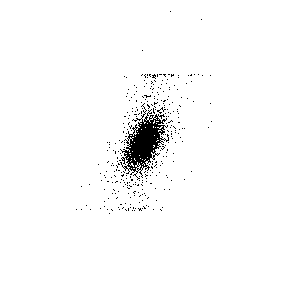

           005930.KS  000660.KS
005930.KS   1.000000   0.430866
000660.KS   0.430866   1.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf # !pip install yfinance

def give_me_df(ticker):
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:]

def join_dfs(*dfs):
    for idx, df_ in enumerate(dfs):
        if idx == 0:
            df = df_
        else:
            df = df.join(df_, how='inner')
    return df

df1 = give_me_df('005930.KS') # 삼성전자
df2 = give_me_df('000660.KS') # 하이닉스
#df2 = give_me_df('015760.KS') # 한국전력

df = join_dfs(df1, df2)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df.iloc[:,0], df.iloc[:,1], 'k,')
ax.set_xlim(-0.3, 0.3)
ax.set_ylim(-0.3, 0.3)
ax.axis('off')
ax.set_aspect('equal')
plt.show()

print(df.corr())

###### ***Jensen's Inequality***

***Definition***

$\varphi:\mathbb{R}\rightarrow\mathbb{R}$ is 
convex if for any $x$, $y$ and $0<\lambda<1$
$$
\varphi(\lambda x+(1-\lambda)y)
\le
\lambda \varphi(x)+(1-\lambda)\varphi(y)
$$
$\varphi:\mathbb{R}\rightarrow\mathbb{R}$ is 
strictly convex if for any $x$, $y$ and $0<\lambda<1$
$$
\varphi(\lambda x+(1-\lambda)y)
<
\lambda \varphi(x)+(1-\lambda)\varphi(y)
$$

***Jensen's Inequality***

\begin{array}{llllll}
\mbox{If $\varphi$ convex,}&&\mathbb{E}\varphi(X)\ge\varphi(\mathbb{E}X)\nonumber\\
\nonumber\\
\mbox{If $\varphi$ strictly convex,}&&\mathbb{E}\varphi(X)=\varphi(\mathbb{E}X)\ \ \Leftrightarrow\ \ X=\mathbb{E}X\nonumber
\end{array}

***Proof***

$$
\varphi(X)\ge \alpha(X-\mu)+\varphi(\mu)
\ \ \stackrel{\mbox{Take expectation}}{\Rightarrow}\ \ 
\mathbb{E}\varphi(X)\ge \alpha\mathbb{E}(X-\mu)+\varphi(\mu)=\varphi(\mu)=\varphi(\mathbb{E}X)
$$

***Example***

\begin{array}{lllll}
\varphi(x)=x^2\quad\quad\ &\quad\Rightarrow\quad&\mathbb{E}X^2\ge (\mathbb{E}X)^2\nonumber\\
\nonumber\\
\varphi(x)=|x|\quad\quad\ &\quad\Rightarrow\quad&\mathbb{E}|X|\ge |\mathbb{E}X|\nonumber\\
\nonumber\\
\varphi(x)=e^x\quad\quad\ &\quad\Rightarrow\quad&\mathbb{E}e^X\ge e^{\mathbb{E}X}\nonumber\\
\nonumber\\
\varphi(x)=-\log x\ &\quad\Rightarrow\quad&\mathbb{E}\log X\le \log \mathbb{E}X\ \ \mbox{for $X>0$}\nonumber
\end{array}

###### ***Example - Variance of Coin Related Random Variables***


\begin{array}{ccc}\hline
\mbox{Distribution}&\mbox{Expectation}&\mbox{Variance}\\\hline
B(p)&p&pq\\
B(n,p)&np&npq\\
Geo(p)&\frac{1}{p}&\frac{q}{p^2}\\
NB(r,p)&\frac{r}{p}&\frac{rq}{p^2}\\\hline
\end{array}

\begin{eqnarray}
X\sim B(p)
&\Rightarrow&\mathbb{E}(X^2)=\mathbb{E}(X)=p\nonumber\\
&\Rightarrow&Var(X)=\mathbb{E}(X^2)-(\mathbb{E}X)^2=p-p^2=p(1-p)=pq\nonumber
\end{eqnarray}


\begin{eqnarray}
X\sim B(n,p)
&\Rightarrow&X=\sum_{i=1}^nX_i,\ X_i\ \mbox{iid}\ B(p)\nonumber\\
&\Rightarrow&Var(X)=\sum_{i=1}^nVar(X_i)=npq\nonumber
\end{eqnarray}



\begin{eqnarray}
1+x+x^2+\cdots=\frac{1}{1-x}
&\stackrel{\mbox{Diff wrt $x$}}{\Rightarrow}&1+2x+3x^2+\cdots=\frac{1}{(1-x)^2}\nonumber\\
&\stackrel{\mbox{Diff wrt $x$}}{\Rightarrow}&2\cdot 1+3\cdot 2 x+4\cdot 3 x^2\cdots=\frac{2}{(1-x)^3}\nonumber\\
&\stackrel{\mbox{Let $x=q$}}{\Rightarrow}&2\cdot 1+3\cdot 2 q+4\cdot 3 q^2\cdots=\frac{2}{p^3}\nonumber
\end{eqnarray}
\begin{eqnarray}
X\sim Geo(p)
&\Rightarrow&\mathbb{E}[X(X-1)]=\left(\sum_{k=1}^{\infty} k(k-1)q^{k-2}\right)qp=\frac{2q}{p^2}\nonumber\\
&\Rightarrow&\mathbb{E}X^2=\mathbb{E}[X(X-1)+X]=\mathbb{E}[X(X-1)]+\mathbb{E}X=\frac{2q}{p^2}+\frac{1}{p}\nonumber\\
&\Rightarrow&Var(X)=\mathbb{E}X^2-(\mathbb{E}X)^2=\frac{2q}{p^2}+\frac{1}{p}-\frac{1}{p^2}=\frac{q}{p^2}\nonumber
\end{eqnarray}


\begin{eqnarray}
X\sim NB(r,p)
&\Rightarrow&X=\sum_{i=1}^rX_i,\ X_i\ \mbox{iid}\ Geo(p)\nonumber\\
&\Rightarrow&Var(X)=\sum_{i=1}^rVar(X_i)=\frac{rq}{p^2}\nonumber
\end{eqnarray}

###### ***How to Measure Typical Size of Error or Deviation from Mean***

***First Try***

$$
\underbrace{\mathbb{E}}_{\mbox{Average}}
\underbrace{(X-\mathbb{E}X)}_{\mbox{Error}}
$$
However, this try is fertile:
$
\mathbb{E}(X-\mathbb{E}X)=\mathbb{E}X-\mathbb{E}X=0
$.

***Second Try***

$$
\underbrace{\mathbb{E}}_{\mbox{Average}} 
\Big|
\underbrace{X-\mathbb{E}X}_{\mbox{Error}}
\Big|
$$
Due to computational difficulties,
this measure of typical  error size is not popular.

***Standard Way to Measure Typical Error Size***

$$
\underbrace{SD(X)}_{\mbox{Standard deviation}}
\quad=\quad
\sqrt{
\underbrace{\mathbb{E}}_{\mbox{Average}} 
\Big(
\underbrace{X-\mathbb{E}X}_{\mbox{Error}}
\Big)^2
}
\quad=\quad
\sqrt{
Var(X)
}
$$

###### ***Standardization and Reverse Standardization***

***Mean and Variance Lemma for Standardization and Reverse Standardization***

\begin{eqnarray}
\mathbb{E}(aX+b)\quad&=&a\mathbb{E}(X)+b\nonumber\\
Var(aX+b)&=&Var(aX)=a^2Var(X)\nonumber
\end{eqnarray}

***Standardization***

If $X$ has mean $\mu$ and standard deviation $\sigma$,
then
$$
\frac{X-\mu}{\sigma}\quad\mbox{has mean 0 and standard deviation 1}
$$

***Reverse Standardization***

If $X$ has mean 0 and standard deviation 1,
then
$$
\mu+\sigma*X\quad\mbox{has mean $\mu$ and standard deviation $\sigma$}
$$

###### ***Example - Standardization***



We flips a fair coin many times.
\begin{eqnarray}
X_i\quad\quad\quad\quad\ \  &&\mbox{$i^{th}$ flip record,
where $H$ and $T$ are recorded as 1 and 0}\nonumber\\
Y_i:=2X_i-1&&\mbox{$i^{th}$ flip record,
where $H$ and $T$ are recorded as 1 and $-1$}\nonumber
\end{eqnarray}

Calculate the mean and variance of the following related random variables,
i.e., fill up blanks of the below table.

\begin{array}{ccc}\hline
\mbox{Random variable}&\mbox{Mean}&\mbox{Variance}\\\hline
Y_i&&\\
\sum_{i=1}^nY_i&&\\
\frac{\sum_{i=1}^nY_i}{\sqrt{n}}&&\\\hline
\end{array}

***Solution***

\begin{eqnarray}
X_i\ \mbox{iid}\ B(0.5)
&\Rightarrow&\mathbb{E}X_i=0.5,\ Var(X_i)=0.5*(1-0.5)=0.25\nonumber\\
&\Rightarrow&Y_i\ \mbox{iid with}\ \mathbb{E}Y_i=0,\ Var(Y_i)=1\nonumber\\
&\Rightarrow&\mathbb{E}\left(\sum_{i=1}^nY_i\right)=0,\ Var\left(\sum_{i=1}^nY_i\right)=n\nonumber\\
&\stackrel{\mbox{Standardization}}{\Rightarrow}&\frac{\sum_{i=1}^nY_i}{\sqrt{n}}\quad\mbox{has mean 0, variance 1}\nonumber
\end{eqnarray}

\begin{array}{ccc}\hline
\mbox{Random variable}&\mbox{Mean}&\mbox{Variance}\\\hline
Y_i&0&1\\
\sum_{i=1}^nY_i&0&n\\
\frac{\sum_{i=1}^nY_i}{\sqrt{n}}&0&1\\\hline
\end{array}

###***Chapter 6 Sum of Random Variables***

####***Section 1 Mean and Variance of Sum of Random Variables***

#####***In general***



$$
\begin{array}{lll}
\displaystyle 
\mathbb{E}\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^n\mathbb{E}(X_i)\nonumber\\
\displaystyle 
Var\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^nVar(X_i)+\sum_{i\neq j}Cov(X_i,X_j)\nonumber\\
&=&\displaystyle \sum_{i=1}^nVar(X_i)+2\sum_{1\le i< j\le n}Cov(X_i,X_j)\nonumber
\end{array}
$$

#####***If $X_i$ are independent***



$$
\begin{array}
\displaystyle \mathbb{E}\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^n\mathbb{E}(X_i)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^nVar(X_i)\nonumber
\end{array}
$$

#####***If $X_i$ are iid***



\begin{array}{lllllll}
\displaystyle \mathbb{E}\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^n\mathbb{E}(X_i)&=&\displaystyle n\mathbb{E}(X_1)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^nX_i\right)&=&\displaystyle \sum_{i=1}^nVar(X_i)&=&\displaystyle nVar(X_1)\nonumber
\end{array}

####***Section 2 Mean and Variance of Weighted Sum of Random Variables***

#####***In general***



\begin{array}{lll}
\displaystyle \mathbb{E}\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i\mathbb{E}(X_i)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i^2Var(X_i)+\sum_{i\neq j}a_ia_jCov(X_i,X_j)\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i^2Var(X_i)+2\sum_{1\le i< j\le n}a_ia_jCov(X_i,X_j)\nonumber
\end{array}

#####***If $X_i$ are independent***



\begin{array}{llllll}
\displaystyle \mathbb{E}\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i\mathbb{E}(X_i)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i^2Var(X_i)\nonumber
\end{array}

#####***If $X_i$ are iid***



\begin{array}{lllll}
\displaystyle \mathbb{E}\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i\mathbb{E}(X_i)&=&\displaystyle \left(\sum_{i=1}^na_i\right)\mathbb{E}(X_1)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i^2Var(X_i)&=&\displaystyle \left(\sum_{i=1}^na_i^2\right)Var(X_1)\nonumber
\end{array}

####***Section 3 Mean and Variance of Weighted Sum of Random Variables - Matrix Form***

#####***Weighted Sum of Random Variables***

$$
\displaystyle 
S=\sum_{i=1}^na_iX_i
$$

where

\begin{eqnarray}
\mu_i&&\quad \mbox{mean of $X_i$}\nonumber\\
\sigma^2&&\quad \mbox{variance of $X_i$}\nonumber\\
\sigma_{ij}&&\quad \mbox{covariance between $X_i$ and $X_j$}\nonumber\\ 
\rho_{ij}&&\quad \mbox{correlation between $X_i$ and $X_j$}\nonumber
\end{eqnarray}

#####***Mean***



$$
\displaystyle 
\mathbb{E}S=\sum_{i=1}^na_i\mathbb{E}X_i=\sum_{i=1}^na_i\mu_i
$$

#####***Variance***



$$
\displaystyle 
Var(S)
=
\left[\begin{array}{cccc}a_1&a_2&\cdots&a_n\end{array}\right]
\underbrace{\left[\begin{array}{cccc}\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\
\sigma_{21}&\sigma_2^2&\cdots&\sigma_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_n^2\end{array}\right]}_{\Sigma\quad \mbox{Covariance matrix}}
\left[\begin{array}{c}a_1\\a_2\\\vdots\\a_n\end{array}\right]
$$

#####***Proof***





\begin{eqnarray}
\displaystyle 
Var(S)&=&\displaystyle Cov\left(\sum_{i=1}^na_iX_i,\sum_{j=1}^na_jX_j\right)\nonumber\\
&=&\displaystyle \sum_{i=j}a_ia_jCov\left(X_i,X_j\right)+\sum_{i\neq j}a_ia_jCov\left(X_i,X_j\right)\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i^2Var\left(X_i\right)+2\sum_{1\le i< j\le n}a_ia_jCov\left(X_i,X_j\right)\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i^2\sigma_i^2+2\sum_{1\le i<j\le n}a_ia_j\sigma_{ij}\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i\sigma_i^2+2\sum_{1\le i<j\le n}a_ia_j\rho_{ij}\sigma_i\sigma_j\nonumber
\end{eqnarray}

####***Section 4 Examples***

#####***Simple Random Walk***



$$
\displaystyle
S_n 
=\sum_{k=1}^nX_k
$$

where $X_k$ are iid with

$$
\displaystyle
X_k
=\left\{\begin{array}{rll}
1&&\text{with probability }1/2\\
-1&&\text{with probability }1/2
\end{array}\right.
$$

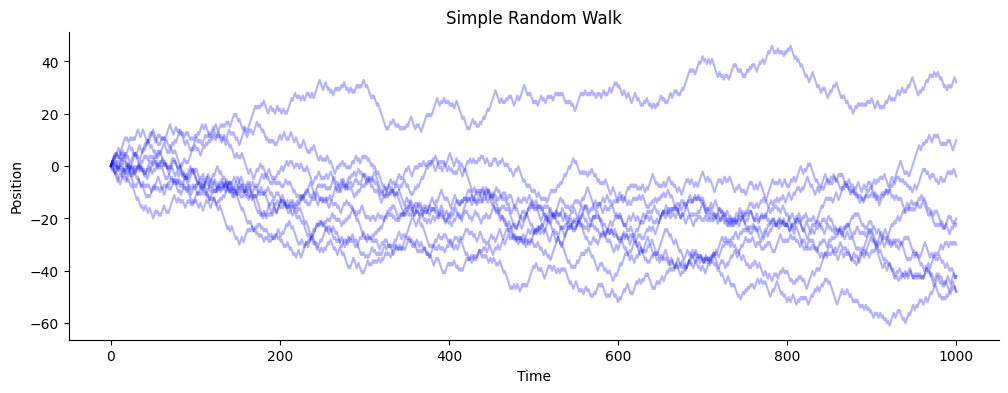

In [ ]:
def main():
    num_paths = 10
    num_steps = 1_000

    srw = SimpleRandomWalk()    
    t, SRW = srw.run_MC(num_paths, num_steps, seed=0)
    
    fig, ax = plt.subplots(figsize=(12,4))
    for i in range(num_paths):
        ax.plot(t, SRW[i], color='blue', alpha=0.3)
    ax.set_xlabel("Time")
    ax.set_ylabel("Position")
    ax.set_title("Simple Random Walk")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()
        
if __name__ == "__main__":
    main() 

#####***Binomial Distribution via  Bernoulli Distribution***

Flip a $p$-coin $n$ times independently and count the number $S$ of heads.
Let $A_i$ be the event that the $i$-th $p$-coin lands on head
and let $1_{A_i}$ be its indicator.

$$
1_{A_i}\ \text{iid}\ B(p)\ \ \Rightarrow\ \ 
S=\sum_{i=1}^n1_{A_i}\sim B(n,p)
$$

***Mean***

$$
\mathbb{E}S=\sum_{i=1}^n\mathbb{E}1_{A_i}=np
$$

***Variance***

$$
Var(S)=\sum_{i=1}^nVar(1_{A_i})=npq
$$

#####***Negative Binomial Distribution via  Geometric Distribution***

Flip a $p$-coin until we have the $r$-th head
and count the number $S$ of flips.
Let $X_i$ be the number of flips 
to have the $i$-th head after I have the $(i-1)$-th head.

$$
X_i\ \text{iid}\ Geo(p)\ \ \Rightarrow\ \ 
S=\sum_{i=1}^rX_i\sim NB(r,p)
$$

***Mean***

$$
\mathbb{E}S=\sum_{i=1}^r\mathbb{E}X_i=\frac{r}{p}
$$

***Variance***

$$
Var(S)=\sum_{i=1}^rVar(X_i)=\frac{rq}{p^2}
$$

#####***Roll Dice 1000 Times***

Roll the dice 1000 times.
Each time 
we gain the face value of the roll if we have odd
and
loose the face value if even.
$$
D_i=\left\{\begin{array}{rl}
1&\text{with probability}\ \frac{1}{6}\\
-2&\text{with probability}\ \frac{1}{6}\\
3&\text{with probability}\ \frac{1}{6}\\
-4&\text{with probability}\ \frac{1}{6}\\
5&\text{with probability}\ \frac{1}{6}\\
-6&\text{with probability}\ \frac{1}{6}\\
\end{array}\right.
$$
To be fair we get 0.5 as an extra for each game.
$$
X_i=D_i+0.5\quad \text{iid}
$$
Let $S$ be the total P\&L after the 1000 games.
Then, $S$ can be represented in terms of $X_i$:
$$
S=\sum_{i=1}^{1000}X_i
$$
where
$$\begin{array}{lll}
(1)&&\mathbb{E}D_i=-0.5,\quad Var(D_i)=14.9167\\
(2)&&\mathbb{E}X_i=0,\quad\quad\ \   Var(X_i)=14.9167
\end{array}$$

***Mean***

$$\displaystyle  \mathbb{E}S=\sum_{i=1}^{1000}\mathbb{E}X_i=0$$

***Variance***

$$\displaystyle  Var(S)=\sum_{i=1}^{1000}Var(X_i)=14916.7$$

#####***Sum of Indicators***

***Example - Number of Pairs with Same Birthday***

There are $n$ people in the class.
Each choose one's birthday independently and uniformly over the 365 days.
Let $S_n$ be the number of pairs with same birthday.
Let $A_{ij}$ be the event that $i$ and $j$ share the common birthday
and let $1_{A_{ij}}$ be its indicator.
$$
S_n=\sum_{1\le i<j\le n}1_{A_{ij}}\quad\text{is not}\ B(m,p),\ m={n\choose 2},\ p=1/365
$$
where
$$\begin{array}{lll}
(1)&&1_{A_{ij}}\sim B(p)\\
(2)&&1_{A_{ij}}\ \text{{\color{red}not} independent (but pairwise independent)}
\end{array}$$

***Mean***

$$\displaystyle  \mathbb{E}S_n=\sum_{1\le i<j\le n}\mathbb{E}1_{A_{ij}}={n\choose 2}\cdot\frac{1}{365}$$

***Variance***

$$\displaystyle  Var(S_n)=\sum_{1\le i<j\le n}Var(1_{A_{ij}})={n\choose 2}\cdot\frac{1}{365}\cdot\frac{364}{365}$$

***Example - Number of Empty Bins***

There are $n$ balls and 365 bins.
Each ball choose one's bin independently and uniformly over the 365 bins
and each ball moves into the chosen bin.
Let $S_n$ be the number of overall empty bins.
Let $A_i$ be the event that the $i$th bin is empty
and let $1_{A_i}$ be its indicator.
$$
S_n=\sum_{i=1}^{365}1_{A_i}\quad\text{is not}\ B(m,p),\ m=365,\ p=(364/365)^n
$$
where
$$\begin{array}{lll}
(1)&&1_{A_i}\sim B(p)\\
(2)&&1_{A_i}\ \text{not independent}
\end{array}$$

***Mean***

$$
\mathbb{E}S_n=\sum_{i=1}^{365}\mathbb{E}1_{A_i}=365p
$$

***Variance***

$$
Var(S_n)=365 Var(1_{A_1})+2{365\choose 2}Cov(1_{A_{1}},1_{A_{2}})
$$

where
$$\begin{array}{lll}
Var(1_{A_1})\quad\quad&=&pq\\
Cov(1_{A_{1}},1_{A_{2}})
&=&P(A_1A_2)-P(A_1)^2
=\left(\frac{363}{365}\right)^n-p^2
\end{array}$$

***Example - Number of Stops***

There are $n$ people in the elevator at the basement.
Each one choose one's stop independently and uniformly over the 365 floors.
Let $X_n$ be the number of overall stops.
We can relate the number $X_n$ of overall stops and the number $S_n$ of empty bins:
$$\begin{array}{lll}
\text{Person}
&\leftrightarrow&
\text{Ball}\\
\text{choose}
&\leftrightarrow&
\text{choose}\\
\text{Floor}
&\leftrightarrow&
\text{Bin}\\
\text{to move}
&\leftrightarrow&
\text{to move}\\
\\
\text{Stops}
&\leftrightarrow&
\text{Bins with balls}\\
\text{Non-stop floors}
&\leftrightarrow&
\text{Empty bins}\\
\\
X_n\quad\text{Number of stops}
&\leftrightarrow&
365-S_n\quad\text{Number of empty bins}
\end{array}$$

***Mean***

$$\displaystyle  \mathbb{E}X_n=365-\mathbb{E}S_n$$

***Variance***

$$\displaystyle  Var(X_n)=Var(S_n)$$





####***Section 5 Coupon Collector Problem***

To collect all the $n$ toys offered by Mc Donald
I start eating the happy meal hamburger.
Whenever I order the happy meal, I get a toy randomly among the $n$ different type of toys.
Let $T_n$ be the minimum number of the happy meal hamburgers that I have to order to collect all the $n$ different type of toys.
Let $\tau_i$ be the minimum number of the happy meals that I have to eat
to collect the $i$-th new toy after I get the $(i-1)$-th new toy.
Then,
$T_n$ can be represented in terms of $\tau_i$:
$$
T_n=\sum_{i=1}^n\tau_i
$$
where
$$\begin{array}{lll}
(1)&&\tau_i\sim Geo(\frac{N-(i-1)}{N})\\
(2)&&\tau_i\ \text{independent}
\end{array}$$

***Mean***

$$
\mathbb{E}T_n=\sum_{i=1}^n\mathbb{E}\tau_i=n\left(1+\frac{1}{2}+\frac{1}{3}+\cdots+\frac{1}{n}\right)\sim n\log n
$$

***Variance***

$$
Var(T_n)=\sum_{i=1}^nVar(\tau_i)=O(n^2)
$$

$$
Var(T_n)
=
\sum_{k=1}^n\frac{1-(k/n)}{(k/n)^2}\\
=
\left(\sum_{k=1}^n\frac{1}{k^2}\right)n^2
-
\left(\sum_{k=1}^n\frac{1}{k}\right)n
\approx
\frac{\pi^2}{6}n^2-n\log n
$$

####***Section 6 Unbiased Estimator***

***Population Parameter***

$$\theta$$

***Samples from Population***

$$X_1,X_2,\cdots,X_n\quad\text{(approximately) iid}$$

***Statistic***

A statistic is 
any function 
$f(X_1,X_2,\cdots,X_n)$ of samples.

***Estimator***

An estimator of $\theta$ is a statistic $f(X_1,X_2,\cdots,X_n)$
used to estimate  $\theta$. 

***Unbiased Estimator***

An estimator
$f(X_1,X_2,\cdots,X_n)$  of  $\theta$ is unbiased if
$$\mathbb{E}f(X_1,X_2,\cdots,X_n)=\theta$$ 

***Example - Unbiased Estimation of Mean and Variance***

Let $X_i$ be $n$ iid samples from a distribution with unknown mean $\mu$ and variance $\sigma^2 $. Then,
$$\begin{array}{lll}
\text{Sample mean}\quad\
&& 
\bar{X}=\frac{\sum_{i=1}^nX_i}{n}\quad\quad\quad\quad\ 
\text{Unbiased estimator of $\mu$}\\
\text{Sample variance}
&&
S^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-1}\quad
\text{Unbiased estimator of $\sigma^2$}
\end{array}$$

***Proof***

$$
\mathbb{E}\bar{X}
=
\frac{\sum_{i=1}^n\mathbb{E}X_i}{n}
=
\mu
$$

$$
Var(\bar{X})=\frac{1}{n^2}Var\left(\sum_{i=1}^nX_i\right)=\frac{1}{n^2}\sum_{i=1}^nVar(X_i)=\frac{\sigma^2 }{n}
$$

$$
(X_i-\bar{X})^2
=
((X_i-\mu)-(\bar{X}-\mu))^2
=
(X_i-\mu)^2+(\bar{X}-\mu)^2-2(X_i-\mu)(\bar{X}-\mu)
$$

$$
\Rightarrow\quad
\mathbb{E}(X_i-\bar{X})^2
=
\sigma^2 +\frac{\sigma^2 }{n}-2\mathbb{E}(X_i-\mu)(\bar{X}-\mu)
$$


$$\begin{array}{lll}
\mathbb{E}(X_i-\mu)(\bar{X}-\mu)
&=&\displaystyle
\mathbb{E}(X_i-\mu)\left(\frac{\sum_{j=1}^n(X_j-\mu)}{n}\right)\\
&=&\displaystyle
\mathbb{E}(X_i-\mu)\left(\frac{\sum_{j\neq i}(X_j-\mu)}{n}+\frac{X_i-\mu}{n}\right)\\
&=&\displaystyle
\frac{1}{n}\mathbb{E}(X_i-\mu)^2=\frac{\sigma^2}{n}
\end{array}$$

$$
\Rightarrow\quad
\mathbb{E}(X_i-\bar{X})^2
=
\sigma^2 +\frac{\sigma^2 }{n}-2\mathbb{E}(X_i-\mu)(\bar{X}-\mu)
=
\frac{n-1}{n}\sigma^2 
$$


$$
\mathbb{E}S^2
=
\frac{\sum_{i=1}^n\mathbb{E}(X_i-\bar{X})^2}{n-1}
=
\sigma^2 
$$

####***Section 7 Hypergeometric Distribution $H(n, m,M)$***

#####***Hypergeometric Distribution Theorem***



$$
\begin{array}{lll}
n&&\text{Number of samples (balls drawn) with/without replacement}\\
m&&\text{Number of balls with marker $H$ in the bin}\\
M&&\text{Number of balls in the bin}\\
p&=&\displaystyle\frac{m}{M}\\
f&=&\displaystyle\sqrt{\frac{M-n}{M-1}}
\end{array}
$$

Take $n$ balls with or without replacement 
and
count the number $X$ or $Y$ of heads or markers.

$$\begin{array}{lcll}
&\text{distribution}&\text{mean}&\text{variance}\\\hline
\text{with replacement}&X\sim B(n,p)&np&npq\\
\text{without replacement}&Y\sim H(n,m,M)&np&npqf^2\\
\end{array}$$

######***Proof***



$$
\displaystyle Y=\sum_{i=1}^n 1_{A_i}
$$

where $A_i$ is the event that the $i$-th chosen ball is marked.

$$
\begin{array}{lll}
Var(Y)
&=&\displaystyle \sum_{i=1}^nVar(1_{A_i})+2\sum_{1\le i<j\le n}Cov(1_{A_i},1_{A_j})\\
&=&\displaystyle nVar(1_{A_1})+2{n\choose 2}Cov(1_{A_1},1_{A_2})\\
&=&\displaystyle npq+2{n\choose 2}\left(p^2\cdot\frac{(m-1)/m}{(M-1)/M}-p^2\right)\\
&=&\displaystyle npq+n(n-1)\left(p^2\cdot\frac{(m-1)/m}{(M-1)/M}-p^2\right)\\
&=&\displaystyle np\left[q+(n-1)\left(\frac{(m-1)/m}{(M-1)/M}-1\right)p\right]\\
&=&\displaystyle np\left[q+(n-1)\frac{-M+m}{m(M-1)}p\right]\\
&=&\displaystyle np\left[q+(n-1)\frac{-qM}{m(M-1)}\frac{m}{M}\right]\\
&=&\displaystyle npq\left[1+(n-1)\frac{-M}{m(M-1)}\frac{m}{M}\right]\\
&=&\displaystyle npq\left[\frac{M-n}{M-1}\right]\\
&=&npqf^2
\end{array}
$$


#####***Example - Number of Aces in Hands***



We takes five cards out of 52 cards and count the number $X$ of aces in hands. Compute the mean and variance of $X$.

$$
X\sim H(5,4,52)
\quad\Rightarrow\quad
EX=np,\quad Var(X)=npqf^2
$$

where

$$
\displaystyle
n=5,\quad p=\frac{4}{52},\quad f^2=\frac{52-5}{52-1}
$$

###***Chapter 7 Poisson Approximation***

####***Section 1 Poisson Distribution***

#####***PMF***



$$
P(X=k)=e^{-\lambda}\frac{\lambda^k}{k!}\quad\text{for $k=0,1,2,\ldots$}
$$

#####***Coin Flip Related Distributions***



$$\begin{array}{ll}
\text{distribution}&\text{random variable}\\\hline
B(p)&\text{Flip a $p$-coin and check whether we have a head}\\
B(n,p)&\text{Flip a $p$-coin $n$ times and count the number of heads}\\
Po(\lambda)\approx B(n,p)&\text{Flip a $p$-coin $n$ times and count the number of heads,}\\
&\text{where $n$ is large, $p$ is small, $np=\lambda$ is medium}\\
Geo(p)&\text{Flip a $p$-coin until first head and count the number of flips}\\
NB(r,p)&\text{Flip a $p$-coin until $r$-th head and count the number of flips}
\end{array}$$

#####***Mean and Variance of Coin Flip Related Distributions***



$$\begin{array}{lcc}
\text{distribution}&\text{mean}&\text{variance}\\\hline
B(p)&p&pq\\
B(n,p)&np&npq\\
Po(\lambda)\approx B(n,p)&\lambda\approx np&\lambda\approx npq\\
Geo(p)&\frac{1}{p}&\frac{q}{p^2}\\
NB(r,p)&\frac{r}{p}&\frac{rq}{p^2}\\
\end{array}$$

#####***PMF, CDF, and Sampling from $Po(10)$***

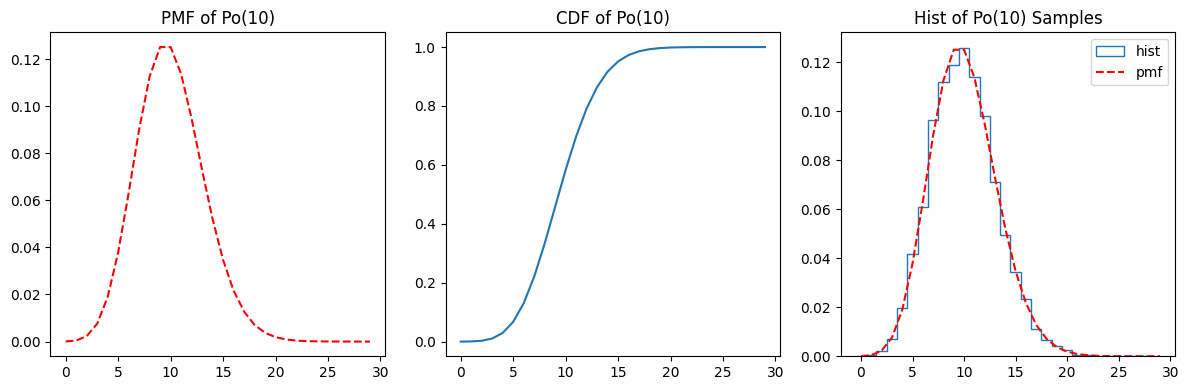

In [14]:
def main():
    la = 10
    n = 10_000
    x = np.arange(0,30)
    pmf = stats.poisson(la).pmf(x)
    cdf = stats.poisson(la).cdf(x)
    samples = stats.poisson(la).rvs(n) 

    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4)) 
    ax0.plot(x,pmf,'--r')
    ax1.plot(x,cdf)
    ax2.hist(samples, bins=x-0.5, density=True, histtype='step', label="hist")
    ax2.plot(x, pmf, '--r', label="pmf")
    ax2.legend()
    ax0.set_title(f'PMF of Po({la})')
    ax1.set_title(f'CDF of Po({la})')
    ax2.set_title(f'Hist of Po({la}) Samples')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 Poisson Approximation of Binomial Distribution***

###### ***Poisson Approximation of Binomial Distribution***



$$\begin{array}{llll}
\text{distribution}&\text{mean}&\text{variance}&\text{random variable}\\\hline
B(n,p)&np&npq&\text{Flip a $p$-coin $n$ times and count the number of heads}\\
Po(\lambda)\approx B(n,p)&\lambda= np&\lambda\approx npq&\text{Flip a $p$-coin $n$ times and count the number of heads,}\\
&&&\text{where $n$ is large, $p$ is small, $np=\lambda$ is medium}\\
\end{array}$$


######***Proof***



$$\begin{array}{lll}
P(X=k)
&=&\displaystyle {n\choose k}p^k(1-p)^{n-k}\\
&=&\displaystyle \frac{n(n-1)(n-2)\cdots (n-k+1)}{k!}\left(\frac{\lambda}{n}\right)^k\left(1-\frac{\lambda}{n}\right)^{n-k}\\
&=&\displaystyle 
\frac{1}{k!}\frac{n(n-1)(n-2)\cdots (n-k+1)}{n^k}\lambda^k
\left(1-\frac{\lambda}{n}\right)^{n}
\left(1-\frac{\lambda}{n}\right)^{-k}\\
&\rightarrow&\displaystyle 
\frac{1}{k!}\cdot 1^k\cdot \lambda^k\cdot e^{-\lambda}\cdot 1
=
\frac{\lambda^k}{k!}e^{-\lambda}
\end{array}$$

#####***Simulation - Poisson Approximation of Binomial Distribution*** 

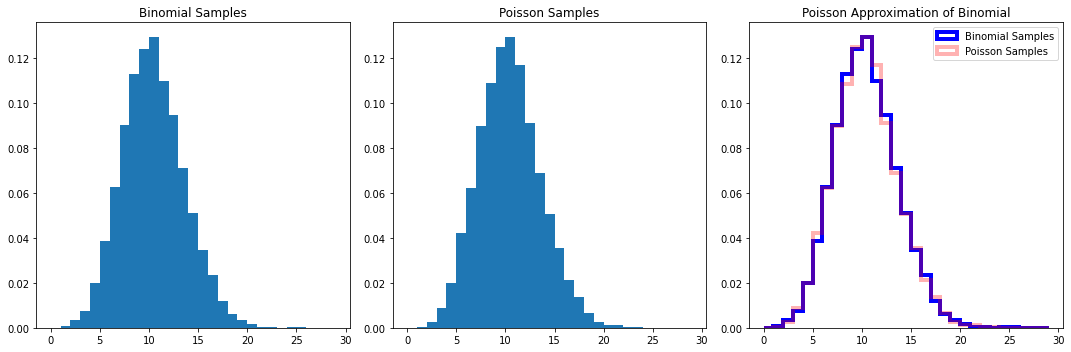

In [ ]:
def main():
    # number of samples to generate
    n_samples = 10_000

    # generate random samples of binomial distribution B(n,p)
    n = 1_000 # n should be large
    p = 0.01 # p should be small
    bin_samples = np.random.binomial(n, p, (n_samples,))

    # generate random samples of Poisson distribution Po(la)
    la = n*p # la should be reasonable
    po_samples = np.random.poisson(la, (n_samples,))
    
    # plot histogram of generated random samples of binomial distribution B(n,p)
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15, 5))

    ax0.set_title("Binomial Samples")
    ax0.hist(bin_samples, bins=np.arange(int(3*n*p)), density=True)
    
    ax1.set_title("Poisson Samples")
    ax1.hist(po_samples, bins=np.arange(int(3*n*p)), density=True)
    
    ax2.set_title("Poisson Approximation of Binomial")
    ax2.hist(bin_samples, bins=np.arange(int(3*n*p)), density=True,
            label='Binomial Samples', color='b', alpha=1, histtype='step', 
            linewidth=4)
    ax2.hist(po_samples, bins=np.arange(int(3*n*p)), density=True,
            label='Poisson Samples', color='r', alpha=0.3, histtype='step', 
            linewidth=4)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
       
if __name__ == "__main__":
    main()

####***Section 3 Poisson Approximation of Sum of Indicators***

#####***Poisson Approximation of Sum of Indicators***



$$Po(\lambda) \approx \sum_{i=1}^n X_i\quad\mbox{where}\ X_i \sim B(p_i)$$

#####***Error Bound***





$$\begin{array}{lll}
A_i&&\text{Independent events with $p_i=P(A_i)$}\\
1_{A_i}&&\text{Independent random variables with $1_{A_i}\sim B(p_i)$}\\
X=\sum_{i=1}^n1_{A_i}&&\text{not $B(n,p)$ in general}
\end{array}$$

Then, with $Y\sim Po(\lambda)$, $\lambda=\sum_{i=1}^np_i$,
for any $A$
$$
\left|P\left(X\in A\right)-P(Y\in A)\right|
\le 
\sum_{i=1}^np^2_i
\le \left(\max_{1\le i\le n}p_i\right)\left(\sum_{i=1}^np_i\right)=\left(\max_{1\le i\le n}p_i\right)\lambda
$$

#####***Simulation - Poisson Approximation of Sum of Indicators***

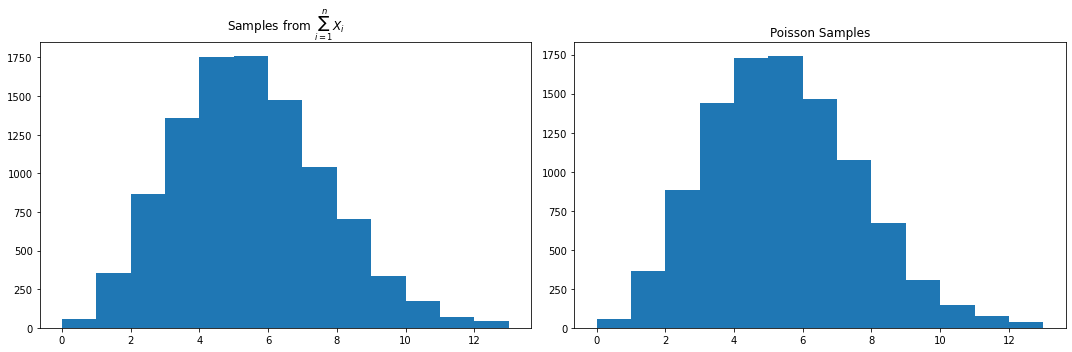

In [ ]:
def main():
    # number of samples to generate
    n_samples = 10000

    # generate random samples of \sum_{i=1}^n X_i where X_i \sim B(p_i)
    n = 1000
    p = np.random.uniform(0.,1., (n,1)) / 100 # p is not fixed, but small random
    uniform_samples = np.random.uniform(0., 1., (n, n_samples))
    bool_from_uniform_samples = (uniform_samples > 1-p)
    bin_samples = np.sum(bool_from_uniform_samples, axis=0)

    # generate random samples of Poisson distribution Po(la)
    la = np.sum(p)
    po_samples = np.random.poisson(lam=la, size=n_samples)

    fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax0.hist(bin_samples, np.arange(int(3*la)))
    ax1.hist(po_samples, np.arange(int(3*la)))
    ax0.set_title("Samples from $\sum_{i=1}^n X_i$")
    ax1.set_title("Poisson Samples")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 4 Birthday Problem*** 

#####***Number of Couples with Same Birthday***



Approximately 80,000 marriage took place in NY. 
Estimate the probability that
there are more than 250 couples with same birthday
who married in NY last year. 
$$S_n=\sum_{i=1}^n1_{A_{i}}\sim B(n,p)\approx Po(\lambda)$$

#####***Exact Probability Using $S_n\sim B(n,p)$***



$$P(S_n>250)=0.0187$$

#####***Approximate Probability Using $X\sim Po(\lambda)$***



$$P(X>250)=0.0188$$

#####***Theoretical Error Bound***









$$|P(S_n>250)-P(X>250)|
\le\sum_{i=1}^np_i^2=80000*\left(\frac{1}{365}\right)^2=0.6005$$

In [ ]:
def main():
    n = 80000
    p = 1/365
    q = 1-p
    la = n*p
    m = 250

    # exact
    Prob = q**n
    Cum_Prob = Prob
    for i in range(1,m+1):
        Prob = Prob*(n-(i-1))/i*p/q
        Cum_Prob = Cum_Prob+Prob 
    Binomial_Exact_Prob = 1 - Cum_Prob

    # poisson approximation
    Prob = np.exp(-la)
    Cum_Prob = Prob
    for i in range(1,m+1):
        Prob = Prob*la/i
        Cum_Prob = Cum_Prob+Prob
    Poisson_Approximate_Prob = 1 - Cum_Prob

    print('Binomial_Exact_Prob      : ', Binomial_Exact_Prob)
    print('Poisson_Approximate_Prob : ', Poisson_Approximate_Prob)

if __name__ == "__main__":
    main()

Binomial_Exact_Prob      :  0.018670951945806147
Poisson_Approximate_Prob :  0.018804926458430904


###***Chapter 8 Poisson Point Process***

###### ***Construction of Poisson Point Process $PPP(\lambda)$ with Intensity $\lambda$ using $p$-Coin Flips***

$$\begin{array}{ll}
\text{Number of ticks per year}&n\\
\text{$p$-coin flip at tick $k$}&\text{$H$ with marker and $T$ with no marker}\\
\text{Number of ticks between $0$ and $t$}&nt\\
\text{Number $N([0,t])$ of markers  between $0$ and $t$}& B(nt,p)\approx Po(\lambda t)\\
\text{Number of ticks between $s$ and $t$}&n(t-s)\\
\text{Number $N([s,t])$ of markers  between $s$ and $t$}&B(n(t-s),p)\approx Po(\lambda(t-s))\\
\end{array}$$

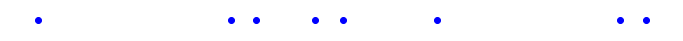

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_ppp_using_coin(la, n, T=8):
    p = la / n 
    x = np.random.binomial(1, p, size=(int(n*T),))
    
    fig, ax = plt.subplots(1,1,figsize=(12,0.5))
    for i, coin in enumerate(x):
        if coin:
            ax.plot([i/n],[0],'o',color='blue')
    ax.axis('off')
    plt.show()
    
def main():
    la = 1
    n = 1000
    simulate_ppp_using_coin(la, n, T=8)
        
if __name__ == "__main__":
    main()

###### ***Definition of Poisson Point Process $PPP(\lambda)$ with Intensity  $\lambda$***

For each finite interval $I$ we attach a random variable $N(I)$.
A collection of random variables $N(I)$ is the Poisson point process $PPP(\lambda)$ with intensity  $\lambda$ if
$$\begin{array}{llll}
(1)&N([s,t])\sim Po(\lambda (t-s))\\
(2)&\text{For any $t_0<t_1<t_2<\cdots<t_m$, $N([t_{i-1},t_i])$ are all independent}\\
\end{array}$$ 

$N([s,t])\sim Po(\lambda (t-s))$


$$
N([s,t])\sim B(n(t-s),p)\approx Po(\lambda  (t-s))
\quad\text{if $n$ goes to the infinite}
$$










$N([0,t])$ has independent increments




For any 
$t_0<t_1<t_2<\cdots<t_m$
the coin flips in one time interval $[t_i,t_{i-1}]$
are completely different from 
the coin flips in other time interval $[t_j,t_{j-1}]$.
So, 
$$
N([t_{i-1},t_i])\ \text{are all independent}
$$

######***Discrete vs Continuous Random Variables - Distribution***


$$
\sum\ \text{with discrete random variable}
\quad\Longrightarrow\quad
\int\ \text{with continuous random variable}
$$



$$\begin{array}{|c|c|c|} \hline
&\text{Discrete random variable}&\text{Continuous random variable}\\\hline \hline
\text{Possible values}&\text{Discrete}&\text{Continuous}\\\hline
\text{PMF/PDF} & \displaystyle 0\le p_x\le 1 &  \displaystyle 0\le f(x)\le\infty\\\hline
\end{array}$$

***Meaning***


$$
\mathbb{P}(X=x)=p_x,\quad\quad\quad\quad
\mathbb{P}(x\le X\le x+dx)=f(x)dx
$$

***Total mass 1***


$$
\sum_xp_x=1,\quad\quad\quad\quad
\int_{-\infty}^{\infty}f(x)dx=1
$$

***Expectation***


$$
\mathbb{E}X=\sum_xxp_x,\quad\quad\quad\quad
\mathbb{E}X=\int_{-\infty}^{\infty}xf(x)dx
$$

***$k$-th Moment***


$$
\mathbb{E}X^k=\sum_xx^kp_x,\quad\quad\quad\quad
\mathbb{E}X^k=\int_{-\infty}^{\infty}x^kf(x)dx
$$

***Variance***


$$
Var(X)=\mathbb{E}X^2-(\mathbb{E}X)^2,\quad\quad\quad\quad
Var(X)=\mathbb{E}X^2-(\mathbb{E}X)^2
$$

***CDF***


$$
\mathbb{P}(X\le x)=\sum_{s\le x}p_s,\quad\quad\quad\quad
\mathbb{P}(X\le x)=\int_{-\infty}^xf(s)ds
$$


###### ***Discrete vs Continuous Random Variables - Joint Distribution***

$$
\sum\ \text{with discrete random variable}
\quad\Longrightarrow\quad
\int\ \text{with continuous random variable}
$$

$$\begin{array}{|c|c|c|} \hline
&\text{Discrete random variable}&\text{Continuous random variable}\\\hline \hline
\text{Possible values}&\text{Discrete}&\text{Continuous}\\\hline
\text{PMF/PDF} & \displaystyle 0\le p_x\le 1 &  \displaystyle 0\le f(x)\le\infty\\\hline
\text{Joint} &\displaystyle0\le p_{x,y}\le 1&\displaystyle0\le f_{X,Y}(x,y)\le\infty\\\hline
\end{array}$$

***Meaning***

$$
\mathbb{P}(X=x,Y=y)=p_{x,y},\quad\quad\quad\quad
\mathbb{P}(x\le X\le x+dx,y\le Y\le y+dy)=f_{X,Y}(x,y)dxdy
$$

***Total Mass 1***



$$
\sum_x\sum_yp_{x,y}=1,\quad\quad\quad\quad
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f_{X,Y}(x,y)dxdy=1
$$

***Expectation***


$$
\mathbb{E}X=\sum_x\sum_yxp_{x,y},\quad\quad\quad\quad
\mathbb{E}X=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xf_{X,Y}(x,y)dxdy
$$

***$k$-th Moment***


$$
\mathbb{E}X^k=\sum_x\sum_yx^kp_{x,y},\quad\quad\quad\quad
\mathbb{E}X^k=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x^kf_{X,Y}(x,y)dxdy
$$

***Variance***


$$
Var(X)=\mathbb{E}X^2-(\mathbb{E}X)^2,\quad\quad\quad\quad
Var(X)=\mathbb{E}X^2-(\mathbb{E}X)^2
$$

***CDF***

$$
\mathbb{P}(X\le x)=\mathbb{P}(X\le x)=\sum_{s\le x}\sum_yp_{s,y},\quad\quad\quad\quad
\mathbb{P}(X\le x)=\int_{-\infty}^{\infty}\int_{-\infty}^xf(s,y)dsdy
$$

###### ***Discrete vs Continuous Random Variables - Joint, Marginal, Conditional***

***From Joint To Marginal***


$$
p_{x_i}
=\sum_{y_j}p_{x_i,y_j},
\quad\quad\quad\quad
f_X(x)
=
\int_{-\infty}^{\infty}f_{X,Y}(x,y)dy
$$
$$
p_{y_j}
=\sum_{x_i}p_{x_i,y_j},
\quad\quad\quad\quad
f_Y(y)
=
\int_{-\infty}^{\infty}f_{X,Y}(x,y)dx
$$

***From Joint To Conditional***




$$
p_{x_i|y_j}=\frac{p_{x_i,y_j}}{\sum_{x_{i'}}p_{x_{i'},y_j}},
\quad\quad\quad\quad
f_{X|Y}(x|y)
=
\frac{f_{X,Y}(x,y)}{f_Y(y)}
$$
$$
p_{y_j|x_i}=\frac{p_{x_i,y_j}}{\sum_{y_{j'}}p_{x_i,y_{j'}}},
\quad\quad\quad\quad
f_{Y|X}(y|x)
=
\frac{f_{X,Y}(x,y)}{f_X(x)}
$$



***From Marginal And Conditional To Joint***


$$
p_{x_i,y_j}=p_{x_i}p_{y_j|x_i},
\quad\quad\quad\quad
f_{X,Y}(x,y)=f_X(x)f_{Y|X}(y|x)
$$
$$
p_{x_i,y_j}=p_{y_j}p_{x_i|y_j},
\quad\quad\quad\quad
f_{X,Y}(x,y)=f_Y(y)f_{X|Y}(x|y)
$$

###### ***Discrete vs continuous random variables - Independence***

How to check independency

$$\begin{array}{lll}
\text{For PMF}&&
p_{x_i,y_j}=p_{x_i}p_{y_j}\\
\text{For PDF}&&
f_{X,Y}(x,y)=f_X(x)f_Y(y)
\end{array}$$

###### ***CDF and Quantile Function***

$$\begin{array}{lll}
F&&\text{CDF}\\
F^{-1}&&\text{Quantile Function}
\end{array}$$

***CDF***

A CDF $F$ has the following three properties:
$$\begin{array}{lll}
(1)&&\displaystyle x_1<x_2\ \ \Rightarrow\ \ F(x_1)\le F(x_2)\\
(2)&&\displaystyle \lim_{x\rightarrow-\infty}F(x)=0\ \ \text{and}\ \ \lim_{x\rightarrow\infty}F(x)=1\\
(3)&&\displaystyle \lim_{x\downarrow x_0}F(x)=F(x_0)\ \ \text{and}\ \ \lim_{x\uparrow\infty}F(x)=F(x_0-)
\end{array}$$
Conversely, if a function $F$ satisfies the above three, then we can interpret $F$ as a CDF of a distribution.
If $F$ is a CDF, then it satisfies
$$\begin{array}{lll}
(4)&&\displaystyle F(x_0)-F(x_0-)=\mathbb{P}(X=x_0)\\
(5)&&\displaystyle \displaystyle \frac{d}{dx}F(x)=f(x)\quad\text{if $X$ has the PDF $f$}\\
(6)&&\displaystyle P(a\le X\le b)=F(b)-F(a)\quad\text{if $X$ is continuous}\\
(7)&&\displaystyle P(X\ge x)=1-P(X\le x)=1-F(x)\quad\text{if $X$ is continuous}
\end{array}$$

***Quantile Function $F^{-1}$ and Quantile $q_\alpha$***

The $\alpha$ quantile of $F$ is the value $q_\alpha$ such that
$$
F(q_\alpha)=\mathbb{P}(X\le q_\alpha)=\alpha
$$

$$\begin{array}{lllllllllll}
\text{1\% quantile $q_{0.01}$}&&&&q_{0.01}=F^{-1}(0.01)\\
\text{5\% quantile $q_{0.05}$}&&&&q_{0.05}=F^{-1}(0.05)
\end{array}$$

***Quartile $Q_i$***

***First quartile $Q_1$***
$$
q_{0.25}=F^{-1}(0.25)
$$

***Median $Q_2$***
$$
q_{0.5}=F^{-1}(0.5)
$$

***Third quartile $Q_3$*** 
$$
q_{0.75}=F^{-1}(0.75)
$$

***Example - CDF of $U(0,1)$***

$$\begin{array}{lll}
f(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
1&\text{for $0\le x\le 1$}\\
0&\text{for $x\ge 1$}\\
\end{array}\right.
&\stackrel{\text{Integrate}}{\Rightarrow}&
F(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
x&\text{for $0\le x\le 1$}\\
1&\text{for $x\ge 1$}\\
\end{array}\right.\\
F(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
x&\text{for $0\le x\le 1$}\\
1&\text{for $x\ge 1$}\\
\end{array}\right.
&\stackrel{\text{Differentiate}}{\Rightarrow}&
f(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
1&\text{for $0\le x\le 1$}\\
0&\text{for $x\ge 1$}\\
\end{array}\right.
\end{array}$$



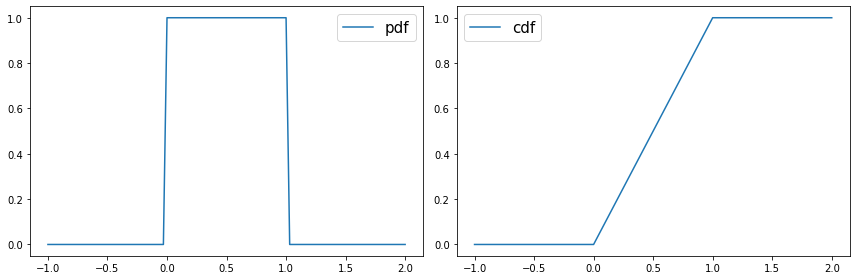

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,2,100)
pdf = np.zeros_like(x)
pdf[ (0<=x) * (x<=1) ] = 1

cdf = x.copy()
cdf[x<=0] = 0
cdf[x>=1] = 1

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
ax0.plot(x,pdf,label='pdf')
ax1.plot(x,cdf,label='cdf')
for ax in (ax0, ax1):
    ax.legend(fontsize=15)
plt.tight_layout()
plt.show()

####***Section 10 Exponential Distribution***

#####***Exponential Distribution $Exp(\lambda)$***

***Intuition***


First arrival time of Poisson point of intensity $\lambda$

***PDF***

$$
f(x)=\lambda e^{-\lambda x}
\quad\text{for $x\ge 0$}
$$

***CDF***

$$
\displaystyle
F(t):=P(T\le t)=1-e^{-\lambda t}\quad \text{for $t\ge 0$}
$$

***Survival Function***



$$
\displaystyle
\bar{F}(t):=1-F(t)=P(T>t)=e^{-\lambda t}\quad \text{for $t\ge 0$}
$$

$$\begin{array}{ll}
\text{Distribution}&\text{Random variable}\\\hline
B(p)&\text{Flip a $p$-coin and check whether we have a head}\\
B(n,p)&\text{Flip a $p$-coin $n$ times and count the number of heads}\\
Po(\lambda)\approx B(n,p)&\text{Flip a $p$-coin $n$ times and count the number of heads,}\\
&\text{where $np=\lambda$ is fixed and $n\rightarrow\infty$}\\
Geo(p)&\text{Flip a $p$-coin until first head and count the number of flips}\\
\displaystyle Exp(\lambda)\approx \frac{1}{n} Geo(p)&\text{Flip a $p$-coin until first head and measure time,}\\
&\text{where $np=\lambda$ is fixed and $n\rightarrow\infty$}\\
&\text{and the number of flips in unit time interval is $n$}\\
NB(r,p)&\text{Flip a $p$-coin until $r$-th head and count the number of flips}
\end{array}$$

$$\begin{array}{lcc}
\text{Distribution}&\text{Expectation}&\text{Variance}\\\hline
B(p)&p&pq\\
B(n,p)&np&npq\\
Po(\lambda)\approx B(n,p)&\lambda&\lambda\\
Geo(p)&\displaystyle \frac{1}{p}&\displaystyle \frac{q}{p^2}\\
\displaystyle Exp(\lambda)\approx \frac{1}{n} Geo(p)&\displaystyle \frac{1}{\lambda}&\displaystyle \frac{1}{\lambda^2}\\
NB(r,p)&\displaystyle \frac{r}{p}&\displaystyle \frac{rq}{p^2}
\end{array}$$

$$\begin{array}{lll}
EX
&=&\displaystyle 
\int_0^{\infty}t\lambda  e^{-\lambda t}dt
=
\int_0^{\infty}t(-e^{-\lambda t})'dt
=
\left[t(-e^{-\lambda t})\right]_0^{\infty}-\int_0^{\infty}(t)'(-e^{-\lambda t})dt\\
&=&\displaystyle 
\int_0^{\infty}e^{-\lambda t}dt
=
\left[\frac{e^{-\lambda t}}{-\lambda}\right]_0^{\infty}=\frac{1}{\lambda}\\
\\
EX^2
&=&\displaystyle 
\int_0^{\infty}t^2\lambda  e^{-\lambda t}dt
=
\int_0^{\infty}t^2(-e^{-\lambda t})'dt
=
\left[t^2(-e^{-\lambda t})\right]_0^{\infty}-\int_0^{\infty}(t^2)'(-e^{-\lambda t})dt\\
&=&\displaystyle 
2\int_0^{\infty}te^{-\lambda t}dt
=
\frac{2}{\lambda}\int_0^{\infty}t\lambda e^{-\lambda t}dt=\frac{2}{\lambda}EX=\frac{2}{\lambda^2}
\end{array}$$


$$\begin{array}{lll}
Var(X)
&=&\displaystyle 
\frac{1}{\lambda^2}
\end{array}$$



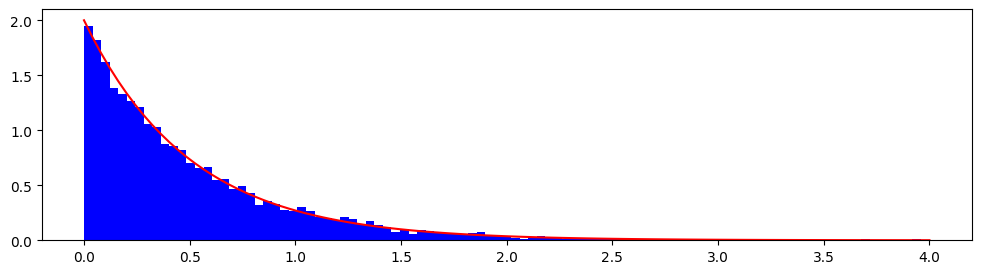

In [ ]:
def main():
    n = 10000
    la = 2.0
    bt = 1 / la

    sample = np.random.exponential(scale=bt, size=(n,))
    x = np.linspace(0,4,100)
    y = np.exp(-la*x) * la

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(x, y, color='r')
    ax.hist(sample, density=True, bins=np.linspace(0,4,100), color='b')
    plt.show()

if __name__ == "__main__":
    main()

###### ***Exponential Approximation***

If $n$ is large, $p$ is small, $np=\lambda$ is medium,
$$\frac{1}{n}Geo(p)\approx Exp(\lambda)$$
meaning, with $X\sim Geo(p)$, $Y\sim Exp(\lambda)$, for any $t\ge 0$
$$
P\left(\frac{1}{n}X>t\right)
\quad\approx\quad 
P(Y>t)
$$
or
$$
P\left(\frac{1}{n}X=t\right)
\quad\approx\quad 
f_Y(t)dt
$$

***Exact Mean Match and Approximate Variance Match***

$$\begin{array}{lccc}
\text{When $n$ large, $p$ small ($q\approx 1$), $np=\lambda$ medium}&\text{Exact}&&\text{Approximate}\\\hline
\text{Distribution of Number of $p$-coin flips to first head}&Geo(p)&-&-\\
\text{Distribution of Time to first head}&\displaystyle \frac{1}{n}Geo(p)&\approx&Exp(\lambda)\\
\text{(Exact) Mean match}  &\displaystyle  \frac{1}{np}& =&\displaystyle  \frac{1}{\lambda}\\
\text{(Approximate) Variance match}  &\displaystyle \frac{q}{(np)^2}& \approx&\displaystyle \frac{1}{\lambda^2}
\end{array}$$

$$
P\left(\frac{1}{n}X>t\right)
=
\sum_{i=nt+1}^{\infty}q^{i-1}p
=
q^{nt}
=
\left(1-\frac{\lambda}{n}\right)^{nt}
\quad\approx\quad 
e^{-\lambda t}
=
P(Y>t)
$$

$$
P\left(\frac{1}{n}X=t\right)
=
q^{nt-1}p
=
\lambda
\left(1-\frac{\lambda}{n}\right)^{nt-1}\underbrace{\frac{1}{n}}_{dt}
\quad\approx\quad 
\lambda e^{-\lambda t} dt
=
f_Y(t)dt
$$





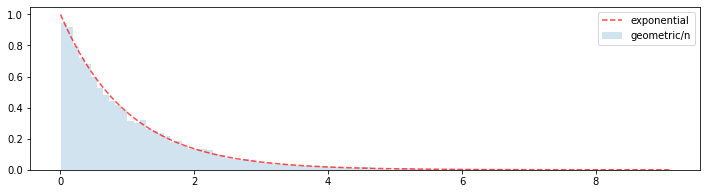

In [ ]:
def main():
    la = 1
    n = 1_000
    p = la / n

    n_sim = 10_000
    x_geo = stats.geom(p).rvs(n_sim) / n

    fig, ax = plt.subplots(figsize=(12,3))
    _, bins, _ = ax.hist(x_geo, bins=100, density=True, alpha=0.2, label="geometric/n")
    exp_pdf = stats.expon(scale=1/la).pdf(bins)
    ax.plot(bins, exp_pdf, "--r", label="exponential", alpha=0.7)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

###### ***Memoryless Properties of Geometric and Exponential Distribution***


***Geometric distribution***
$$
P(X>t|X>s)=\frac{q^t}{q^s}=q^{t-s}=P(X>t-s)
$$
***Exponential distribution***
$$
P(X>t|X>s)=\frac{e^{-\lambda t}}{e^{-\lambda  s}}=e^{-\lambda  (t-s)}=P(X>t-s)
$$

######***Construction of Poisson Point Process $PPP(\lambda)$ using an $Exp(\lambda)$-coin***

$$\begin{array}{ll}
\text{Number of ticks per year}&n\\
\text{$p$-coin flip at tick $k$}&\text{$H$ with marker and $T$ with no marker}\\
\text{Number of ticks between $0$ and $t$}&nt\\
\text{Number $N([0,t])$ of markers  between $0$ and $t$}& B(nt,p)\approx Po(\lambda t)\\
\text{Number of ticks between $s$ and $t$}&n(t-s)\\
\text{Number $N([s,t])$ of markers  between $s$ and $t$}&B(n(t-s),p)\approx Po(\lambda(t-s))\\
\text{Number of ticks to first head}&Geo(p)\\
\text{Time $T_1$ to first head}&\frac{1}{n}*Geo(p)\approx Exp(\lambda)\\
\text{Number of ticks to next head after $i$-th head}&Geo(p)\\
\text{Time $T_{i+1}$ to next head after $i$-th head}&\frac{1}{n}*Geo(p)\approx Exp(\lambda)
\end{array}$$

***Construction of Poisson Point Process $PPP(\lambda)$ using an $Exp(\lambda)$-coin***

[Step 1] Generate iid $T_i$ from $Exp(\lambda)$.

[Step 2] Put a market at $T_1$, $T_1+T_2$, $T_1+T_2+T_3$,$\cdots$.

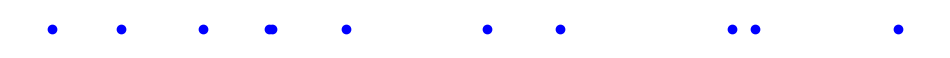

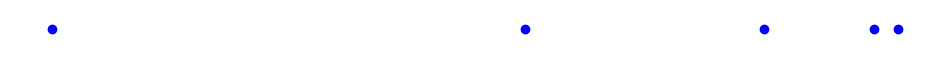

In [ ]:
def simulate_ppp_using_coin(la, n, T=8):
    p = la / n 
    x = np.random.binomial(1, p, size=(int(n*T),))
    
    fig, ax = plt.subplots(1,1,figsize=(12,0.5))
    for i, coin in enumerate(x):
        if coin:
            ax.plot([i/n],[0],'o',color='blue')
    ax.axis('off')
    plt.show()
    
def simulate_ppp_using_exp(la, T=8):
    x = np.random.exponential(scale=1/la, size=(int(la*T)*3,)).cumsum()
    x = x[x<T]
    
    fig, ax = plt.subplots(1,1,figsize=(12,0.5))
    ax.plot(x,np.zeros_like(x),'o',color='blue')
    ax.axis('off')
    plt.show()
    
def main():
    la = 1
    n = 1000
    simulate_ppp_using_coin(la, n, T=8)
    simulate_ppp_using_exp(la, T=8)
    
    
if __name__ == "__main__":
    main()

###### ***Example - Hike over Mt. Bukhan***


During the hike over Mt.\ Bukhan
I saw a warning sign saying that at a particular spot
there are 2 mortality accidents per year on average. 
Calculate
$$\begin{array}{lll}
(1)&
\text{the probably that there is no mortality accident next one year.}\\
(2)&
\text{mean and variance of time  that a mortality accident occur,
starting from now.}
\end{array}$$

***Solution***

Decompose 1 year into $n$ ticks.
$$
\begin{array}{lll}
\displaystyle 
1_{A_k}\sim B(p)\quad\quad\quad\quad\quad\quad\quad\quad\quad
&&
\text{Indicator of a mortality accident at tick $k$}\\
\displaystyle S_n=\sum_{k=1}^n1_{A_k}\sim B(n,p)\quad\quad\quad\quad
&&
\text{(Approx) Numb of mortality accident in a year}\\
\displaystyle S_n=\sum_{k=1}^n1_{A_k}\sim B(n,p)\approx Po(\lambda)
&&
\text{Numb of mortality accident in a year}
\end{array}
$$



With $S_n\sim B(n,p)$ and $X\sim Po(\lambda)$, $\lambda=np=2$,
$$
P(X=0)=e^{-2}=0.1353
$$



$$
\begin{array}{lll}
T\sim Exp(\lambda)
&&
\text{Time  that a mortality accident occur,
starting from now}
\end{array}
$$

$$
\mathbb{E}[T]=\frac{1}{\lambda}
\quad\text{and}\quad
Var(T)=\frac{1}{\lambda^2}
$$

######***Example - Joint PDF of independent random variables***

The joint PDF of $X$ and $Y$ is given by
$$
f(x,y)=\left\{\begin{array}{ll}
2e^{-x}e^{-2y}&\text{for}\ 0<x, y<\infty\\
0&\text{otherwise}
\end{array}\right.
$$
$$\begin{array}{lll} 
(1)
&&
\text{Compute $P(X>1,Y<1).$}\\
(2)
&&
\text{Compute $P(X<Y)$.}\\
(3)
&&
\text{$X\sim Exp(1)$ and $Y\sim Exp(2)$ are independent.}
\end{array}$$

***Solution***

$$\begin{array}{lll}
P(X>1,Y<1)
&=&
P(X>1,0<Y<1)\\
&=&
\int_1^{\infty}dx\int_0^1dy \left[2e^{-x}e^{-2y}\right]\\
&=&
\int_0^1dy \left[-2e^{-x}e^{-2y}\right]_{x=1}^{x=\infty}
=
\int_0^1dy \left[2e^{-1}e^{-2y}\right]\\
&=&
\left[-e^{-1}e^{-2y}\right]_{y=0}^{y=1}
=
e^{-1}(1-e^{-2})
\end{array}$$

$$\begin{array}{lll}
P(X<Y)
&=&
\int_0^{\infty}dx\int_x^{\infty}dy \left[2e^{-x}e^{-2y}\right]\\
&=&
\int_0^{\infty}dx \left[-e^{-x}e^{-2y}\right]_{y=x}^{y=\infty}
=
\int_0^{\infty}dx \left[e^{-3x}\right]\\
&=&
\left[-\frac{1}{3}e^{-3x}\right]_{x=0}^{x=\infty}=\frac{1}{3}
%\quad{\color{blue}\qed}
\end{array}$$

$$
f(x,y)
\quad=\quad
2e^{-x}e^{-2y}1(x\ge 0,y\ge 0)
\quad=\quad
\underbrace{e^{-x}1(x\ge 0)}_{Exp(1)}
\quad\cdot\quad
\underbrace{2e^{-2y}1(y\ge 0)}_{Exp(2)}
$$
$$
\Rightarrow\quad
\text{$X$ and $Y$ are independent}
$$





######***Example - CDF of $U(0,1)$***

$$\begin{array}{lll}
f(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
1&\text{for $0\le x\le 1$}\\
0&\text{for $x\ge 1$}\\
\end{array}\right.
&\stackrel{\text{Integrate}}{\Rightarrow}&
F(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
x&\text{for $0\le x\le 1$}\\
1&\text{for $x\ge 1$}\\
\end{array}\right.\\
F(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
x&\text{for $0\le x\le 1$}\\
1&\text{for $x\ge 1$}\\
\end{array}\right.
&\stackrel{\text{Differentiate}}{\Rightarrow}&
f(x)=\left\{\begin{array}{ll}
0&\text{for $x\le 0$}\\
1&\text{for $0\le x\le 1$}\\
0&\text{for $x\ge 1$}\\
\end{array}\right.
\end{array}$$

###### ***Thinning and Merger***

***Thinning***

[Step 1] Generate Poisson point process with intensity $\lambda$.

[Step 2] For each Poisson point we flip a $\alpha$-coin independently.

[Step 3] If head, move this point to the up process.

[Step 4] If tail, move this point to the down process.


Then
$$\begin{array}{lll}
(1)&&\text{The up process is the Poisson point process with rate $\lambda \alpha$.}\\
(2)&&\text{The down process is the Poisson point process with rate $\lambda (1-\alpha)$.}\\
(3)&&\text{The up and down processes are independent.}
\end{array}$$

***Merger***

[Step 1] Generate two indep Poisson point processes with intensity $\lambda_1$ and $\lambda_2$.

[Step 2]} Merge these two.

Then
$$
\text{The merged process is the Poisson point process with rate $\lambda_1+\lambda_2$.}
$$




######***Theoretical backup for thinning and merger***

***Theoretical backup for thinning***


Let $X$ be the number of Poisson points in $[0,1]$ with intensity $\lambda$.
For each Poisson point in $[0,1]$ we flip a $\alpha$-coin independently
to decide whether we move this point up or down.
Let $U$ be the number of the up points and
let $D$ be the number of the down points.
Then
$$\begin{array}{lll}
(1)&&U\sim Po(\lambda \alpha)\\
(2)&&D\sim Po(\lambda (1-\alpha))\\
(3)&&\text{$U$ and $D$ are independent}
\end{array}$$

***Theoretical backup for merger***




$$
Po(\lambda_1)
\quad*\quad
Po(\lambda_2)
\quad=\quad
Po(\lambda_1+\lambda_2)
$$






$$\begin{array}{lll}
P(U=u,D=d)
&=&\displaystyle P(U+D=u+d)P(U=u|U+D=u+d)\\
&=&\displaystyle e^{-\lambda}\frac{\lambda^{u+d}}{(u+d)!}{u+d\choose u}\alpha^u(1-\alpha)^d\\
&=&\displaystyle 
\underbrace{e^{-\lambda \alpha}\frac{(\lambda \alpha)^u}{u!}}_{U\sim Po(\lambda\alpha)}
\quad\cdot\quad
\underbrace{e^{-\lambda (1-\alpha)}\frac{(\lambda (1-\alpha))^d}{d!}}_{D\sim Po(\lambda(1-\alpha))}
\end{array}$$

######***Theoretical backup for thinning  is a little counter-intuitive***


Let $X$ be $B(n,p)$ number of iid uniform points in $[0,1]$, instead of the number of Poisson points in $[0,1]$ with intensity $\lambda$.
For each uniform point in $[0,1]$ we flip a $\alpha$-coin independently
to decide whether we move this point up or down.
Let $U$ be the number of the up points and
let $D$ be the number of the down points.
Then
$$\begin{array}{lll}
(1)&&U\sim B(n,p\alpha)\\
(2)&&D\sim B(n,p(1-\alpha))\\
(3)&&\text{But, $U$ and $D$ are not independent}
\end{array}$$




For $0\le u\le n$, 
$$\begin{array}{lll}
P(U=u)
&=&\displaystyle 
\sum_{k=u}^nP(U+D=k)P(U=u|U+D=k)\\
&=&\displaystyle 
\sum_{k=u}^n{n\choose k}p^{k}q^{n-k}{k\choose u}\alpha^u(1-\alpha)^{k-u}\\
&=&\displaystyle 
\sum_{k=u}^n{n\choose k}q^{n-k}{k\choose u}(p\alpha)^u(p(1-\alpha))^{k-u}\\
&=&\displaystyle 
(p\alpha)^u
\sum_{k=u}^n{n\choose k}{k\choose u}q^{n-k}(p(1-\alpha))^{k-u}\\
&=&\displaystyle 
(p\alpha)^u
\sum_{k=u}^n\underbrace{\frac{{n\choose k}{k\choose u}}{{n-u\choose k-u}}}_{{n\choose u}}
{n-u\choose k-u}q^{n-k}(p(1-\alpha))^{k-u}\\
&=&\displaystyle 
{n\choose u}
(p\alpha)^u
\sum_{k=u}^n{n-u\choose k-u}q^{n-k}(p(1-\alpha))^{k-u}\\
&=&\displaystyle 
{n\choose u}(p\alpha)^u(q+p(1-\alpha))^{n-u}
={n\choose u}(p\alpha)^u(1-p\alpha)^{n-u}
\end{array}$$











$$\displaystyle 
\Rightarrow\quad
U\sim 
B(n,p\alpha)
\quad\text{and by the same token}\quad
D\sim 
B(n,p(1-\alpha))
$$





$$\begin{array}{lll}
\text{If $U$ and $D$ are independent}
&\Rightarrow&
\text{$0\le U+D\le 2n$ since $0\le U\le n$ and $0\le D\le n$}\\
&\Rightarrow&
\text{Contradiction}
\end{array}$$

######***Example - Min over independent exponential random variables***

Let $X_i$ be $Exp(\lambda_i)$.
Suppose they are independent.
$$\begin{array}{lll}
(1)
&&
\text{What is the distribution of $\min\{X_1,X_2\}$?}\\
(2)
&&
\text{More generally, what is the distribution of $\min\{X_i, 1\le i \le n\}$?}\\
(3)
&& 
\text{What are the mean and variance of  $\min\{X_i, 1\le i \le n\}$?}
\end{array}$$

***Solution***






Generate $n$ independent Poisson point processes with intensity $\lambda_i$.
$$\begin{array}{lll}
X_i\quad\quad\quad\quad\quad\quad\quad\ 
&&
\text{First arrival time of $i^{th}$ Poisson point process}\\
\min\{X_1,X_2\}\quad\quad\ \ 
&&
\text{First arrival time of merged process merging first two}\\
\min\{X_i, 1\le i \le n\}
&&
\text{First arrival time of merged process merging all $n$}\\
&\Rightarrow&
\min\{X_i, 1\le i \le n\}\sim Exp\left(\sum_{i=1}^n\lambda_i\right)\\
&&
\displaystyle\text{Mean}\quad \frac{1}{\sum_{i=1}^n\lambda_i},\quad\quad\quad\quad
\displaystyle\text{Variance}\quad \frac{1}{(\sum_{i=1}^n\lambda_i)^2}
\end{array}$$

######***Example - Waiting time to play tennis***

An athletic facility has 5 tennis courts. Pairs of players arrive at the courts and use a court for an exponentially distributed time with mean 40 minutes,
i.e.,
the play time is iid $Exp(\lambda)$, $\lambda^{-1} = 40$ (in minutes). When me and my partner arrive, we find all courts busy and 2 other pairs waiting in queue. What is the expected waiting time to get a court?

***Solution***

$$\begin{array}{lll}
X_1\sim Exp(5\lambda)
&&
\text{Time that first couple finish their game and leave the tennis court}\\
&&
\text{First couple in queue start to play}\\
X_2\sim Exp(5\lambda)
&&
\text{Time that second couple finish their game and leave the court}\\
&&
\text{measured from time that first couple leave}\\
&&
\text{Second couple in queue start to play}\\
X_3\sim Exp(5\lambda)
&&
\text{Time that third couple finish their game and leave the court}\\
&&
\text{measured from time that second couple leave}\\
&&
\text{Now, we just get a court!}
\end{array}$$





$$
T=X_1+X_2+X_3
\quad
\text{Waiting time that we get a court, 
where $X_i$ are iid $Exp(5\lambda)$}
$$

$$
\mathbb{E}[T]
=
\sum_{i=1}^3\mathbb{E}[X_i]
=
\frac{3}{5\lambda}
$$


######***Example - Queue at the bank - Part 1***

When I enter the bank,
there are already two people in line waiting for the service
and I join the queue next to Soyoung, the last person in the line.
There are four service desks
and we assume the service time is iid $Exp(\lambda)$, $\lambda^{-1}=10$ (in minutes).
Calculate
the mean and variance of time $T$ that I get serviced, starting from now.

***Solution***

$$\begin{array}{lll}
X_1\sim Exp(4\lambda)
&&
\text{Time that first person leaves the service desk}\\
&&
\text{First person in queue start to get one's service}\\
X_2\sim Exp(4\lambda)
&&
\text{Time that second person leaves the service desk}\\
&&
\text{measured from time that first person leaves the service desk}\\
&&
\text{Soyoung start to get her service}\\
X_3\sim Exp(4\lambda)
&&
\text{Time that third person leaves the service desk}\\
&&
\text{measured from time that second person leaves the service desk}\\
&&
\text{I start to get my service}\\
X_4\sim Exp(\lambda)
&&
\text{Time that my service is completed}\\
&&
\text{measured from time that third person leaves the service desk}\\
&&
\text{Now, I am leaving!}
\end{array}$$











$$
T=X_1+X_2+X_3+X_4
\quad
\text{Time that I get serviced, 
where $X_i$ are independent}
$$

$$
\mathbb{E}[T]
=
\sum_{i=1}^4\mathbb{E}[X_i]
=
\frac{3}{4\lambda}+\frac{1}{\lambda}
\quad\text{and}\quad
Var(T)
=
\sum_{i=1}^4Var(X_i)
=
\frac{3}{(4\lambda)^2}+\frac{1}{\lambda^2}
$$



######***Example - Queue at the bank - Part 2***

When I enter the bank,
there are already two people in line waiting for the service
and I join the queue next to Soyoung, the last person in the line.
There are four service desks
and we assume the service time is iid $Exp(\lambda)$, $\lambda^{-1}=10$ (in minutes).
Calculate the probability that  I leave the bank before Soyoung.

***Solution***






When
Soyoung start to get her service,
due to the memoryless property of the exponential distribution
each of four in service has the equal chance of leaving first
and hence she cannot leave first with probability $3/4$.
Then, I start to get my service.
Again, by the memoryless property 
she and I have equal chance of leaving first among two.
Therefore,
the probability that I leave the bank before she leaves, is  
$$\frac{3}{4} \times \frac{1}{2}=\frac{3}{8}$$


###### ***Poisson Point Process, Compensated Poisson Point Process and Compound Poisson Point Process***

$$\begin{array}{lllllll}
\text{Poisson Point Process}&P(t)&=&\sum_{n=1}^\infty 1_{T_n\le t}\\
\text{Compensated Poisson Point Process}&\tilde{P}(t)&=&P(t)-\lambda\\
\text{Compound Poisson Point Process}&S(t)&=&\sum_{n=1}^\infty 1_{T_n\le t}X_n
\end{array}$$

where $T_n$ is the time of $n$-th arrival time of $PPP(\lambda)$ and where $X_n$ are iid, independent to $PPP(\lambda)$.

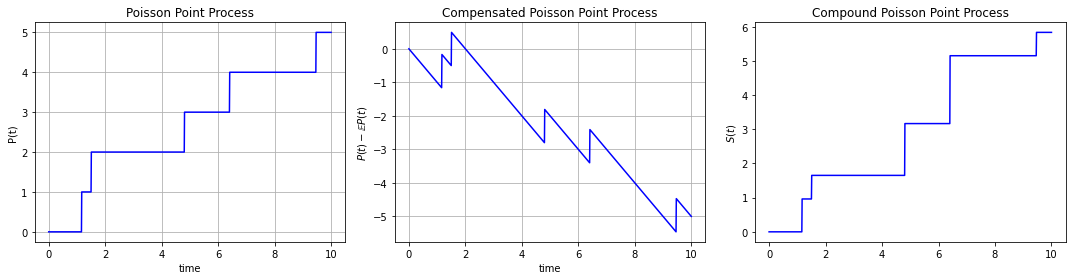

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,intensity,seed=None):
    if seed is not None:
        np.random.seed(seed)
    P = np.zeros([NoOfPaths, NoOfSteps+1])  # Poisson Point Process
    P_tilde = np.zeros([NoOfPaths, NoOfSteps+1]) # Compensated Poisson Point Process
    S = np.zeros([NoOfPaths, NoOfSteps+1]) # Compound Poisson Point Process
    X = np.random.normal(loc=1, scale=1, size=(NoOfPaths, NoOfSteps+1))
    time = np.linspace(0,T,NoOfSteps+1)
                
    dt = time[1] - time[0]
    N = np.random.poisson(intensity*dt,[NoOfPaths,NoOfSteps]) # Number of Poisson Points in small time intervals
    
    for i in range(0,NoOfSteps):
        P[:,i+1]  = P[:,i] + N[:,i]
        P_tilde[:,i+1] = P_tilde[:,i] + N[:,i] - intensity*dt
        S[:,i+1] = S[:,i] + X[:,i] * N[:,i]
        
    return {"time":time,"P":P,"P_tilde":P_tilde,"S":S}

def main(): 
    NoOfPaths = 1
    NoOfSteps = 1000
    T = 10
    intensity = 1
    seed = None
    
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,intensity,seed=seed)
    timeGrid = Paths["time"]
    P = Paths["P"]
    P_tilde = Paths["P_tilde"]
    S = Paths["S"]
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,4))
    ax0.plot(timeGrid, np.transpose(P),'-b')
    ax1.plot(timeGrid, np.transpose(P_tilde),'-b')
    ax2.plot(timeGrid, np.transpose(S),'-b')
    ax0.set_title('Poisson Point Process',fontsize=12)
    ax1.set_title('Compensated Poisson Point Process',fontsize=12)
    ax2.set_title('Compound Poisson Point Process',fontsize=12)
    ax0.set_ylabel("P(t)")
    ax1.set_ylabel("$P(t)-\mathbb{E}P(t)$")
    ax2.set_ylabel("$S(t)$")
    for ax in (ax0, ax1):
        ax.grid()
        ax.set_xlabel("time")
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()

###### ***PMF, PDF, and CDF - PMF***

$$
F(x)=\sum_{s=-\infty}^xp(s)
\quad\Leftrightarrow\quad
f(x)=F(x)-F(x-)
$$

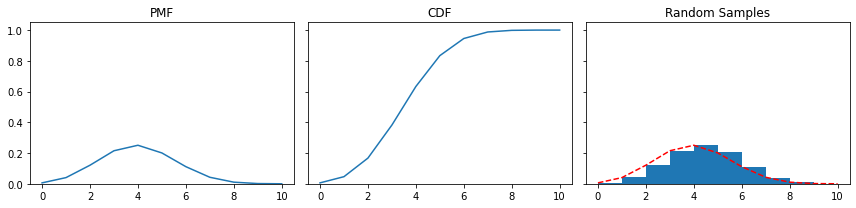

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# parameters
n = 10 # number of coin flips
p = 0.4 # probability of head
n_samples = 10_000 # number of random samples

x = np.arange(n+1)
pmf = stats.binom(n,p).pmf(x) # compute pmf
cdf = stats.binom(n,p).cdf(x) # compute cdf
rvs = stats.binom(n,p).rvs(n_samples) # generate random samples

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3),sharey=True)
ax0.plot(x,pmf) # plot pmf
ax1.plot(x,cdf) # plot cdf
ax2.hist(rvs,bins=x,density=True) # plot histogram
ax2.plot(x,pmf,'--r') # plot pmf on top of histogram
ax0.set_title('PMF')
ax1.set_title('CDF')
ax2.set_title('Random Samples')
plt.tight_layout()
plt.show()

###### ***PMF, PDF, and CDF - PDF***

$$
F(x)=\int_{-\infty}^xf(s)ds
\quad\Leftrightarrow\quad
f(x)=F'(x)
$$

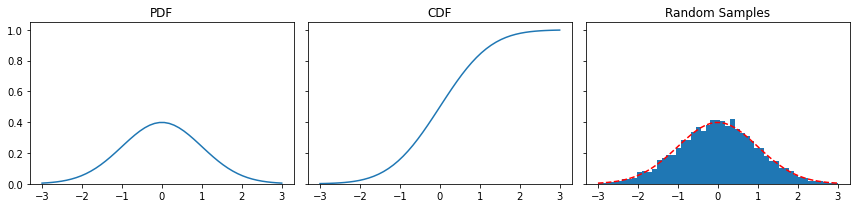

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mu = 0
sigma = 1
n = 10_000 # number of random samples

x = np.linspace(mu-3*sigma, mu+3*sigma, 50)
pdf = stats.norm(loc=mu, scale=sigma).pdf(x) # compute pdf
cdf = stats.norm(loc=mu, scale=sigma).cdf(x) # compute cdf
rvs = stats.norm(loc=mu, scale=sigma).rvs(n) # generate random samples

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3),sharey=True)
ax0.plot(x,pdf) # plot pdf
ax1.plot(x,cdf) # plot cdf
ax2.hist(rvs,bins=x,density=True) # plot histogram
ax2.plot(x,pdf,'--r') # plot pdf on top of histogram
ax0.set_title('PDF')
ax1.set_title('CDF')
ax2.set_title('Random Samples')
plt.tight_layout()
plt.show()

###### ***Coin Flips using Smirnov's Transform*** 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Generalized_inversion_method.svg/720px-Generalized_inversion_method.svg.png" width=30%>

[Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

$$
\displaystyle
X=F^{-1}(U)
$$

In [ ]:
import numpy as np; np.random.seed(0) # fix random number seed
n = 10 # number_of_coin_flips
p = 0.5 # probability_of_head

c = np.zeros(n) # coin outcomes
u = np.random.rand(n) # uniform random variables
c[u>1-p] = 1 # coin flips using boolean masking

# print coin outcomes c and corresponding uniform random variables
print(c) # shape (n,)
print(u) # shape (n,)

# check the smirnov transform, relation between u and c
# if ui <= 1-p, then ci = 0
# if ui > 1-p, then ci = 1
for ui, ci in zip(u,c):
    print(ui, ui>1-p, ci) 

***Exercise*** Using smirnov's transform, genearte random samples $X$ from the exponential distribution whose cdf $F$ is given by
$$
F(x)=
\left\{
    \begin{array}{ll}
        1-e^{-\lambda x}&\text{for}\ x\ge 0\\
        0&\text{for}\ x< 0\\
    \end{array}
\right.
$$

###***Chapter 9 Distributions Related to Poisson***

####***Section 1 Uniform Distribution***

###### ***Uniform Distribution***

PDF

$$
f(x)=\frac{1}{b-a}\quad \mbox{for $a<x<b$}
$$

Intuition
$$
\mbox{Position of Poisson Point given $N_{PPP(\lambda)}([a,b])=1$}
$$

Mean and variance

$$
\mathbb{E}X=\frac{a+b}{2},
\quad\quad\quad\quad
Var(X)=\frac{1}{12}(b-a)^2
$$


\begin{eqnarray}
a^2-b^2&=&(a+b)(a-b)\nonumber
\end{eqnarray}


$$
\mathbb{E}X
=\int_a^bxf(x)dx
=\frac{1}{b-a}\int_a^bxdx
=\frac{1}{b-a}\left[\frac{x^2}{2}\right]_a^b
=\frac{a+b}{2}
$$


\begin{eqnarray}
a^3+b^3&=&(a+b)(a^2+b^2-ab)\nonumber\\
a^3-b^3&=&(a-b)(a^2+b^2+ab)\nonumber
\end{eqnarray}

$$
\mathbb{E}X^2
=\int_a^bx^2f(x)dx
=\frac{1}{b-a}\int_a^bx^2dx
=\frac{1}{b-a}\left[\frac{x^3}{3}\right]_a^b
=\frac{a^2+b^2+ab}{3}
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

x = np.random.uniform(0., 1., (10000,))

plt.hist(x, bins=np.linspace(0.,1.,20), density=True)
plt.show()

###### ***Example - Break the stick***



We break the stick of length $L$ into two pieces
by choosing the break point uniformly over the interval $[0,L]$.
Let $X$ be the length of the longer stick.
Find its mean and variance.


$$
X
\quad=\quad
\underbrace{\frac{L}{2}}_{\mbox{Half of the stick}}
\quad+\quad\underbrace{Y}_{\mbox{The rest, Uniform on $[0,L/2]$}}
$$


\begin{eqnarray}
\mathbb{E}[X]
&=&
\frac{L}{2}+\mathbb{E}[Y]=\frac{L}{2}+\frac{L}{4}=\frac{3L}{4}\nonumber\\
&&\nonumber\\
Var(X)
&=&
Var(Y)=\frac{1}{12}\left(\frac{L}{2}\right)^2=\frac{L^2}{48}\nonumber
\end{eqnarray}

###### ***Example - Simulation of a random variable $X$ with a CDF $F$, using $U(0,1)$***



[Step 1] Generate a random number $U$ from $U(0,1)$.

[Step 2] $X=F^{-1}(U)$, or  $X=\sup\{x\in{\bf R}; F(x)<U\}$ if $F$ is not bijective.

$$
\mathbb{P}(X\le x)
=\mathbb{P}(F^{-1}(U)\le x)
=\mathbb{P}(U\le F(x))
=F(x)
$$

###### ***Example - Simulation of a random variable $X\sim Exp(0.5)$***


Suppose you have a random number generator which generates 
a random number $U$ from $U(0,1)$.
Generate a random number $X$ from $Exp(0.5)$, using $U$.


$$\begin{array}
{\bar F}(x)=e^{-0.5x}
\quad
\mbox{for $x\ge 0$}
&\Rightarrow&
F(x)=1-e^{-0.5x}
\quad
\mbox{for $x\ge 0$}\nonumber\\
&\Rightarrow&
X=F^{-1}(U)=-2\log(1-U)\sim Exp(0.5)\nonumber
\end{array}$$


$$
U\sim U(0,1)\ \ \Rightarrow\ \ 1-U\sim U(0,1)\ \ \Rightarrow\ \ 
X=-2\log(U)\sim Exp(0.5)
$$

###### ***Convolution***

**Definition**
\begin{eqnarray}
F_X\mathbin{*}F_Y
&&\quad\quad
\mbox{CDF of $X+Y$, when $X$ and $Y$ are independent}\nonumber\\
p_X\mathbin{*}p_Y
&&\quad\quad
\mbox{PMF of $X+Y$, when $X$ and $Y$ are independent}\nonumber\\
f_X\mathbin{*}f_Y
&&\quad\quad
\mbox{PDF of $X+Y$, when $X$ and $Y$ are independent}\nonumber
\end{eqnarray}

**Computation**
\begin{eqnarray}
(F_X\mathbin{*}F_Y)(a)
&=&
F_{X+Y}(a)= \int_{-\infty}^{\infty}F_Y(a-b)\underbrace{dF_X(b)}_{P(b\le X\le b+db)}\nonumber\\
(p_X\mathbin{*}p_Y)(a)
&=&
p_{X+Y}(a)=\sum_bp_Y(a-b)\underbrace{p_X(b)}_{P(X=b)}\nonumber\\
(f_X\mathbin{*}f_Y)(a)
&=&
f_{X+Y}(a)=\int_{-\infty}^{\infty}f_Y(a-b)\underbrace{f_X(b)db}_{P(b\le X\le b+db)}\nonumber
\end{eqnarray}

######***Simulation of Binomial using Bernoulli***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats


def main():
    n = 10
    p = 0.5
    n_sim = 1_000
    
    data = np.random.binomial(1, p, size=(n, n_sim)).sum(axis=0)

    fig, ax = plt.subplots(figsize=(10, 4))
    
    bins = np.arange(n+2) - 0.5
    ax.hist(data, bins=bins, density=True, alpha=0.4)
    ax.set_xticks(np.arange(n+1))
    
    x = np.arange(n+1) 
    p = stats.binom(n, p).pmf(x)
    for x_loc, p_loc in zip(x, p):
        ax.plot((x_loc-0.5,x_loc+0.5), (p_loc,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc-0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc+0.5,x_loc+0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc+0.5), (0,0), color='red', alpha=0.9, linestyle='--')
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

######***Distribution of Sum of IID Random Variables***

***Sum of IID Uniform***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation):
    x = np.random.uniform(-0.5, 0.5, (num_sumation, num_simulation))
    return np.sum(x, axis=0)


def main():
    num_simulation = 10_000
    
    fig, axes = plt.subplots(2,3,figsize=(15,10))
    
    for num_sumation, ax in enumerate(axes.reshape((-1,)), start=2):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation)
        ax.hist(data, bins=100, density=True, label=f'Histogram of S_{num_sumation}')

        mu = 0
        sigma = np.sqrt(num_sumation) / np.sqrt(12)

        x = np.linspace(-0.5*num_sumation,0.5*num_sumation,1_000)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF')
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

***Sum of IID Poisson***

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation, lam=1):
    x = np.random.poisson(lam=lam, size=(num_sumation, num_simulation))
    return np.sum(x, axis=0)


def main():
    lam = 1
    num_sumations = (10,20,30,40,50,60,70,80,90,100,110,120)
    num_simulation = 10_000
    
    fig, axes = plt.subplots(4,3,figsize=(15,15))
    
    for ax, num_sumation in zip(axes.reshape((-1,)), num_sumations):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation, lam=lam)
        ax.hist(data, bins=20, density=True, label=f'Histogram of S_{num_sumation}')

        mu = lam * num_sumation 
        sigma = np.sqrt(mu)

        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1_00)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF')
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

***Sum of IID Exponential***

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation, lam=1):
    x = np.random.exponential(scale=1/lam, size=(num_sumation, num_simulation)) # scale=1/lam
    return np.sum(x, axis=0)


def main():
    lam = 1
    num_sumations = (1,2,3,4,5,6,7,10,20,30,40,50,60,70,80,90,100,110)
    num_simulation = 10_000
    
    fig, axes = plt.subplots(6,3,figsize=(15,15))
    
    for ax, num_sumation in zip(axes.reshape((-1,)), num_sumations):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation, lam=lam)
        ax.hist(data, bins=100, density=True, label=f'Histogram of S_{num_sumation}')

        mu = (1/lam) * num_sumation 
        sigma = (1/lam) * np.sqrt(num_sumation)

        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1_00)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF')
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

###### ***1D Simple Random Walk***

$$
S_n=\sum_{i=1}^nX_i
$$
where $X_i$ are iid.
We set $S_0=0$ by definition.

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt


def main():
    n_sim = 100
    
    x = np.random.normal(size=(n_sim,))
    S_n = np.concatenate( ( np.array((0,)), x ) ).cumsum()

    fig, ax = plt.subplots()
    ax.plot(S_n)
    plt.show()


if __name__ == "__main__":
    main()

######***2D Simple Random Walk***

$$
S_n=\sum_{i=1}^nX_i
$$
where $X_i$ are iid with
$$
X_i=\left\{\begin{array}{rl}
[ 0,  1]&\mbox{with probability 0.25}\\
[ 1,  0]&\mbox{with probability 0.25}\\
[-1,  0]&\mbox{with probability 0.25}\\
[ 0, -1]&\mbox{with probability 0.25}
\end{array}\right.
$$

In [ ]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import random; random.seed(337)


def main():
    N_STEPS = 100 # number of steps in simulation

    # define NEWS steps
    N = [ 0,  1]
    E = [ 1,  0]
    W = [-1,  0]
    S = [ 0, -1]

    # 2D simple random walk
    x = [0]
    y = [0]
    for step in range(N_STEPS):
        dx, dy = random.choice([N, E, W, S])
        x.append( x[-1] + dx )
        y.append( y[-1] + dy )

    # plot of 2D simple random walk
    fig, ax = plt.subplots(figsize=(5,5))
    
    ax.plot(x, y, '-')
    ax.set_xlim( (-1.5*np.sqrt(N_STEPS), 1.5*np.sqrt(N_STEPS)) )
    ax.set_ylim( (-1.5*np.sqrt(N_STEPS), 1.5*np.sqrt(N_STEPS)) )
    ax.grid()
    
    plt.show()


if __name__ == "__main__":
    main()

###### ***Example - Convolution of two Poisson***


$$
Po(\lambda_1)*Po(\lambda_2)
=
Po(\lambda_1+\lambda_2)
$$

With two independent $X\sim Po(\lambda_1)$ and $Y\sim Po(\lambda_2)$,
for a non-negative integer $a$
\begin{eqnarray}
p_{X+Y}(a)
&=&
\sum_bp_X(b)p_Y(a-b)\quad(\mbox{$b\ge 0$, $a-b\ge 0$ $\Rightarrow$ $0\le b\le a$ integer})\nonumber\\
&=&
\sum_{b=0}^a\frac{\lambda_1^b}{b!}e^{-\lambda_1}\frac{\lambda_2^{a-b}}{(a-b)!}e^{-\lambda_2}\nonumber\\
&=&
e^{-(\lambda_1+\lambda_2)}\sum_{b=0}^a\frac{\lambda_1^b}{b!}\frac{\lambda_2^{a-b}}{(a-b)!}
=\frac{e^{-(\lambda_1+\lambda_2)}}{a!}\sum_{b=0}^a\frac{a!}{b!(a-b)!}\lambda_1^b\lambda_2^{a-b}\nonumber\\
&=&
\frac{(\lambda_1+\lambda_2)^a}{a!}e^{-(\lambda_1+\lambda_2)}
\nonumber
\end{eqnarray}

###### ***Example - Convolution of two Uniform***


$$
U\left(-\frac{1}{2},\frac{1}{2}\right)
*
U\left(-\frac{1}{2},\frac{1}{2}\right)
=
\left(1-|x|\right)^+
$$

With two independent $X\sim U\left(-\frac{1}{2},\frac{1}{2}\right)$ and $Y\sim U\left(-\frac{1}{2},\frac{1}{2}\right)$,
for $0\le a\le 1$ (By symmetry we can figure out the rest if we understand the region $0\le a\le 1$)
$$
f_{X+Y}(a)
\quad=\quad
\int_{-\infty}^{\infty}f_X(b)f_Y(a-b)db
$$


\begin{eqnarray}
-\frac{1}{2}\le b\le \frac{1}{2},\ 
-\frac{1}{2}\le a-b\le \frac{1}{2}
&\Rightarrow&
-\frac{1}{2}\le b\le \frac{1}{2},\ 
-\frac{1}{2}\le a-b,\
a-b\le \frac{1}{2}\nonumber\\
&\Rightarrow&
-\frac{1}{2}\le b\le \frac{1}{2},\ 
b\le a+\frac{1}{2},\
a-\frac{1}{2}\le b
\quad(\mbox{$0\le a\le 1$})\nonumber\\
&\Rightarrow&
-\frac{1}{2}\le b\le \frac{1}{2},\ 
b\le \frac{1}{2},\
a-\frac{1}{2}\le b\nonumber\\
&\Rightarrow&
a-\frac{1}{2}\le b\le \frac{1}{2}
\nonumber
\end{eqnarray}


$$
f_{X+Y}(a)
\quad=\quad
\int_{-\infty}^{\infty}f_X(b)f_Y(a-b)db
\quad=\quad
\int_{a-\frac{1}{2}}^{\frac{1}{2}}1db
\quad=\quad
1-a
$$

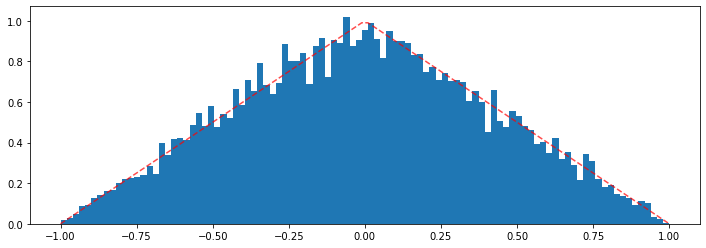

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
x = np.random.uniform(low=-0.5,high=0.5,size=(10_000,2)).sum(axis=1)
fig, ax = plt.subplots(figsize=(12,4))
bins = np.linspace(-1,1,100)
ax.hist(x,density=True,bins=bins)
pdf = np.maximum(1 - np.abs(bins), 0)
ax.plot(bins,pdf,'--r',alpha=0.7)
plt.show()

####***Section 2 Gamma Distribution***

#####**Gamma Function**

**Definition**

For $\alpha>0$
$$
\Gamma(\alpha)=\int_0^{\infty}x^{\alpha-1}e^{-x}dx
$$

**Properties**

\begin{eqnarray}
(1)&&\Gamma(\alpha+1)=\alpha \Gamma(\alpha)\nonumber\\
(2)&&\Gamma(1/2)=\sqrt{\pi},\ \Gamma(1)=1,\ \Gamma(2)=1\nonumber\\
(3)&&\Gamma(n+1)=n!\nonumber
\end{eqnarray}

\begin{eqnarray}
\Gamma(\alpha+1)
&=&
\int_0^{\infty}x^{(\alpha+1)-1}e^{-x}dx
=
\int_0^{\infty}-x^{(\alpha+1)-1}\left(e^{-x}\right)'dx\nonumber\\
&=&
\left[-x^{(\alpha+1)-1}e^{-x}\right]_0^{\infty}
-
\int_0^{\infty}\left(-x^{(\alpha+1)-1}\right)'e^{-x}dx\nonumber\\
&=&
\alpha
\int_0^{\infty}x^{\alpha-1}e^{-x}dx
=
\alpha\Gamma(\alpha)
\nonumber
\end{eqnarray}

With $s=\sqrt{x}$, $ds=\frac{dx}{2\sqrt{x}}$,
using the integration technique on the normal distribution
(You will see this integration technique in the chapter on the normal distribution)
$$
\Gamma(1/2)
\quad=\quad
\int_0^{\infty}x^{-1/2}e^{-x}dx
\quad=\quad
2\int_0^{\infty}e^{-s^2}ds
\quad=\quad
\sqrt{\pi}
$$

#####**Gamma Distribution**

**PDF**
$$
f(x)dx=\frac{(\lambda x)^{\alpha-1}e^{-\lambda x}}{\Gamma(\alpha)}\lambda dx\quad\mbox{for $x>0$}
$$

**Intuition**
$$
\mbox{$\alpha$-th arrival time of Poisson point of intensity $\lambda$}
$$

**Mean and variance**
$$
\begin{array}{ccc} \hline
                   &\mbox{mean}                & \mbox{variance} \\\hline\hline
Geo(p)  & \frac{1}{p}  & \frac{q}{p^2}\\\hline
\frac{1}{n}Geo(p)  & \frac{1}{np}  & \frac{q}{(np)^2}\\\hline
Exp(\lambda)  & \frac{1}{\lambda}  & \frac{1}{\lambda^2}\\\hline
\Gamma(n,\lambda)  & \frac{n}{\lambda}  & \frac{n}{\lambda^2}\\\hline
\Gamma(\alpha,\lambda)  & \frac{\alpha}{\lambda}  & \frac{\alpha}{\lambda^2}\\\hline
\end{array}
$$

\begin{eqnarray}
\mathbb{E}[X]
&=&\int_0^{\infty}x\frac{\lambda(\lambda x)^{\alpha-1}e^{-\lambda x}}{\Gamma(\alpha)}dx\nonumber\\
&=&\frac{\Gamma(\alpha+1)}{\lambda\Gamma(\alpha)}\int_0^{\infty}\underbrace{\frac{\lambda(\lambda x)^{(\alpha+1)-1}e^{-\lambda x}}{\Gamma(\alpha+1)}}_{\mbox{PDF of $\Gamma(\alpha+1,\lambda)$}}dx=\frac{\alpha\Gamma(\alpha)}{\lambda\Gamma(\alpha)}=\frac{\alpha}{\lambda}\nonumber\\
&&\nonumber\\&&\nonumber\\
\mathbb{E}[X^2]
&=&\int_0^{\infty}x^2\frac{\lambda(\lambda x)^{\alpha-1}e^{-\lambda x}}{\Gamma(\alpha)}dx\nonumber\\
&=&\frac{\Gamma(\alpha+2)}{\lambda^2\Gamma(\alpha)}\int_0^{\infty}\underbrace{\frac{\lambda(\lambda x)^{(\alpha+2)-1}e^{-\lambda x}}{\Gamma(\alpha+2)}}_{\mbox{PDF of $\Gamma(\alpha+2,\lambda)$}}dx=\frac{(\alpha+1)\alpha\Gamma(\alpha)}{\lambda^2\Gamma(\alpha)}=\frac{\alpha(\alpha+1)}{\lambda^2}\nonumber\\
&&\nonumber\\&&\nonumber\\
Var(X)
&=&
\frac{\alpha}{\lambda^2}\nonumber
\end{eqnarray}

**Related distributions**
$$\begin{array}{llllll}
\mbox{Exponential distribution $Exp(\lambda)$}&&\Gamma(1,\lambda)\\
\\
\mbox{Erlang distribution}&&\Gamma(2,\lambda)\\
\\
\mbox{Chi-square distribution $\chi^2_1$}&&\Gamma\left(\frac{1}{2},\frac{1}{2}\right)\\
\\
\mbox{Chi-square distribution $\chi^2_d$}&&\Gamma\left(\frac{d}{2},\frac{1}{2}\right)\\
\\
\mbox{Inverse gamma distribution $IG(\alpha,\lambda)$}&&\mbox{Distribution of}\ \frac{1}{X},\ \ X\sim\Gamma(\alpha,\lambda)\\
\end{array}$$

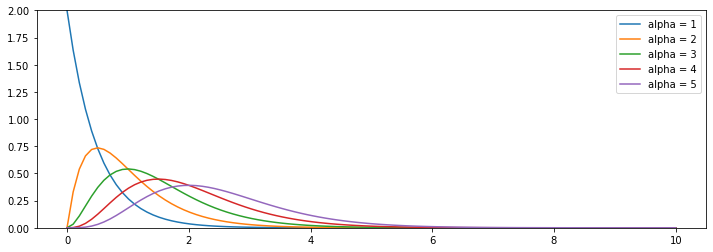

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
x = np.linspace(0,10,100)
fig, ax = plt.subplots(figsize=(12,4))
beta = 2
for alpha in (1,2,3,4,5):
    pdf = stats.gamma(a=alpha,scale=1/beta).pdf(x)
    ax.plot(x,pdf,label=f"{alpha = }")
ax.legend()
ax.set_ylim(0,2)
plt.show()

###### **Properties of Gamma Distribution**

\begin{eqnarray}
(1)&&Exp(\lambda)\stackrel{d}{=}\Gamma(1,\lambda)\nonumber\\
(2)&&Exp(\lambda)\mathbin{*}Exp(\lambda)\stackrel{d}{=}\Gamma(2,\lambda)\nonumber\\
(3)&&Exp(\lambda)\mathbin{*}Exp(\lambda)\mathbin{*}\cdots \mathbin{*}Exp(\lambda)\stackrel{d}{=}\Gamma(n,\lambda)\nonumber\\
(4)&&\Gamma(\alpha,\lambda)\mathbin{*}\Gamma(\beta,\lambda)\stackrel{d}{=}\Gamma(\alpha+\beta,\lambda)\nonumber
\end{eqnarray}

$$
\underbrace{\lambda e^{-\lambda x}}_{Exp(\lambda)}
\quad=\quad
\underbrace{\frac{\lambda (\lambda x)^{1-1} e^{-\lambda x}}{\Gamma(1)}}_{\Gamma(1,\lambda)}
\quad\quad\quad\quad
\mbox{for $x\ge 0$}
$$


With independent $X$ and $Y$, where $X\sigma m\Gamma(\alpha,\lambda)$, $Y\sigma m\Gamma(\beta,\lambda)$,
for $x\ge 0$
\begin{eqnarray}
f_{X+Y}(x)
&=&
\int_{-\infty}^{\infty}f_X(s)f_Y(x-s)ds
\quad\quad
\mbox{($x\ge 0,\ s\ge 0,\ x-s\ge 0
\ \Rightarrow\ 
0\le s\le x$)}\nonumber\\
&=&
\int_0^x
\frac{\lambda(\lambda s)^{\alpha-1}e^{-\lambda s}}{\Gamma(\alpha)}
\cdot
\frac{\lambda(\lambda (x-s))^{\beta-1}e^{-\lambda (x-s)}}{\Gamma(\beta)}
ds\nonumber\\
&=&
\frac{1}{\Gamma(\alpha)\Gamma(\beta)}
\left[\int_0^x
\lambda(\lambda s)^{\alpha-1}
\lambda(\lambda (x-s))^{\beta-1}
ds\right]
e^{-\lambda x}\nonumber\\
&=&
\frac{1}{\Gamma(\alpha)\Gamma(\beta)}
\left[\int_0^x
\left(\frac{\lambda s}{\lambda x}\right)^{\alpha-1}
\left(\frac{\lambda (x-s)}{\lambda x}\right)^{\beta-1}
\frac{ds}{x}\right]
\lambda(\lambda x)^{\alpha+\beta-1}e^{-\lambda x}\nonumber\\
&=&
\underbrace{\frac{1}{\Gamma(\alpha)\Gamma(\beta)}
\left[\int_0^1
t^{\alpha-1}
(1-t)^{\beta-1}
dt\right]}_{\mbox{Constant; should be $\frac{1}{\Gamma(\alpha+\beta)}$}}
\lambda(\lambda x)^{\alpha+\beta-1}e^{-\lambda x}\nonumber
\end{eqnarray}


###### **Example - Paradox of inter arrival times**



We run the Poisson point process with intensity $\lambda$ from $t=-\infty$ to $t=\infty$.
$T_1$ is the first arrival time after $t=0$,
$T_2$ is the inter arrival time between the first and second arrival,...,  and
$T_n$ is the inter arrival time between the $(n-1)$-th and $n$-th arrival.  
Let $\tau$ be the inter arrival time containing 04/15/2013.
Then,
\begin{eqnarray}
(1)&&T_i\ \mbox{are iid $Exp(\lambda)$}\nonumber\\
(2)&&ET_i=\frac{1}{\lambda},\ Var(T_i)=\frac{1}{\lambda^2}\nonumber\\
(3)&&\tau\ \mbox{is $Exp(\lambda)\mathbin{*}Exp(\lambda)\stackrel{d}{=}\Gamma(2,\lambda)$, not $Exp(\lambda)$}\nonumber\\
(4)&&E\tau=\frac{2}{\lambda},\ Var(\tau)=\frac{2}{\lambda^2}\nonumber
\end{eqnarray}

###### **How to Get PDF**

**From CDF to PDF**
$$
P(X\le x)
\quad
\stackrel{\mbox{Differentiate}}{\Rightarrow}
\quad
f_X(x)
$$

**From  Jacobian to PDF**
\begin{eqnarray}
f_{Y}(y)&=&f_{X}(x)\left|\frac{dx}{dy}\right|\nonumber\\
f_{U,V}(u,v)&=&f_{X,Y}(x,y)\left|\frac{\partial (x,y)}{\partial (u,v)}\right|\nonumber\\
f_{Y_1,\ldots,Y_n}(y_1,\ldots,y_n)&=&f_{X_1,\ldots,X_n}(x_1,\ldots,x_n)\left|\frac{\partial (x_1,\ldots,x_n)}{\partial (y_1,\ldots,y_n)}\right|\nonumber
\end{eqnarray}
where
$$
\left|\frac{\partial (x_1,\ldots,x_n)}{\partial (y_1,\ldots,y_n)}\right|
=
\left|det\left(\begin{array}{ccc}\frac{\partial x_1}{\partial y_1}&\cdots&\frac{\partial x_1}{\partial y_n}\\\cdots&\cdots&\cdots\\\frac{\partial x_n}{\partial y_1}&\cdots&\frac{\partial x_n}{\partial y_n}\end{array}\right)\right|
$$

**Property of Jacobian**
$$
\left|\frac{\partial (x_1,\ldots,x_n)}{\partial (y_1,\ldots,y_n)}\right|
=
\frac{1}{\left|\frac{\partial (y_1,\ldots,y_n)}{\partial (x_1,\ldots,x_n)}\right|}
$$

$$
P(Y\le y)=P(X\le x)
\quad\Rightarrow\quad
f_Y(y)=f_X(x)\left|\frac{dx}{dy}\right|
$$

$$\begin{array}{llll}
\mbox{Hight on left}&&f_{U,V}(u_0,v_0)\nonumber\\
\\
\mbox{Area on left}&&dudv\nonumber\\
\\
\mbox{Volumn on left}&&f_{U,V}(u_0,v_0)dudv\nonumber\\
\\
\mbox{Hight on right}&&f_{X,Y}(x_0,x_0)\nonumber\\
\\
\mbox{Area on right}&&\left|\frac{\partial (x,y)}{\partial (u,v)}\right|dudv\nonumber\\
\\
\mbox{Volumn on right}&&f_{X,Y}(x_0,x_0)\left|\frac{\partial (x,y)}{\partial (u,v)}\right|dudv\nonumber
\end{array}$$

$$
f_{U,V}(u,v)dudu
=
f_{X,Y}(x,y)\left|\frac{\partial (x,y)}{\partial (u,v)}\right|dudv
\quad\Rightarrow\quad
f_{U,V}(u,v)=f_{X,Y}(x,y)\left|\frac{\partial (x,y)}{\partial (u,v)}\right|
$$

###### **Example - PDF of  $Y=X^3$, where $X\sim U(0,1)$**

Use CDF
$$
P(Y\le y)
=P(X\le y^{1/3})=y^{1/3}
\quad
\stackrel{\mbox{Differentiate}}{\Rightarrow}
\quad
f_Y(y)
=
\frac{1}{3}y^{-2/3}\quad\mbox{for $0<y<1$}
$$

Use Jacobean
$$
\frac{dy}{dx}=3x^2=3\left(x^3\right)^{2/3}=3y^{2/3}
\quad\Rightarrow\quad
\frac{dx}{dy}=1/\left(\frac{dy}{dx}\right)=\frac{1}{3}y^{-2/3}
\quad\Rightarrow\quad
\left|\frac{dx}{dy}\right|=\frac{1}{3}y^{-2/3}
$$


$$
f_{Y}(y)=f_{X}(x)\left|\frac{dx}{dy}\right|=\frac{1}{3}y^{-2/3}\quad\mbox{for $0<y<1$}
$$

####***Section 3 Beta Distribution***

###### **Beta Function**

**Definition**
$$
B(\alpha,\beta)=\int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx
\quad\quad\quad\quad\mbox{for $\alpha>0$, $\beta>0$}
$$

**Properties of Beta function**
$$
B(\alpha,\beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

###### **Beta Distribution**

**PDF**
For $0<x<1$
$$
f(x)\propto x^{\alpha-1}(1-x)^{\beta-1}
\ \ \Rightarrow\ \ 
f(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}
$$

**Mean and variance of $Beta(\alpha,\beta)$**
$$
\frac{\alpha}{\alpha+\beta},
\quad\quad\quad\quad
\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

**Intuition - Fraction of waiting time**

If $X\sim\Gamma(\alpha,\lambda)$ and $Y\sim\Gamma(\beta,\lambda)$ are independent,
then
\begin{eqnarray}
(1)&&T=X+Y\sim\Gamma(\alpha+\beta,\lambda)\nonumber\\
(2)&&F=\frac{X}{X+Y}\sim Beta(\alpha,\beta)\nonumber\\
(3)&&\mbox{$T$ and $F$ are independent}\nonumber\\
(4)&&B(\alpha,\beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\nonumber
\end{eqnarray}

With $t=x+y$ and $f=\frac{x}{x+y}$,
$$
\left|\frac{\partial (x,y)}{\partial (t,f)}\right|
=
\left|\frac{\partial (t,f)}{\partial (x,y)}\right|^{-1}
=
\left|det\left(\begin{array}{cc}1&1\\ \frac{t-x}{t^2}&-\frac{x}{t^2}\end{array}\right)\right|^{-1}
=
t
$$


\begin{eqnarray}
f_{T,F}(t,f)
&=&
f_{X,Y}(x,y)\left|\frac{\partial (x,y)}{\partial (t,f)}\right|\nonumber\\
&=&
\frac{\lambda (\lambda x)^{\alpha-1}e^{-\lambda x}}{\Gamma(\alpha)}
\cdot
\frac{\lambda (\lambda y)^{\beta-1}e^{-\lambda y}}{\Gamma(\beta)}
\cdot
t\nonumber\\
&=&\underbrace{\left(\frac{f^{\alpha-1} (1-f)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)/\Gamma(\alpha+\beta)}\right)}_{\mbox{a function of $f$ only!}}\underbrace{\left(\frac{1}{\Gamma(\alpha+\beta)}\lambda(\lambda t)^{(\alpha+\beta)-1}e^{-\lambda t}\right)}_{\mbox{a function of $t$ only!}}\nonumber\\
&=&
\left(\frac{f^{\alpha-1} (1-f)^{\beta-1}}{B(\alpha,\beta)}\right)
\left(\frac{\lambda(\lambda t)^{(\alpha+\beta)-1}e^{-\lambda t}}{\Gamma(\alpha+\beta)}\right)\nonumber
\end{eqnarray}

###### **Example - Joint PDF of depen random variables**


The joint PDF $f(x,y)$ of $X$ and $Y$ is given by
$$
f(x,y)=cxy,\ \ \ \ \ \mbox{for $0\le x\le 1$,  $0\le y\le 1$, and $0\le x+y\le 1$}
$$
\begin{eqnarray} 
(a)
&&
\mbox{Find $c$.}\nonumber\\
(b)
&&
\mbox{Find the PDF $f_{X}(x)$ of $X$ and the PDF $f_{Y}(y)$ of $Y$.}\nonumber\\
(c)
&&
\mbox{Are $X$ and $Y$ independent?}\nonumber
\end{eqnarray}

Solution

$$
\begin{array}{lll}
(a)\quad
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x,y)dxdy
&=&
c\int_{0}^{1}\int_{0}^{1-y}xydxdy=\frac{c}{2}\int_{0}^{1}y(1-y)^2dy\nonumber\\
&=&
\frac{c}{2}B(2,3)\int_{0}^{1}\underbrace{\frac{y^{2-1}(1-y)^{3-1}}{B(2,3)}}_{\mbox{ PDF of $Beta(2,3)$}}dy\nonumber\\
&=&
\frac{c}{2}B(2,3)=\frac{c}{2}\frac{\Gamma(2)\Gamma(3)}{\Gamma(5)}=\frac{c}{2}\frac{(1!)(2!)}{4!}
\stackrel{\mbox{should be}}{=}
1\nonumber
\end{array}
$$

$$
\Rightarrow\quad
c
=
4!
$$

$(b)$ For $0\le x\le 1$
\begin{eqnarray}
f_X(x)
&=&
\int_{-\infty}^{\infty}f(x,y)dy
=\int_{0}^{1-x}f(x,y)dy\nonumber\\
&=&
4!\int_0^{1-x}xydy
=12x(1-x)^2
=\frac{x^{2-1}(1-x)^{3-1}}{B(2,3)}\nonumber
\end{eqnarray}
$$
\Rightarrow\quad
X\sim Beta(2,3)
\quad
\mbox{and by symmetry}
\quad
Y\sim Beta(2,3)
$$

$(c)$ $0\le X\le 1$ and $0\le Y\le 1$.
If they are independent, $X+Y$ can take values from 0 to 2.
However, the joint PDF $f(x,y)$ does not put any mass on the region $x+y>1$. So, they cannot be independent, i.e., they are depen.

You can see this dependency also from the joint PDF.
$$
f(x,y)
\quad=\quad
24xy1(0\le x\le 1)1(0\le y\le 1)\underbrace{1(0\le x+y\le 1)}_{\mbox{Cannot decompose further}}
$$

###### **Example - Fraction of waiting time at bank**


When I enter the bank, there is only one person in line waiting for the service and I join the queue. 
In the bank there are five service desks and we assume the service time is iid $Exp(\lambda_B)$, $\lambda_B^{-1} = 10$ (in minutes). 
After I got serviced at bank, I visit the post office.
When I enter the post office,  there are already two people in line waiting for the service and I join the queue. 
In the post office
there are two service desks and we assume the service time is iid $Exp(\lambda_P)$, $\lambda_P^{-1} = 4$ (in minutes). 
Let $F$ be the fraction of waiting time spent at bank
among the total waiting time spent in both the bank and the post office.
Calculate
the mean and variance of $F$.

**Solution**

Waiting time $T_B$ at bank is $T_B=X_1+X_2$
where $X_i$ are iid $Exp(5\lambda_B)=Exp(0.5)$.
Hence
$$T_B=X_1+X_2\sim\Gamma(2,0.5)$$

Waiting time $T_P$ at post office is $T_P=Y_1+Y_2+Y_3$
where $Y_i$ are iid $Exp(2\lambda_P)=Exp(0.5)$.
Hence
$$T_P=Y_1+Y_2+Y_3\sim\Gamma(3,0.5)$$

$$
T_B\sim\Gamma(2,0.5),\quad
T_P\sim\Gamma(3,0.5)\quad
\Rightarrow\quad
F=\frac{T_B}{T_B+T_P}\sigma m Beta(2,3)
$$

With $\alpha=2,\quad \beta=3$,
$$
EF=\frac{\alpha}{\alpha+\beta},
\quad\quad\quad\quad
Var(F)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

###***Chapter 10 Conditional Expectation and Conditional Variance***

######***Conditional Expectation***

***Definition***

***$E(X|Y=y)$ is a number***, which is given by
$$\begin{array}{lll}
\displaystyle
E(X)=\sum_{x_i}x_iP(X=x_i)
&\Rightarrow&
\displaystyle
E(X|Y=y)=\sum_{x_i}x_iP(X=x_i|Y=y)\\
\displaystyle
E(X)=\int_{-\infty}^{\infty}xf_X(x)dx
&\Rightarrow&
\displaystyle
E(X|Y=y)=\int_{-\infty}^{\infty}xf_{X|Y}(x|y)dx
\end{array}$$

***$E(X|Y)$ is not a number. It is a random variable***,  which is given by

$$
\omega\quad\rightarrow\quad
y=Y(\omega)\quad\rightarrow\quad
P(X=x|Y=y)\quad\rightarrow\quad
E(X|Y=y)
$$

or

$$
E(X|Y)(\omega)\quad=\quad E(X|Y=Y(\omega))
$$

***Example***
$$\begin{array}{lll}
X&=&\text{number of heads in 3 fair coin clips}\\
Y&=&1(\text{first flip lands on head})\\
E(X|Y)&=&\text{expected number of heads in 3 fair coin clips given $Y$}
\end{array}$$

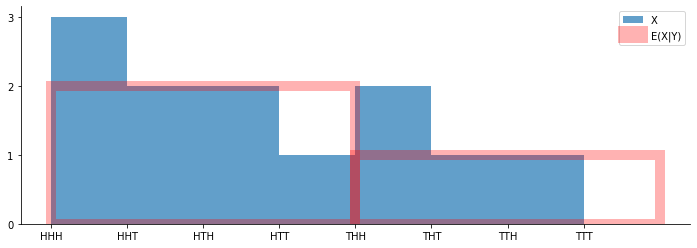

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
C = ("HHH","HHT","HTH","HTT","THH","THT","TTH","TTT") # 3 fair coin flip results
X = (3,2,2,1,2,1,1,0) # number of heads in 3 fair coin flips
X_Y = (2,2,2,2,1,1,1,1) # E(X|Y) where Y=1 if first is head esle 0
bar_positions = np.arange(8)

fig, ax = plt.subplots(figsize=(12,4))

# bar plot for X
ax.bar(bar_positions,X,width=1,align='edge',label='X',tick_label=C,alpha=0.7)

# bar plot for E(X|Y)
ax.bar([0,4],[2,1],width=4,align='edge',label='E(X|Y)',alpha=0.3,
       fill=False,linewidth=10,edgecolor='red')

ax.legend()
ax.set_yticks(range(4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

***Measure Theoretic Definition for Advanced Reader***

Let $(\Omega,{\cal F},\mathbb{P})$ be a probability space on which is defined a random variable $X$.
$X$ is either nonnegative or integrable.
Let ${\cal G}$ be a sub-$\sigma$-field of ${\cal F}$.
The conditional expectation of $X$ given ${\cal G}$, denoted $\mathbb{E}(X|{\cal G})$, is any random variable that satisfies

(1) (Measurability) $\mathbb{E}[X|{\cal G}]$ is ${\cal G}$-measumble
$$
\mathbb{E}[X|{\cal G}]\in{\cal G}
$$

(2) (Partial averaging) For any $A\in{\cal G}$
$$
\displaystyle
\int_A \mathbb{E}[X|{\cal G}](\omega)d\mathbb{P}(\omega)
=
\int_A X(\omega)d\mathbb{P}(\omega)
$$

######***Conditional Variance***

***Definition***

***$Var(X|Y=y)$ is a number***, which is given by
$$\begin{array}{lll}
Var(X)
=
E(X-E(X))^2
\ \ \Rightarrow\ \ 
Var(X|Y=y)
&=&
E((X-E(X|Y=y))^2|Y=y)
\end{array}$$


$$\begin{array}{lll}
Var(X|Y=y)
&=&
E((X-E(X|Y=y))^2|Y=y)\\
&=&
E(X^2|Y=y)
-
\left(E(X|Y=y)\right)^2
\end{array}$$

***$Var(X|Y)$ is not a number. It is a random variable***,  which is given by
$$
\omega
\quad\rightarrow\quad
y=Y(\omega)
\quad\rightarrow\quad
P(X=x|Y=y)
\quad\rightarrow\quad
Var(X|Y=y)
$$
or
$$\begin{array}{lll}
Var(X|Y)(\omega)
&=&
Var(X|Y=Y(\omega))
\end{array}$$

######***Properties of Conditional Expectation***

$$\begin{array}{lll}
(1)&&\mathbb{E}(X+Y|Z)=\mathbb{E}(X|Z)+\mathbb{E}(Y|Z)\\
(2)&&\mathbb{E}(aX|Y)=a\mathbb{E}(X|Y)\\
(3)&&\mathbb{E}(g(Y)|Y)=g(Y)\\
(4)&&\mathbb{E}(g(Y)X|Y)=g(Y)\mathbb{E}(X|Y)\\
(5)&&\mathbb{E}(X|Y)=\mathbb{E}(X)\ \text{if $X$ and $Y$ are independent}\\
(6)&&\mathbb{E}(X)=\mathbb{E}\mathbb{E}(X|Y)
\end{array}$$

***Proof***
$$
\mathbb{E}(X|Y)
=
\left\{\begin{array}{ll}
\mathbb{E}(X|Y=y_1)&\text{if $Y=y_1$ with probability $P(Y=y_1)$}\\
\mathbb{E}(X|Y=y_2)&\text{if $Y=y_2$ with probability $P(Y=y_2)$}\\
\cdots&\text{if}\ \cdots\\
\mathbb{E}(X|Y=y_n)&\text{if $Y=y_n$ with probability $P(Y=y_n)$}\\
\end{array}\right.
$$

So,

$$\begin{array}{lll}
\mathbb{E}\mathbb{E}(X|Y)
&=&\sum_{y_j}\mathbb{E}(X|Y=y_j)\mathbb{P}(Y=y_j)\\
&=&\sum_{y_j}\left(\sum_{x_i}x_i\mathbb{P}(X=x_i|Y=y_j)\right)\mathbb{P}(Y=y_j)\\
&=&\sum_{x_i}x_i\left(\sum_{y_j}\mathbb{P}(X=x_i|Y=y_j)\mathbb{P}(Y=y_j)\right)\\
&=&\sum_{x_i}x_i\mathbb{P}(X=x_i)=\mathbb{E}X
\end{array}$$

######***Properties of Conditional Variance***






$$\begin{array}{lll}
(7)&&Var(X)=\mathbb{E}Var(X|Y)+Var(\mathbb{E}(X|Y))\\
(8)&&Var(X)\ge \mathbb{E}Var(X|Y)\ \ \ \ \ \text{and}\ \ \ \ \ Var(X)\ge Var(\mathbb{E}(X|Y))
\end{array}$$









######***Further Properties of Conditional Expectation for Advanced Reader***

$$\begin{array}{lll}
(9)\ \text{Jensen's Inequality}&&\displaystyle
\mathbb{E}\left[\varphi(X)|{\cal G}\right]=\varphi\left(\mathbb{E}[X|{\cal G}]\right)\ \text{for convex $\varphi$}\\
(10)\ \text{Tower Property}&&\displaystyle
\mathbb{E}\left[\mathbb{E}[X|{\cal F}]|{\cal G}\right]=\mathbb{E}[X|{\cal G}],\quad\text{for}\ {\cal G}\subset{\cal F}
\end{array}$$

From the tower property, we have

$$\begin{array}{lll}
\displaystyle
\mathbb{E}\left[\mathbb{E}[f(X,Y)|Y]\right]=\mathbb{E}[f(X,Y)]\\
\end{array}$$

######***Example - Symmetry***

Let $X$ and $Y$ be iid $B(n,p)$. Calculate $E(X|X+Y=m)$.

***Solution***

Known info

$$
E(X+Y|X+Y=m)=E(m|X+Y=m)=m
$$

Symmetry

$$\begin{array}{lll}
E(X+Y|X+Y=m)
&=&
E(X|X+Y=m)+E(Y|X+Y=m)\\
&\stackrel{\text{by symmetry}}{=}&
2E(X|X+Y=m)
\end{array}$$

Wrap up

$$
E(X|X+Y=m)=\frac{m}{2}
$$

######***Example - from Joint to Conditional***




Compute $E(X|Y = y)$,
where
the joint PDF of $X$ and $Y$ is given by
$$
f(x,y)=\frac{e^{-\frac{x}{y}}e^{-y}}{y}\quad  0 < x < \infty,\ 0 < y < \infty
$$

***Solution***

$\displaystyle X|Y=y\sim Exp(\lambda),\ \lambda=\frac{1}{y}$

$$
f_{X|Y}(x|y)
\quad\propto\quad 
\frac{e^{-\frac{x}{y}}e^{-y}}{y}
\quad\propto\quad 
e^{-\frac{x}{y}}
\quad\propto\quad
\frac{1}{y} e^{-\frac{x}{y}}
$$
$$
X|Y=y 
\quad\sim\quad 
Exp(\lambda),\ \lambda=\frac{1}{y}
$$

$\displaystyle E(X|Y=y)=y,\ Var(X|Y=y)=y^2$

$$
E(X|Y=y)=\frac{1}{\lambda}=y
\quad\text{and}\quad
Var(X|Y=y)=\frac{1}{\lambda^2}=y^2
$$

$\displaystyle E(X|Y)=Y,\ Var(X|Y)=Y^2$


######***Example - Expected Amount of Money spent in Store***

Suppose that the number of people entering a department store on a given day is 
a random variable with mean 50 and variance 100. 
Suppose further that the amounts of money spent by these customers are 
iid with mean $\$8$ and standard deviation $\$4$. 
Finally, suppose also that the amount of money spent by a customer is also 
independent of the total number of customers who enter the store. 
What is the expected amount of money spent in the store on a given day?

***Solution***

Let $N$ be the number of people entering a department store on a given day, 
with mean 50 and variance 100, 
and let $X_i$ be the amounts of money spent by the $i$-th customer, iid with mean \$8 and standard deviation $\$4$. Let $T$ be the amount of money spent in the store on a given day.
Then, $T$ can be represented in terms of $N$ and $X_i$:
$$
T=\sum_{i=1}^NX_i
$$

$E(T|N)$ is a function of $N$

$$
E(T|N)
=E(\sum_{i=1}^NX_i|N)
=\sum_{i=1}^NE(X_i|N)
=\sum_{i=1}^NE(X_i)
=\sum_{i=1}^N8=8N
$$

$ET=EE(T|N)$

$$
ET=EE(T|N)=E8N=8EN=8\times 50=400
$$

$Var(T|N)$ is a function of $N$

$$
Var(T|N)
=Var(\sum_{i=1}^NX_i|N)
=\sum_{i=1}^NVar(X_i|N)
=\sum_{i=1}^NVar(X_i)
=\sum_{i=1}^N16=16N
$$

$Var(T)=Var(E(T|N))+EVar(T|N)$

$$
Var(E(T|N))=Var(8N)=64Var(N)=64\times 100=6400
$$
$$
EVar(T|N)=E16N=16EN=16\times 50=800
$$
$$
Var(T)=Var(E(T|N))+EVar(T|N)=6400+800=7200
$$

######***Example - Trapped Miner - Expectation***

A miner is trapped in a mine containing 3 doors. The first door leads to a tunnel that will take him to safety after 3 hours of travel. The second door leads to a tunnel that will return him to the mine after 5 hours of travel. The third door leads to a tunnel that will return him to the mine after 7 hours. If we assume that the miner is at all times equally likely to choose any one of the doors, what is the expected time $ET$ until he reaches safety?

***Solution***

Let $T$ be the exit time
and let $X$ be the first choice of the door he takes.
$$
\mathbb{E}(T|X=x)
\quad=\quad\left\{\begin{array}{ll}
3&\text{for $x=1$}\\
5+\mathbb{E}T&\text{for $x=2$}\\
7+\mathbb{E}T&\text{for $x=3$}\\
\end{array}\right.
$$
$$
\mathbb{E}(T|X)
\quad=\quad\left\{\begin{array}{ll}
3&\text{with probability $1/3$}\\
5+\mathbb{E}T&\text{with probability $1/3$}\\
7+\mathbb{E}T&\text{with probability $1/3$}\\
\end{array}\right.
$$
$$
\mathbb{E}T=
\mathbb{E}\mathbb{E}(T|X)
=
3*\frac{1}{3}
+(5+\mathbb{E}T)*\frac{1}{3}
+(7+\mathbb{E}T)*\frac{1}{3}
\ \ \Rightarrow\ \ 
\mathbb{E}T=15
$$

######***Example - Trapped Miner - Variance***

***Solution***

$Var(\mathbb{E}(T|X))$

$$
\mathbb{E}(T|X)
\quad=\quad\left\{\begin{array}{ll}
3&\text{with probability $1/3$}\\
5+\mathbb{E}T=20&\text{with probability $1/3$}\\
7+\mathbb{E}T=22&\text{with probability $1/3$}\\
\end{array}\right.
$$

$$\begin{array}{lll}
Var(\mathbb{E}(T|X))
&=&
\mathbb{E}\mathbb{E}(T|X)^2
-(\mathbb{E}\mathbb{E}(T|X))^2\\
&=&
\mathbb{E}\mathbb{E}(T|X)^2
-(\mathbb{E}T)^2\\
&=&
(3)^2*\frac{1}{3}+(20)^2*\frac{1}{3}+(22)^2*\frac{1}{3}
-(15)^2=72.6667
\end{array}$$

$\mathbb{E}Var(T|X)$

$$
Var(T|X=x)
\quad=\quad\left\{\begin{array}{ll}
0&\text{for $x=1$}\\
Var(T)&\text{for $x=2$}\\
Var(T)&\text{for $x=3$}\\
\end{array}\right.
$$

$$
Var(T|X)
\quad=\quad\left\{\begin{array}{ll}
0&\text{with probability $1/3$}\\
Var(T)&\text{with probability $1/3$}\\
Var(T)&\text{with probability $1/3$}\\
\end{array}\right.
$$
$$
\mathbb{E}Var(T|X)=
0*\frac{1}{3}
+Var(T)*\frac{1}{3}
+Var(T)*\frac{1}{3}
$$

$Var(T)=Var(\mathbb{E}(T|X))+\mathbb{E}Var(T|X)$

$$\begin{array}{lll}
Var(T)
&=&Var(\mathbb{E}(T|X))+\mathbb{E}Var(T|X)\\
&=&72.6667+0*\frac{1}{3}
+Var(T)*\frac{1}{3}
+Var(T)*\frac{1}{3}=218
\end{array}$$

######***Example - Waiting Time for $HT$***

Flip the fair coin until we get the pattern $HT$.
Let $W_{HT}$ be the number of flips to get the first $HT$.
Calculate the mean and variance of $W_{HT}$.

***Solution***

$W_{HT}=X+Y$

$$
\underbrace{TTTTTTTTTTTTTH}_{X\ \text{is}\ Geo(1/2)}\underbrace{HHHHHHHHHT}_{Y\ \text{is}\ Geo(1/2)}
$$

By their construction

$$\begin{array}{lll}
(1)&&X\ \text{is}\ Geo(1/2)\ \text{and}\ Y\ \text{is also}\ Geo(1/2)\\
(2)&&X\ \text{and $Y$ are independent}\\ 
(3)&&W_{HT}=X+Y
\end{array}$$

$EW_{HT}=EX+EY$

$$
EW_{HT}=EX+EY=\frac{1}{1/2}+\frac{1}{1/2}=4
$$

$Var(W_{HT})=Var(X)+Var(Y)$

$$
Var(W_{HT})=Var(X)+Var(Y)=\frac{1/2}{(1/2)^2}+\frac{1/2}{(1/2)^2}=4
$$

######***Example - Waiting Time for $HH$ - Expectation***

Flip the fair coin until we get the pattern $HH$.
Let $W_{HH}$ be the number of flips to get the first $HH$.
Calculate the mean and variance of $W_{HH}$.

***Solution***

$\mathbb{E}W_{HH}=\mathbb{E}\mathbb{E}(W_{HH}|Y)$

$$
\underbrace{TTTTTTTTTTTTTH}_{X\ \text{is}\ Geo(1/2)}
$$
After we have the first head at the $X$-th flip,
we record the next coin flip result as $Y$.
$$
\mathbb{E}(W_{HH}|Y=y)
=\left\{\begin{array}{ll}
\mathbb{E}X+1=3&\text{for $y=1$}\\
\mathbb{E}X+1+\mathbb{E}W_{HH}=3+\mathbb{E}W_{HH}&\text{for $y=0$}\\
\end{array}\right.
$$
$$
\mathbb{E}(W_{HH}|Y)
=\left\{\begin{array}{ll}
3&\text{with probability $1/2$}\\
3+\mathbb{E}W_{HH}&\text{with probability $1/2$}\\
\end{array}\right.
$$
$$
\mathbb{E}W_{HH}
=
\mathbb{E}\mathbb{E}(W_{HH}|Y)
=
(3)*\frac{1}{2}
+(3+\mathbb{E}W_{HH})*\frac{1}{2}
\ \  \Rightarrow\ \ 
\mathbb{E}W_{HH}=6
$$



######***Example - Waiting Time for $HH$ - Variance***

***Solution***

$Var(\mathbb{E}(W_{HH}|Y))$

$$
\mathbb{E}(W_{HH}|Y)
=\left\{\begin{array}{ll}
3&\text{with probability $1/2$}\\
9&\text{with probability $1/2$}\\
\end{array}\right.
$$

$$\begin{array}{lll}
Var(\mathbb{E}(W_{HH}|Y))
&=&
\mathbb{E}\mathbb{E}(W_{HH}|Y)^2
-
(\mathbb{E}\mathbb{E}(W_{HH}|Y))^2\\
&=&
\mathbb{E}\mathbb{E}(W_{HH}|Y)^2
-
(\mathbb{E}W_{HH})^2\\
&=&
(3)^2*\frac{1}{2}
+(9)^2*\frac{1}{2}
-
(6)^2=9
\end{array}$$

$\mathbb{E}Var(W_{HH}|Y)$

$$
Var(W_{HH}|Y=y)
\quad=\quad\left\{\begin{array}{ll}
Var(X)=2&\text{for $y=1$}\\
Var(X)+Var(W_{HH})=2+Var(W_{HH})&\text{for $y=0$}\\
\end{array}\right.
$$
$$
Var(W_{HH}|Y)
\quad=\quad\left\{\begin{array}{ll}
2&\text{with probability $1/2$}\\
2+Var(W_{HH})&\text{with probability $1/2$}\\
\end{array}\right.
$$
$$
\mathbb{E}Var(W_{HH}|Y)=
(2)*\frac{1}{2}
+(2+Var(W_{HH}))*\frac{1}{2}
$$

$Var(W_{HH})=Var(\mathbb{E}(W_{HH}|Y))+\mathbb{E}Var(W_{HH}|Y)$

$$\begin{array}{lll}
Var(W_{HH})
&=&Var(\mathbb{E}(W_{HH}|Y))+\mathbb{E}Var(W_{HH}|Y)\\
&=&9
+(2)*\frac{1}{2}
+(2+Var(W_{HH}))*\frac{1}{2}=22
\end{array}$$

###***Chapter 11 Normal Distribution***

###### ***Normal Distribution $N(\mu,\sigma^2)$***

***PDF***

$$
f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

***Mean and Variance***

$$\begin{array}{lll}
\text{mean}&&\mu\\
\text{variance}&&\sigma^2
\end{array}$$

***Intuition***

$$
\begin{array}{lll}
(1)&&\text{Flip a $p$-coin $n$ times and record the number of heads}\\
(2)&&\text{Standardize the number of heads}\\
(3)&&\text{Report the standardized number of heads (CLT)}
\end{array}
$$

***How to plot Normal PDF***

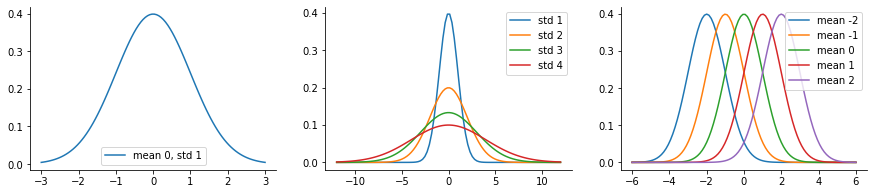

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(15,3))

# ax0
mu = 0 # mean 0
sigma = 1 # standard deviation 1
x = mu + sigma * np.linspace(-3,3,100) 
y = stats.norm(mu,sigma).pdf(x)
ax0.plot(x,y,label='mean {}, std {}'.format(mu,sigma))

# ax1
mu = 0 # mean 0
sigmas = np.arange(1,5) # several different standard deviations 
x = np.linspace(-12,12,100)
for sigma in sigmas:
    y = stats.norm(mu,sigma).pdf(x)
    ax1.plot(x, y, label='std {}'.format(sigma)) 
    
# ax2
mus = np.arange(-2,3) # several different means
sigma = 1 # standard deviation 1 
x = np.linspace(-6,6,100)
for mu in mus:
    y = stats.norm(mu,sigma).pdf(x)
    ax2.plot(x, y, label='mean {}'.format(mu)) 
    
for ax in (ax0, ax1, ax2):
    ax.legend()
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

plt.show()

***How to plot Normal PDF and CDF***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mu = 0
sigma = 1

x = mu + 3*sigma*np.linspace(-1,1,100)
pdf = stats.norm(mu,sigma).pdf(x)
cdf = stats.norm(mu,sigma).cdf(x)

fig, ax = plt.subplots()
ax.plot(x,pdf,label='pdf')
ax.plot(x,cdf,label='cdf')
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.legend()
plt.show()

###### ***Properties of Normal Distribution***

***Properties of Normal Distribution***

$$\begin{array}{lll}
(1)& X\sim\mbox{Normal}\quad\Rightarrow\quad aX+b\sim\mbox{Normal}\\
\\
(2)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $X$ and $Y$ are independent}\\
\\
(3)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $(X,Y)$ is multivariate normal}\\
\\
\mbox{WARNING}& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\not\Rightarrow\quad X+Y\sim\mbox{Normal}\\
\end{array}$$

***Proof***

(1) We handle the case $a>0$.
One can handle the other case similarly.
Let $X\sim N(\mu,\sigma^2)$. Then
$$
P\left(aX+b\le x\right)
=P\left(X\le\frac{x-b}{a}\right)
=\int_{-\infty}^{\frac{x-b}{a}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(s-\mu)^2}{2\sigma^2}}ds$$
Let $f$ be the PDF of $aX+b$. Then
$$
P\left(aX+b\le x\right)
= \int_{-\infty}^{x}f(s)ds\\
$$
So we have
$$
\int_{-\infty}^{x}f(s)ds=\int_{-\infty}^{\frac{x-b}{a}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(s-\mu)^2}{2\sigma^2}}ds
$$
Differentiating both sides
$$
f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(\frac{x-b}{a}-\mu\right)^2}{2\sigma^2}}\frac{1}{a}
\quad\sim\quad N(a\mu+b,a^2\sigma^2)
$$

***Standardization and Reverse Standardization***

$$\begin{array}{lll}
\mbox{Standardization}&&X\sim N(\mu,\sigma^2)\quad\Rightarrow\quad \frac{X-\mu}{\sigma}\sim N(0,1^2)\\
\mbox{Reverse Standardization}&&Z\sim N(0,1^2)\quad\Rightarrow\quad Z*\sigma+\mu\sim N(\mu,\sigma^2)\\
\end{array}$$

######***Standard Normal Distribution $N(0,1)$***

***Example - Integration Trick Related to Normal PDF*** 

compute the following integral

$$
\int_{-\infty}^{\infty}e^{-x^2-2x}dx
$$

***Solution***

$$
-x^2-2x=-(x^2+2x+1)+1=-(x+1)^2+1
$$

\begin{eqnarray}
\int_{-\infty}^{\infty}e^{-x^2-2x}dx
&=&
e\int_{-\infty}^{\infty}e^{-(x+1)^2}dx\nonumber\\
&=&
e\sqrt{2\pi\cdot\frac{1}{2}}\int_{-\infty}^{\infty}\underbrace{\frac{1}{\sqrt{2\pi\cdot\frac{1}{2}}}e^{-\frac{(x+1)^2}{2\cdot \frac{1}{2}}}}_{\mbox{PDF of $N(-1,\frac{1}{2})$}}dx\nonumber\\
&=&
e\sqrt{2\pi\cdot\frac{1}{2}}\nonumber
\end{eqnarray}

***PDF of Standard Normal Distribution $N(0,1)$***

The PDF of the standard normal distribution $N(0,1^2)$ is given by
$$
\displaystyle f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$
Show that
\begin{eqnarray}
(1)&&\mbox{total mass is indeed 1}\nonumber\\
(2)&&\mbox{mean 0}\nonumber\\
(3)&&\mbox{variance 1}\nonumber
\end{eqnarray}

***Solution***

(1) 
With $I:=\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx$
\begin{eqnarray}
I^2&=&\left(\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx\right)\left(\int_{-\infty}^{\infty}e^{-\frac{y^2}{2}}dy\right)\nonumber\\
&=&\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-\frac{x^2+y^2}{2}}dxdy
=\int_{0}^{2\pi}\int_{0}^{\infty}e^{-\frac{r^2}{2}}rdrd\theta\nonumber\\
&=&2\pi\int_{0}^{\infty}e^{-\frac{r^2}{2}}rdr=2\pi\left[-e^{-\frac{r^2}{2}}\right]_{0}^{\infty}=2\pi\nonumber
\end{eqnarray}
$$
I^2=2\pi
\quad\Rightarrow\quad
I=\sqrt{2\pi}
\quad\Rightarrow\quad
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx=1
$$

(2)
$$
\mbox{Integrand is odd}
\quad\Rightarrow\quad
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}xe^{-\frac{x^2}{2}}dx=0
$$

(3)
\begin{eqnarray}
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^2e^{-\frac{x^2}{2}}dx
&=&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\left(-x\right)\left(e^{-\frac{x^2}{2}}\right)'dx\ \ \ \ \ \mbox{(Integration by part)}\nonumber\\
&=&\frac{1}{\sqrt{2\pi}}\left[\left(-x\right)\left(e^{-\frac{x^2}{2}}\right)\right]_{-\infty}^{\infty}-\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\left(-x\right)'\left(e^{-\frac{x^2}{2}}\right)dx\nonumber\\
&=&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx=1\quad
\nonumber
\end{eqnarray}

***Exercise*** 

The PDF of the standard normal distribution $N(\mu,\sigma^2)$ is given by
$$
\displaystyle f(x)=\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}
$$
Show that
\begin{eqnarray}
(1)&&\mbox{Total mass is indeed 1}\nonumber\\
(2)&&\mbox{Mean $\mu$}\nonumber\\
(3)&&\mbox{Variance $\sigma^2$}\nonumber
\end{eqnarray}

***CDF of Standard Normal Distribution $N(0,1)$***

$$
N(x)=\int_{-\infty}^x\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
$$

***Properties of Standard Normal CDF***

\begin{eqnarray}
(1)&&P(a\le Z\le b)=N(b)-N(a)\nonumber\\
(2)&&P(Z\ge x)=P(Z\le -x)=N(-x)\nonumber\\
(3)&&P(Z\ge x)=1-P(Z\le x)=1-N(x)\nonumber\\
(4)&&P(Z\le 0)=P(Z\ge 0)=0.5\nonumber
\end{eqnarray}

***How to generate Standard Normal Sample***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

data = np.random.randn(10_000)

fig, ax = plt.subplots(figsize=(10,5))
_, x, _ = ax.hist( data, bins=100, density=True, alpha=0.3 )
y = stats.norm().pdf(x)
ax.plot(x,y,'--r',lw=5) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
plt.savefig('normal.png', dpi=1_000)
plt.show()

###### ***Why Normal (CLT)***

***Estimation of $\mu$ and $\sigma$***

$$\begin{array}{lll}
\hat{\mu}&=&\displaystyle\frac{\sum_{i=1}^nX_i}{n}\\
\hat{\sigma}^2&=&\displaystyle\frac{\sum_{i=1}^n(X_i-\hat{\mu})^2}{n}
\end{array}$$

***Why Normal (CLT)***

For $n$ iid samples $X_i$ from a common distribution with finite mean $\mu$ and variance $\sigma^2$
$$
S_n:=\sum_{i=1}^n X_i\approx N(\mu,\sigma^2)
$$
or
$$
\frac{S_n-n\mu}{\sqrt{n\sigma^2}}\approx N(0,1^2)
$$
or
$$
\frac{S_n-n\hat{\mu}}{\sqrt{n\hat{\sigma}^2}}\approx N(0,1^2)
$$

This means for any fixed $a$
$$
P\left(\frac{S_n-n\hat{\mu}}{\sqrt{n\hat{\sigma}^2}}\le a\right)\quad\approx\quad N(a)
$$

More precisely,
for any fixed $a$
as $n\rightarrow\infty$
$$
P\left(\frac{S_n-n\hat{\mu}}{\sqrt{n\hat{\sigma}^2}}\le a\right)\quad\rightarrow\quad N(a)
$$

###### ***Skewness and Kurtosis***

$$\begin{array}{lll}
\mbox{Skewness}(X)&=&\displaystyle E\left(\frac{X-\mu}{\sigma}\right)^3\nonumber\\
\mbox{Kurtosis}(X)&=&\displaystyle E\left(\frac{X-\mu}{\sigma}\right)^4\nonumber\\
\mbox{Excess_Kurtosis}(X)&=&\displaystyle \mbox{Kurtosis}(X)-3\nonumber\\
\end{array}$$

***Skewness - Measure of symmetry of distribution wrt its mean*** 

$$\begin{array}{lll}
\text{Negative skewness}
&\Rightarrow&
\text{Left skewed}\\
\text{Zero skewness}\quad\ \ 
&\Rightarrow&
\text{Balanced}\\
\text{Positive skewness}\
&\Rightarrow&
\text{Right skewed}
\end{array}$$


***Kurtosis - Measure of thickness of the tail of the distribution***

$$\begin{array}{lll}
\text{Kurtosis}>3\ \text{or}\ \text{Excessive Kurtosis}>0
&\Rightarrow&
\text{Fat tail}\\
\text{Kurtosis}=3\ \text{or}\ \text{Excessive Kurtosis}=0
&\Rightarrow&
\text{Like normal distribution}\\
\text{Kurtosis}<3\ \text{or}\ \text{Excessive Kurtosis}<0
&\Rightarrow&
\text{Light tail}
\end{array}$$


In [ ]:
import numpy as np
from scipy import stats

n = 1000
x = np.random.normal(0, 1, (n,)) 

# kurtosis is normalized so that it is zero for the normal distribution
# Excess_Kurtosis(X) = Kurtosis(X) − 3
print("Number of samples  ", x.shape[0])
print("Minimum of samples ", np.min(x))
print("Maximum of samples ", np.max(x))
print("Mean               ", np.mean(x))
print("Variance           ", np.var(x)) # population variance
print("Skewness           ", stats.skew(x))
print("Kurtosis           ", stats.kurtosis(x)) # Excess_Kurtosis(X)
print("Median             ", np.median(x))
print("Standard deviation ", np.std(x), end="\n\n")

# kurtosis is normalized so that it is zero for the normal distribution
# Excess_Kurtosis(X) = Kurtosis(X) − 3
n, min_max, mean, var, skew, kurt = stats.describe(x)
print("Number of samples  ", n)
print("Minimum of samples ", min_max[0])
print("Maximum of samples ", min_max[1])
print("Mean               ", mean)
print("Variance           ", var) # population variance
print("Skewness           ", skew)
print("Kurtosis           ", kurt) # Excess_Kurtosis(X)

Number of samples   1000
Minimum of samples  -3.116856591599126
Maximum of samples  2.9290962417638613
Mean                -0.051228563665672223
Variance            0.9103389678864449
Skewness            -0.07931734758987236
Kurtosis            -0.24715299049537442
Median              -0.052497821772340664
Standard deviation  0.9541168523228404

Number of samples   1000
Minimum of samples  -3.116856591599126
Maximum of samples  2.9290962417638613
Mean                -0.051228563665672223
Variance            0.9112502181045494
Skewness            -0.07931734758987236
Kurtosis            -0.24715299049537442


###***Chapter 12 Multivariate Normal Distribution***

######***Bivariate normal distribution $N(\mu,\Sigma)$***

***PDF***

$$
f({\bf x})=\frac{1}{\sqrt{(2\pi)^2|\Sigma|}}e^{-\frac{1}{2}{({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)}}
$$
where
$$\begin{array}{lll}
\text{mean}&&\mu\\
\text{covariance matrix}&&\Sigma\\
\text{determinant of the covariance matrix $\Sigma$}&&|\Sigma|\\
\end{array}$$

***Covariance Matrix and Its Inverse***

$$\begin{array}{lll}
\Sigma
=\left(\begin{array}{cc}\sigma_x^2&\rho\sigma_x\sigma_y\\\rho\sigma_x\sigma_y&\sigma_y^2\end{array}\right)
&\Rightarrow&
|\Sigma|
=(1-\rho^2)\sigma_x^2\sigma_y^2\\
&\Rightarrow&
\Sigma^{-1}=\frac{1}{(1-\rho^2)\sigma_x^2\sigma_y^2}\left(\begin{array}{cc}\sigma_y^2&-\rho\sigma_x\sigma_y\\-\rho\sigma_x\sigma_y&\sigma_x^2\end{array}\right)
\end{array}$$

***Another Form of PDF***

With ${\tilde x}=\frac{x-\mu_x}{\sigma_x}$, ${\tilde y}=\frac{y-\mu_y}{\sigma_y}$
$$\begin{array}{llllll}
({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)
&=&
\frac{{\tilde x}^2+{\tilde y}^2-2\rho{\tilde x}{\tilde y}}{1-\rho^2}
\end{array}$$

Therefore, (Don't forget to multiply the Jacobian)

$$\begin{array}{llllll}
\displaystyle 
f({\bf x})
=
\frac{1}{2\pi}
e^{-\frac{{\tilde x}^2+{\tilde y}^2}{2}}&&\text{if $X$ and $Y$ are independent}\\
\displaystyle
f({\bf x})
=
\frac{1}{2\pi\sqrt{1-\rho^2}}
e^{-\frac{{\tilde x}^2+{\tilde y}^2-2\rho{\tilde x}{\tilde y}}{2(1-\rho^2)}}&&\text{in general}\\
\end{array}$$


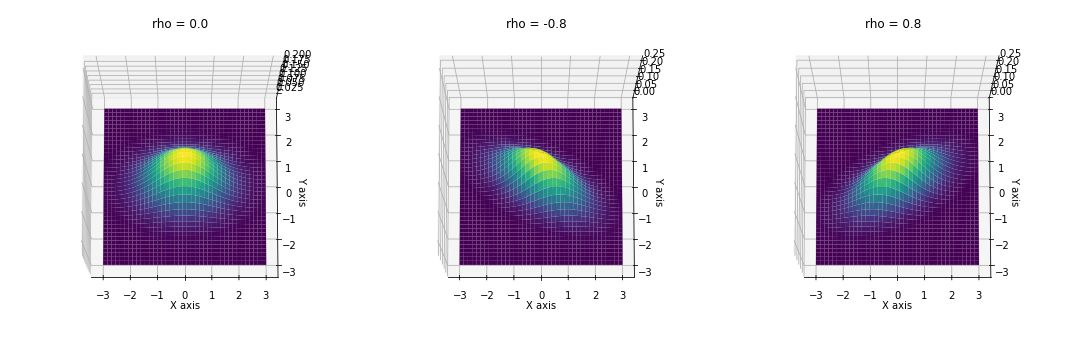

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Number of points in each direction
n = 40 

# Parameters
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 0.5
rhos = (0.0, -0.8, 0.8)

# Create a grid and a multivariate normal
x = np.linspace(-3.0, 3.0, n)
y = np.linspace(-3.0, 3.0, n)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = lambda rho: stats.multivariate_normal([mu_1, mu_2], [[sigma_1, rho*sigma_1*sigma_2],
                                                         [rho*sigma_1*sigma_2, sigma_2]])

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection': '3d'})

for ax, rho in zip((ax0, ax1, ax2), rhos):
    ax.plot_surface(X, Y, Z(rho).pdf(pos), cmap='viridis', linewidth=0)
    ax.set_title(f"{rho = }")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.view_init(80, -90)

plt.tight_layout()
plt.show()

######***Multivariate normal distribution $N(\mu,\Sigma)$***

***PDF***

$$
f({\bf x})=\frac{1}{\sqrt{(2\pi)^d|\Sigma|}}e^{-\frac{1}{2}({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)}
$$
where
$$\begin{array}{lll}
\text{mean}&&\mu\\
\text{covariance matrix}&&\Sigma\\
\text{determinant of the covariance matrix $\Sigma$}&&|\Sigma|\\
\end{array}$$

***Definition***

Multivariate normal
${\bf x}=[x_1,x_2,\cdots,x_d]'$ is given by ${\bf x}={\bf A}{\bf z}+\mu$:

$$
\underbrace{\left[\begin{array}{c}x_1\\x_2\\\vdots\\x_d\end{array}\right]}_{{\bf x}}
=
\underbrace{\left[\begin{array}{cccc}
a_{11}&a_{12}&\cdots&a_{1n}\\
a_{21}&a_{22}&\cdots&a_{2n}\\
\vdots&\vdots&\vdots&\vdots\\
a_{d1}&a_{d2}&\cdots&a_{dn}
\end{array}\right]}_{{\bf A}}
\underbrace{\left[\begin{array}{c}z_{1}\\z_{2}\\\vdots\\z_n\end{array}\right]}_{{\bf z}}
+
\underbrace{\left[\begin{array}{c}\mu_1\\\mu_2\\\vdots\\\mu_d\end{array}\right]}_{\mu}$$

where $z_k$ are iid standard normal and
where ${\bf A}$ and $\mu$ are constants.

***Computation of Mean and Covariance Matrix***

$$\begin{array}{llll}
\mathbb{E}{\bf x}
&=&\mathbb{E}({\bf A}{\bf z}+\mu)
={\bf A}\mathbb{E}{\bf z}+\mu
={\bf A}{\bf 0}+\mu
=\mu\\
\Sigma
&=&
\mathbb{E}({\bf x}-\mu)({\bf x}-\mu)^T
=\mathbb{E}({\bf A}{\bf z})({\bf A}{\bf z})^T
={\bf A}(\mathbb{E}{\bf z}{\bf z}^T){\bf A}^T
={\bf A}{\bf I}{\bf A}^T
={\bf A}{\bf A}^T
\end{array}$$





######***Joint MGF of Multivariate Normal Distribution $N(\mu,\Sigma)$***

$$\begin{array}{lllll}
\displaystyle \phi(t)
&=&\displaystyle e^{\mu t+\frac{1}{2}\sigma^2t^2}
&&\text{for $x\sim N(\mu,\sigma^2)$}\\
\displaystyle \phi(t)
&=&\displaystyle e^{{\bf t}^T\mu+\frac{1}{2}{\bf t}^T\Sigma{\bf t}}
&&\text{for ${\bf x}\sim N(\mu,\Sigma)$}\\
\end{array}$$

***Proof***

With ${\bf z}=(z_k)^T$ iid $N(0,1^2)$
$$\begin{array}{lllll}
{\bf x}\sim{\cal N}(\mu,\Sigma)\ \ \Rightarrow\ \ {\bf x}={\bf A}{\bf z}+\mu\ \ \text{where ${\bf A}{\bf A}^T=\Sigma$}
\end{array}$$

$$
\text{${\bf t}^T{\bf x}={\bf t}^T({\bf A}{\bf z}+\mu)=\sum_ka_kz_k+b\sim {\cal N}(\mu_1,\sigma_1^2)$}
$$
where
$$\begin{array}{lllll}
\mu_1&=&\mathbb{E}{\bf t}^T({\bf A}{\bf z}+\mu)
={\bf t}^T({\bf A}\mathbb{E}{\bf z}+\mu)
={\bf t}^T({\bf A}{\bf 0}+\mu)
={\bf t}^T\mu\\
\\
\sigma_1^2&=&\mathbb{E}({\bf t}^T{\bf A}{\bf z})({\bf t}^T{\bf A}{\bf z})^T
={\bf t}^T{\bf A}E({\bf z}{\bf z}^T){\bf A}^T{\bf t}
={\bf t}^T{\bf A}{\bf I}{\bf A}^T{\bf t}
={\bf t}^T{\bf A}{\bf A}^T{\bf t}
={\bf t}^T\Sigma{\bf t}\\
\end{array}$$

$$
\phi_{{\bf x}}({\bf t})
=\mathbb{E}e^{{\bf t}^T{\bf x}}
=\mathbb{E}e^{{\bf t}^T({\bf A}{\bf z}+\mu)}
=\phi_{{\cal N}(\mu_1,\sigma_1^2)}(1)
=e^{\mu_1+\frac{1}{2}\sigma_1^2}
=e^{{\bf t}^T\mu+\frac{1}{2}{\bf t}^T\Sigma{\bf t}}
$$

######***Properties of Multivariate Normal Distribution $N(\mu,\Sigma)$***

$$\begin{array}{lllll}
(1)&\text{$\mu$ and $\Sigma$ completely determine the multivariate normal distribution}\\
(2)&\text{If off diagonals of $\Sigma$ are all 0, then all the components of ${\bf x}$ are independent}\\
(3)&\text{If for fixed $i$, $\Sigma_{ij}=0$ for all $j\neq i$, then ${\bf x}_i$ is independent to ${\bf x}_j$, $j\neq i$}\\
\end{array}$$

***Proof***

(1) Suppose two multivariate normal random variables ${\bf x}$ and ${\bf y}$ have
common mean $\mu$ and covariance matrix $\Sigma$.
Then, their joint MGFs of ${\bf x}$ and ${\bf y}$ are identical:
$$
\phi_{\bf x}({\bf t})
=e^{{\bf t}^T\mu+\frac{1}{2}{\bf t}^T\Sigma{\bf t}}
=\phi_{\bf y}({\bf t})
$$
Hence,
they have same distribution.

(2)
Suppose a multivariate normal random variable ${\bf x}$ 
have a covariance matrix $\Sigma$, whose off diagonals are all 0. 
Then, joint MGFs of ${\bf x}$ and ${\bf y}$, where 
${\bf y}_i$ are independent ${\cal N}(\mu_i,\sigma_i^2)$, are identical:
$$\phi_{{\bf x}}({\bf t})
=
\phi_{{\cal N}(\mu,\Sigma)}({\bf t})
=e^{{\bf t}^T\mu+\frac{1}{2}{\bf t}^T\Sigma{\bf t}}
=\underbrace{e^{\mu_1 t_1+\frac{1}{2}\sigma_1^2t_1^2}}_{\text{$\phi_{N(\mu_1,\sigma_1^2)}(t_1)$}}\underbrace{e^{\mu_2 t_2+\frac{1}{2}\sigma_2^2t_2^2}}_{\text{$\phi_{N(\mu_2,\sigma_2^2)}(t_2)$}}\cdots \underbrace{e^{\mu_d t_d+\frac{1}{2}\sigma_d^2t_d^2}}_{\text{$\phi_{N(\mu_d,\sigma_d^2)}(t_d)$}}
=\phi_{{\bf y}}({\bf t})
$$
Hence,
they have same distribution.
In particular,
all the components $x_i$ of the multivariate normal random variable ${\bf x}$ are independent.

(3)
Suppose a multivariate normal random variable ${\bf x}$ 
have a covariance matrix $\Sigma$
such that
for fixed $i$, $\Sigma_{ij}=0$ for all $j\neq i$.
Then, joint MGFs of ${\bf x}$ and ${\bf y}$, where 
the mean and covariance matrix of ${\bf y}$ are identical to those of ${\bf x}$ and where in addition
${\bf y}_i$ is independent to ${\bf y}_j$, $j\neq i$, are identical.
Hence,
they have same distribution.
In particular,
${\bf x}_i$ is independent to ${\bf x}_j$, $j\neq i$.

######***Correlation and Normal Distribution***

$$\begin{array}{llllll}
Cov(X,Y)=0
&\Rightarrow&
\text{$X$, $Y$ independent (wrong)}\\
\text{$X$, $Y$ normal},\quad
Cov(X,Y)=0
&\Rightarrow&
\text{$X$, $Y$ independent (wrong)}\\
\text{$[X,Y]^T$ bivariate normal},\quad
Cov(X,Y)=0
&\Rightarrow&
\text{$X$, $Y$ independent (correct)}
\end{array}$$

***Proof***

Let $X$ be standard normal.
Independent to $X$ we flip a fair coin
and record its out put $S$
as 1 if head and $-1$ if tail. 
Now, define $Y$ as 
$$Y=S\cdot X$$

$Y$ is standard normal.
$$\begin{array}{lll}
P(Y\le y)
&=&P(S=1)P(X\le y)+P(S=-1)P(X\ge -y)\\
&=&\frac{1}{2}\int_{-\infty}^y\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds+\frac{1}{2}\int_{-y}^{\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
\end{array}$$

$$
f_Y(y)
=\frac{1}{2}\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}+\frac{1}{2}\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}=\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}
$$

$$\begin{array}{lll}
EXY
&=&P(S=1)E(XY|S=1)+P(S=-1)E(XY|S=-1)\\
&=&P(S=1)E(X^2)+P(S=-1)E(-X^2)=\frac{1}{2}E(X^2)-\frac{1}{2}E(X^2)=0\\
\\
Cov(X,Y)
&=&
0
\end{array}$$

But, by the construction of $Y$, $X$ and $Y$ are not independent.
For example, if $X=2$, then $Y$ is either 2 or $-2$.

###***Chapter 13 Central Limit Theorem***

###### Moment generating function (MGF)

definition 

$$
\phi(t)=\phi_X(t)=Ee^{tX}
$$

reason for name


$$\begin{array}{lllll}
\phi(t)=Ee^{tX}
&\Rightarrow&
\phi'(t)=EXe^{tX}
&\Rightarrow&
\phi'(0)=EX\nonumber\\
\\
\phi(t)=Ee^{tX}
&\Rightarrow&
\phi''(t)=EX^2e^{tX}
&\Rightarrow&
\phi''(0)=EX^2\nonumber\\
\\
\vdots&\vdots&\vdots\nonumber\\
\\
\phi(t)=Ee^{tX}
&\Rightarrow&
\phi^{(n)}(t)=EX^ne^{tX}
&\Rightarrow&
\phi^{(n)}(0)=EX^n\nonumber
\end{array}$$

why MGF


\begin{eqnarray}
(1)&&
\phi_X(t)=\phi_Y(t)
\ \ \quad\Rightarrow\quad
\mbox{Distribution of}\ X\ \quad=\ \quad\mbox{Distribution of}\ Y\nonumber\\
\nonumber\\
(2)&&
\phi_{X_n}(t)\rightarrow\phi_Y(t)
\quad\Rightarrow\quad
\mbox{Distribution of}\ X_n\quad\rightarrow\quad\mbox{Distribution of}\ Y\nonumber
\end{eqnarray}

###### Examples of MGF

\begin{eqnarray}
B(p)\quad\ \ &&
\phi(t)=1+p(e^t-1)\nonumber\\
\nonumber\\
B(n,p)\ \ &&
\phi(t)=\left[1+p(e^t-1)\right]^n\nonumber\\
\nonumber\\
Po(\lambda)\quad&&
\phi(t)=e^{-\lambda(1-e^t)}\nonumber\\
\nonumber\\
N(\mu,\sigma ^2)&&
\phi(t)=e^{\mu t+\frac{1}{2}\sigma ^2t^2}\nonumber
\end{eqnarray}

Proof

$$
\begin{array}{lll}
\phi_{B(p)}(t)
&=&
Ee^{tX}=
e^t\times p+1\times(1-p)=
1+p(e^t-1)\nonumber\\
\nonumber\\
\phi_{B(n,p)}(t)
&=&
\prod_{k=1}^nEe^{tX_k}=
\prod_{k=1}^n(1+p(e^t-1))=
(1+p(e^t-1))^n\nonumber\\
\nonumber\\
\phi_{Po(\lambda)}(t)
&=&
\sum_{k=0}^{\infty}e^{tk}\frac{\lambda^k}{k!}e^{-\lambda}=
\left(\sum_{k=0}^{\infty}\frac{(\lambda e^t)^k}{k!}\right)e^{-\lambda}=
e^{\lambda e^t}e^{-\lambda}=
e^{-\lambda(1-e^t)}\nonumber\\
\nonumber\\
\phi_{N(\mu,\sigma ^2)}(t)
&=&\int_{-\infty}^{\infty}e^{tx}\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}dx\nonumber\\
&=&e^{\mu t+\frac{1}{2}\sigma ^2t^2}\int_{-\infty}^{\infty}\underbrace{\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-(\mu+\sigma ^2t))^2}{2\sigma ^2}}}_{\mbox{PDF of $N(\mu+\sigma ^2t,\sigma ^2)$}}dx=e^{\mu t+\frac{1}{2}\sigma ^2t^2}\nonumber
\end{array}
$$

###### Poisson approximation revisited (using MGF)

poisson approximation

If $n$ is large, $p$ is small, $np=\lambda$ is medium,
$$B(n,p)\approx Po(\lambda)$$
meaning, with $X\sim B(n,p)$, $Y\sim Po(\lambda)$, for any $k=0,1,2,\ldots$
$$
P(X=k)={n\choose k}p^kq^{n-k}
\quad\approx\quad 
P(Y=k)=e^{-\lambda}\frac{\lambda^k}{k!}
$$

proof

$$
\phi_{B(n,p)}(t)
=
(1+p(e^t-1))^n
\approx
\left(e^{p(e^t-1)}\right)^n
=
e^{-\lambda (1-e^t)}
=
\phi_{Po(\lambda)}(t)
$$

exercise

Using MGF show
$$
Po(\lambda_1)*Po(\lambda_2)=Po(\lambda_1+\lambda_2)
$$

###### Properties of normal distribution (with MGF)

$$\begin{array}{lll}
(1)& X\sim\mbox{Normal}\quad\Rightarrow\quad aX+b\sim\mbox{Normal}\\
\\
(2)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $X$ and $Y$ are independent}\\
\\
(3)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $(X,Y)$ is multivariate normal}\\
\\
\mbox{WARNING}& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\not\Rightarrow\quad X+Y\sim\mbox{Normal}\\
\end{array}$$

proof

(1)
With $X\sim N(\mu,\sigma ^2)$
\begin{eqnarray}
\phi_{aX+b}(t)
&=&
Ee^{t(aX+b)}
=e^{bt}Ee^{atX}
=e^{bt}\phi_X(at)
=e^{bt}e^{\mu (at)+\frac{1}{2}\sigma ^2(at)^2}\nonumber\\
&=&e^{(a\mu+b) t+\frac{1}{2}a^2\sigma^2t^2}
=\phi_{N(a\mu+b,a^2\sigma ^2)}(t)\nonumber
\end{eqnarray}

(2)
With
two independent random variables
$X\sim N(\mu_1,\sigma _1^2)$ and $Y\sim N(\mu_2,\sigma _2^2)$
$$
\phi_{X+Y}(t)
=\phi_X(t)\phi_Y(t)
=e^{\mu_1 t+\frac{1}{2}\sigma_1^2t^2}e^{\mu_2 t+\frac{1}{2}\sigma _2^2t^2}
=e^{(\mu_1+\mu_2) t+\frac{1}{2}(\sigma_1^2+\sigma_2^2)t^2}
=\phi_{N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)}(t)
$$

######***Standardization and reverse standardization of normal distribution***

***Standardization***

If $X$ has mean $\mu$ and standard deviation $\sigma$,
then
$$
\frac{X-\mu}{\sigma}\quad\text{has mean 0 and standard deviation 1}
$$

If $X$ is normal in addition, $\frac{X-\mu}{\sigma}$ is also normal.

***Reverse standardization***

If $X$ has mean 0 and standard deviation 1,
then
$$
\mu+\sigma X\quad\text{has mean $\mu$ and standard deviation $\sigma$}
$$

If $X$ is normal in addition, $\mu+\sigma X$ is also normal.

###### Central limit theorem (CLT)

Properties of Normal Distribution, not CLT

$$
\begin{array}{ccccccccc}\hline
X_i\ \mbox{iid}\ N(\mu,\sigma^2)&\mbox{Mean}&\mbox{Variance}&\mbox{Distribution}\\\hline
X_i&\mu&\sigma^2&\mbox{Normal}\\
S_n&\mu n&\sigma^2n&\mbox{Normal}\\
\frac{S_n-\mu n}{\sigma \sqrt{n}}&0&1&\mbox{Normal}\\\hline
\end{array}
$$

CLT

$$
\begin{array}{ccccccccc}\hline
X_i\ \mbox{iid}&\mbox{Mean}&\mbox{Variance}&\mbox{Distribution}\\\hline
X_i&\mu&\sigma^2&\mbox{Not Normal}\\
S_n&\mu n&\sigma^2n&\mbox{Not Normal, but approximately normal for large $n$}\\
\frac{S_n-\mu n}{\sigma \sqrt{n}}&0&1&\mbox{Not Normal, but approximately normal for large $n$}\\\hline
\end{array}
$$

theorem (CLT)



Let $X_k$ be iid with mean $\mu$ and variance $\sigma^2$
and let $S_n=X_1+X_2+\cdots+X_n$.
Then, 
\begin{eqnarray}
(1)&&\mbox{$S_n$ has mean $\mu n$ and variance $\sigma^2 n$}\nonumber\\
(2)&&\mbox{Dist of $S_n$}\approx\mbox{Normal dist with same mean and variance if $n$ is large}\nonumber\\
&&\mbox{[CLT]}
\quad\quad\quad\quad\
\mbox{Dist of $S_n$}\quad\approx\quad N(\mu n,\sigma^2 n)
\quad\quad
\mbox{if $n$ is large}\nonumber\\
(3)&&\mbox{Dist of $\frac{S_n-\mu n}{\sigma \sqrt{n}}$}\approx\mbox{Normal dist with same mean and variance if $n$ is large}\nonumber\\
&&
\mbox{[CLT]}
\quad\quad\quad\quad\
\mbox{Dist of $\frac{S_n-n\mu}{\sigma \sqrt{n}}$}
\quad\approx\quad
N(0,1)
\quad\quad
\mbox{if $n$ is large}\nonumber
\end{eqnarray}
meaning, for any $x$
$$
P\left(\frac{S_n-\mu n}{\sigma \sqrt{n}}\le x\right)
\quad\rightarrow\quad
N(x)=\int_{-\infty}^x\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
$$







proof

With $Y_k=\frac{X_k-\mu}{\sigma }$, iid with mean 0 and variance 1
$$
\phi_{\frac{S_n-\mu n}{\sigma \sqrt{n}}}(t)
=
\phi_{\frac{\sum_{k=1}^nY_k}{\sqrt{n}}}(t)
=
\left(Ee^{\frac{t}{\sqrt{n}}Y_1}\right)^n=\left(\phi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\right)^n
$$

\begin{eqnarray}
\phi_{Y_1}(t)
&=&Ee^{tY_1}
=E\left(1+tY_1+\frac{(tY_1)^2}{2!}+\cdots\right)\nonumber\\
&\approx&E\left(1+tY_1+\frac{(tY_1)^2}{2!}\right)
=1+tEY_1+\frac{t^2}{2}EY_1^2
=1+\frac{1}{2}t^2
\nonumber
\end{eqnarray}

$$
\phi_{\frac{S_n-n\mu}{\sigma \sqrt{n}}}(t)
=\left(\phi_{Y_1}\left(\frac{t}{\sqrt{n}}\right)\right)^n
\approx\left(1+\frac{t^2}{2n}\right)^n
\approx e^{\frac{t^2}{2}}=\phi_{N(0,1)}(t)
$$

###### CLT demonstration using python

coin flip

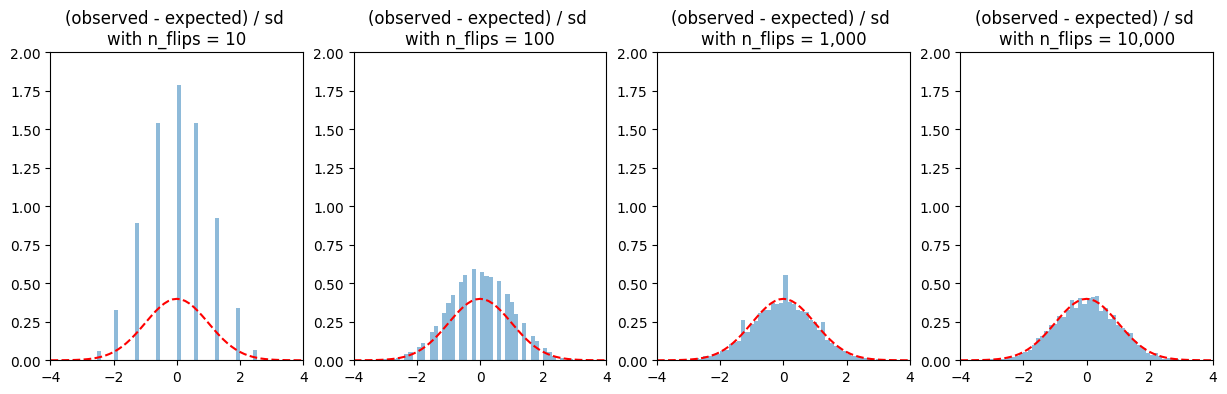

In [26]:
def main():
    p = 0.5
    q = 1 - p
    obj = Coin(p=p)

    num_paths = 10_000 
    num_steps = 10_000 
    seed = 0
    c = obj.run_MC(num_paths=num_paths, num_steps=num_steps, seed=seed)
    cumsum = c.cumsum(axis=1) # number of heads so far

    fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(15,4))
    bins = np.linspace(-4,4,61)
    y = stats.norm().pdf(bins)
    ax0.hist((cumsum[:,10-1]-p*10)/np.sqrt(10*p*q),density=True,alpha=0.5,bins=bins)
    ax1.hist((cumsum[:,100-1]-p*100)/np.sqrt(100*p*q),density=True,alpha=0.5,bins=bins)
    ax2.hist((cumsum[:,1_000-1]-p*1_000)/np.sqrt(1_000*p*q),density=True,alpha=0.5,bins=bins)
    ax3.hist((cumsum[:,10_000-1]-p*10_000)/np.sqrt(10_000*p*q),density=True,alpha=0.5,bins=bins)
    for ax, n_flips in zip((ax0,ax1,ax2,ax3),(10,100,1_000,10_000)):
        ax.set_title("(observed - expected) / sd \nwith n_flips = {:,}".format(n_flips))
        ax.set_xlim(-4,4)
        ax.set_ylim(0,2)
        ax.plot(bins,y,'--r')
    plt.show()

if __name__ == "__main__":
    main()

sum of iid uniform

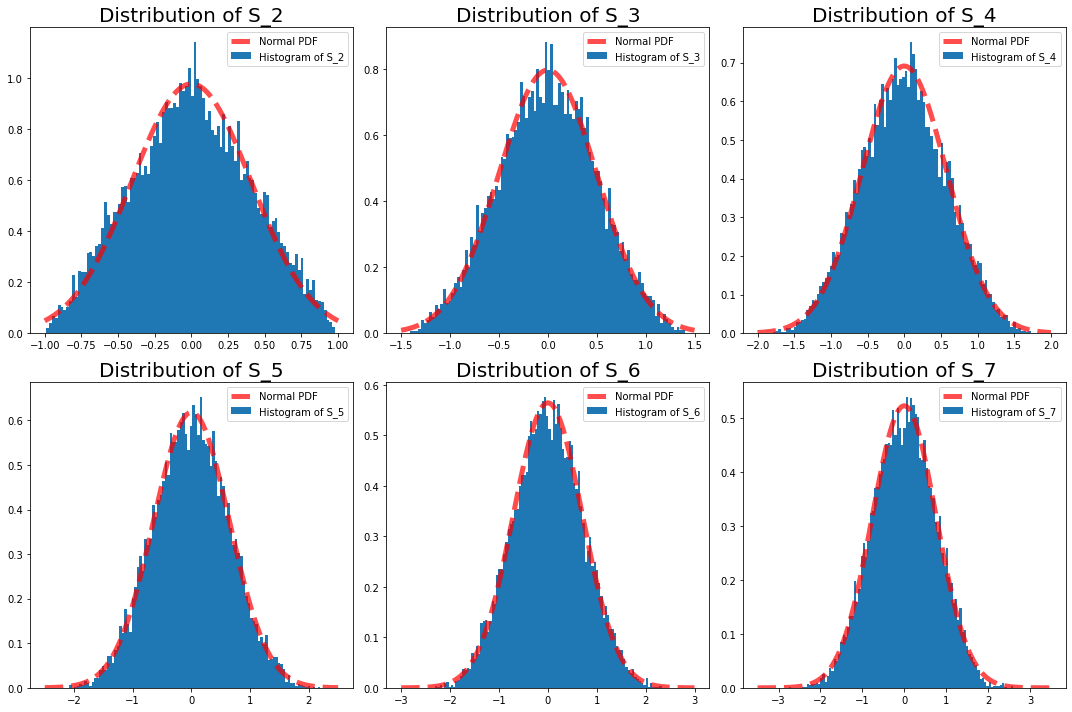

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation):
    x = np.random.uniform(-0.5, 0.5, (num_sumation, num_simulation))
    return np.sum(x, axis=0)


def main():
    num_simulation = 10_000
    
    fig, axes = plt.subplots(2,3,figsize=(15,10))
    
    for num_sumation, ax in enumerate(axes.reshape((-1,)), start=2):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation)
        ax.hist(data, bins=100, density=True, label=f'Histogram of S_{num_sumation}')

        mu = 0
        sigma = np.sqrt(num_sumation) / np.sqrt(12)

        x = np.linspace(-0.5*num_sumation,0.5*num_sumation,1_000)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF', lw=5)
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

sum of iid poisson

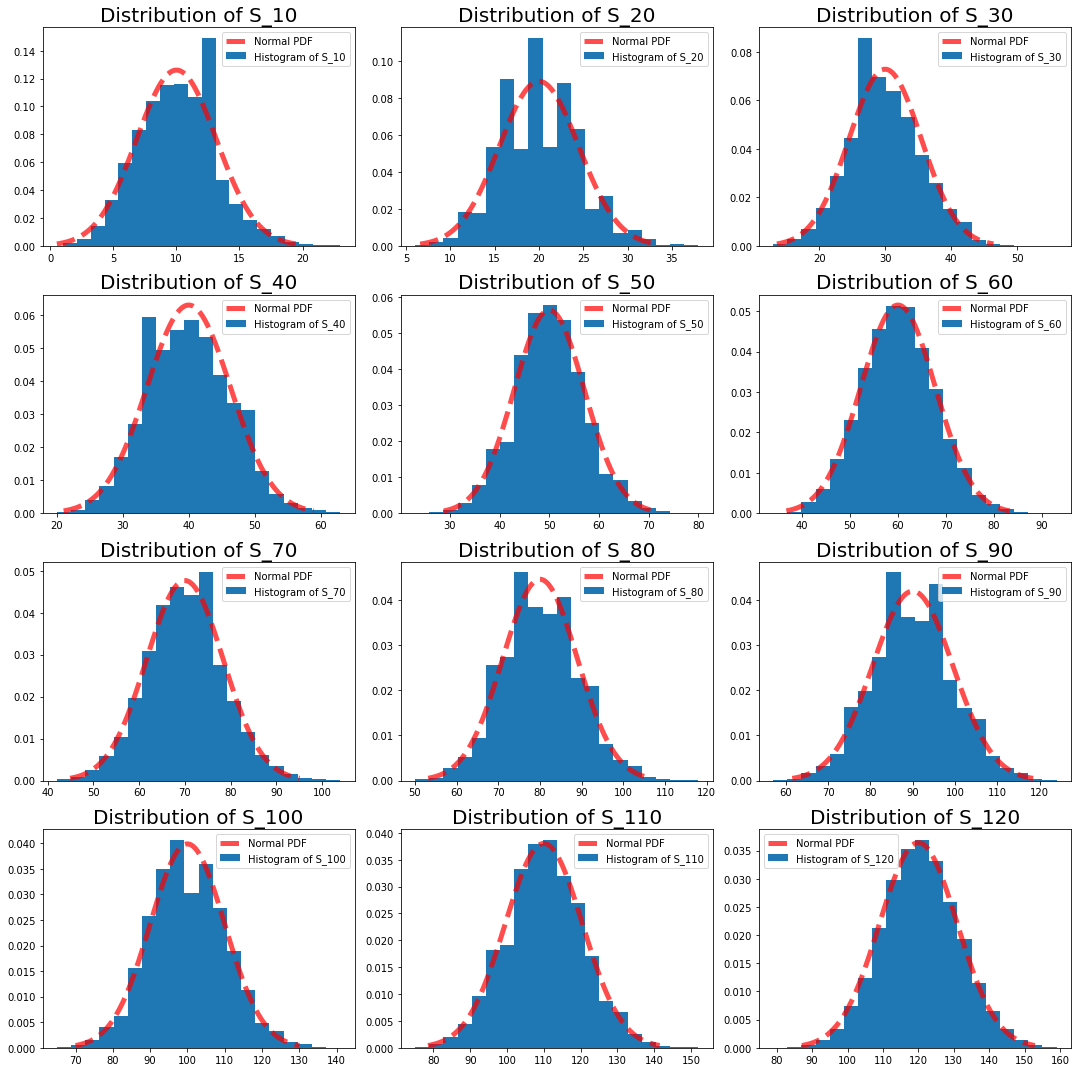

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation, lam=1):
    x = np.random.poisson(lam=lam, size=(num_sumation, num_simulation))
    return np.sum(x, axis=0)


def main():
    lam = 1
    num_sumations = (10,20,30,40,50,60,70,80,90,100,110,120)
    num_simulation = 10_000
    
    fig, axes = plt.subplots(4,3,figsize=(15,15))
    
    for ax, num_sumation in zip(axes.reshape((-1,)), num_sumations):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation, lam=lam)
        ax.hist(data, bins=20, density=True, label=f'Histogram of S_{num_sumation}')

        mu = lam * num_sumation 
        sigma = np.sqrt(mu)

        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1_00)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF', lw=5)
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

sum of iid exponential

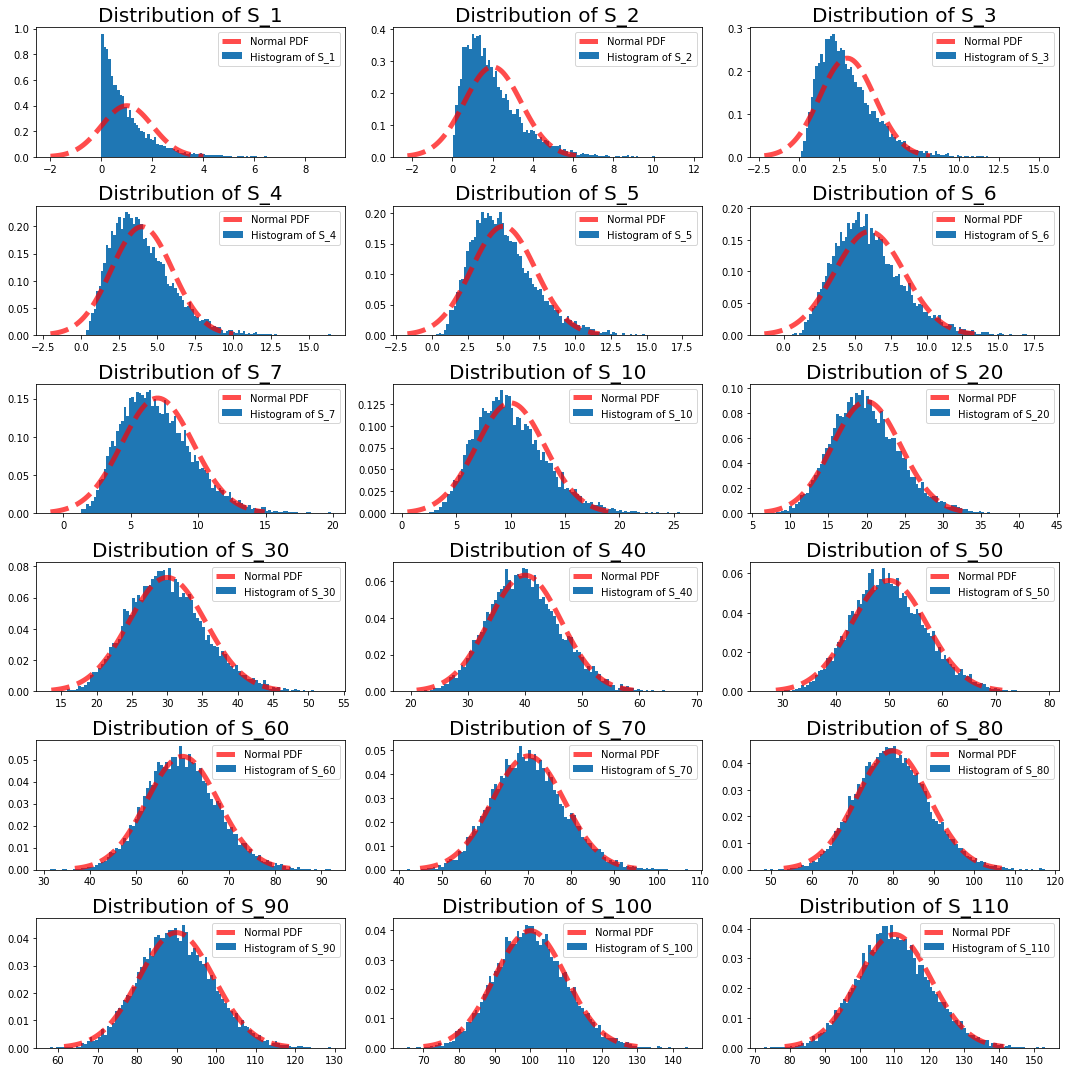

In [ ]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt


def generate_samples(num_sumation, num_simulation, lam=1):
    x = np.random.exponential(scale=1/lam, size=(num_sumation, num_simulation)) # scale=1/lam
    return np.sum(x, axis=0)


def main():
    lam = 1
    num_sumations = (1,2,3,4,5,6,7,10,20,30,40,50,60,70,80,90,100,110)
    num_simulation = 10_000
    
    fig, axes = plt.subplots(6,3,figsize=(15,15))
    
    for ax, num_sumation in zip(axes.reshape((-1,)), num_sumations):
        ax.set_title(f"Distribution of S_{num_sumation}", fontsize=20)
        
        data = generate_samples(num_sumation, num_simulation, lam=lam)
        ax.hist(data, bins=100, density=True, label=f'Histogram of S_{num_sumation}')

        mu = (1/lam) * num_sumation 
        sigma = (1/lam) * np.sqrt(num_sumation)

        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1_00)
        y = np.exp(-(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)
        ax.plot(x, y, '--r', alpha=0.7, label='Normal PDF', lw=5)
        
        ax.legend()
            
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

###### Galton board

<img src="https://thumbs.gfycat.com/ApprehensiveEarnestFlounder.webp">

Source : [FEATURED GALTON GIFS](https://gfycat.com/discover/galton-gifs)

mathematical formulation of galton board

$$
S_n=\sum_{i=1}^n X_i
$$
where
$X_i$ are iid with
$$
X_i=
\left\{
    \begin{array}{ll}
        1&\text{with probability }\ 50\%\\
        -1&\text{with probability }\ 50\%\\
    \end{array}
\right.
$$

$$
EX_i=0,\quad
EX_i^2=1,\quad
Var(X_i)=1
$$

$$
\begin{array}{ccccccccc}\hline
\mbox{Random variable}&\mbox{Mean}&\mbox{Variance}&\mbox{Approximate distribution}\\\hline
Y_i&&&\\
\sum_{i=1}^nX_i&0&n&N(0,n)\\
\frac{\sum_{i=1}^nX_i}{\sqrt{n}}&0&1&N(0,1)\\
\frac{\sum_{i=1}^{nt}X_i}{\sqrt{n}}&0&t&N(0,t)\\
\frac{\sum_{i=ns+1}^{nt}X_i}{\sqrt{n}}&0&t-s&N(t-s)\\\hline
\end{array}
$$




simulation of galton board

[ 0 -1  0 -1 -2 -3 -4 -5 -6 -7 -6 -7 -6]


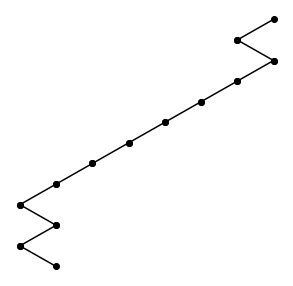

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

seed = 1
np.random.seed(seed)

n_layers = 12
x = np.random.binomial(n=1, p=0.5, size=(n_layers,)) * 2 - 1
s_n = x.cumsum()
s_n = np.concatenate(([0], s_n))
print(s_n)

fig, ax = plt.subplots(figsize=(5,5))
for step, (before, after) in enumerate(zip(s_n[:-1],s_n[1:])):
    ax.plot( (before, after), (-step,-(step+1)), '-ok' )
for spine in ("top","bottom","left",'right'):
    ax.spines[spine].set_visible(False)
ax.set_xticks( () )
ax.set_yticks( () )
plt.show()

###### Example - Number of students in a psychology course







The number of student in a psychology course is a Poisson with mean 100. The professor has decided that if the number is 120 or more, he will divide the class into two separate sections. What is the probability that the class is divided into two separate sections?

exact solution using poisson distribution


With $X\sim Po(\lambda)$, $\lambda=100$,
$$
P(X\ge 120)=\sum_{k=120}^{\infty}\frac{\lambda^k}{k!}e^{-\lambda}=0.0282
$$

approximate solution using normal approximation


With $X=\sum_{i=1}^{100}Y_i\sigma m Po(\lambda)$, $\lambda=100$,
where $Y_i$ are iid $Po(1)$,
\begin{eqnarray}
P(X\ge 120)
&\stackrel{\mbox{Continuity correction}}{=}&P(X\ge 119.5)\nonumber\\
&\stackrel{\mbox{Standardization}}{=}&P\left(\frac{X-\lambda}{\sqrt{\lambda}}\ge \frac{119.5-\lambda}{\sqrt{\lambda}}\right)\nonumber\\
&\stackrel{\mbox{CLT}}{\approx}&P\left(Z\ge \frac{119.5-\lambda}{\sqrt{\lambda}}\right)\nonumber\\
&=&1-N\left(\frac{119.5-\lambda}{\sqrt{\lambda}}\right)
=1-0.9744=0.0256\nonumber
\end{eqnarray}

###### Example - Time for grading





An instructor has 50 exam papers that will be graded in sequence. Time required to grade the 50 exams are iid with mean 20 and standard deviation 4 minutes. Approximate the probability that the instructor will grade at least 25 of the exams in the first 450 minutes of work.

solution

With time $X_k$ to grade the $k^{th}$ exam paper, iid with mean 20 and variance $4^2$
$$
S=\sum_{k=1}^{25}X_k
$$

\begin{eqnarray}
P(S\le 450)
&\stackrel{\mbox{Standardization}}{=}&
P\left(\frac{S-25\cdot 20}{\sqrt{25\cdot 4^2}}\le \frac{450-25\cdot 20}{\sqrt{25\cdot 4^2}}\right)\nonumber\\
&\stackrel{\mbox{CLT}}{\approx}&
P\left(Z\le \frac{450-25\cdot 20}{\sqrt{25\cdot 4^2}}\right)
=N\left(\frac{450-25\cdot 20}{\sqrt{25\cdot 4^2}}\right)
=0.0062\nonumber
\end{eqnarray}

######***Example - Fair coin flips***

We flips a fair coin many times
and let $X_i$ be the $i$-th flip record,
where $H$ and $T$ are recorded as 1 and 0.
Let $Y_i$ be $Y_i=2X_i-1$, i.e.,
the $i$-th flip record
where $H$ and $T$ are recorded as 1 and $-1$.
Calculate the mean, variance, and approximate distribution of related random variables,
i.e., fill up the blank in below table.

$$\begin{array}{|c||c|c|c|c|} \hline
\text{Random variable}&\text{Mean}&\text{Variance}&\text{Approximate distribution}\\\hline\hline  
Y_i&&&-\\\hline
\sum_{i=1}^nY_i&&&\\\hline
\frac{\sum_{i=1}^nY_i}{\sqrt{n}}&&&\\\hline
\frac{\sum_{i=1}^{nt}Y_i}{\sqrt{n}}&&&\\\hline
\frac{\sum_{i=ns+1}^{nt}Y_i}{\sqrt{n}}&&&\\\hline
\end{array}$$

***Solution***

$$
EY_i=0,\quad
EY_i^2=1,\quad
Var(Y_i)=1
$$

$$\begin{array}{|c||c|c|c|c|} \hline
\text{Random variable}&\text{Mean}&\text{Variance}&\text{Approximate distribution}\\\hline\hline   
Y_i&0&1&-\\\hline
\sum_{i=1}^nY_i&0&n&N(0,n)\\\hline
\frac{\sum_{i=1}^nY_i}{\sqrt{n}}&0&1&N(0,1)\\\hline
\frac{\sum_{i=1}^{nt}Y_i}{\sqrt{n}}&0&t&N(0,t)\\\hline
\frac{\sum_{i=ns+1}^{nt}Y_i}{\sqrt{n}}&0&t-s&N(0,t-s)\\\hline
\end{array}$$





###***Chapter 14 Distributions Related to CLT***

####***Section 1 Chi-Square Distribution $\chi^2_d$***

***Recall - Properties of Gamma Distribution $\Gamma(\alpha,\lambda)$***

$$\begin{array}{lll}
(1)&&Exp(\lambda)\stackrel{d}{=}\Gamma(1,\lambda)\\
(2)&&Exp(\lambda)\mathbin{*}Exp(\lambda)\stackrel{d}{=}\Gamma(2,\lambda)\\
(3)&&Exp(\lambda)\mathbin{*}Exp(\lambda)\mathbin{*}\cdots \mathbin{*}Exp(\lambda)\stackrel{d}{=}\Gamma(n,\lambda)\\
(4)&&\Gamma(\alpha,\lambda)\mathbin{*}\Gamma(\beta,\lambda)\stackrel{d}{=}\Gamma(\alpha+\beta,\lambda)
\end{array}$$

***Definition***

$$
\sum_{i=1}^dZ_i^2\sim\chi^2_d\quad\quad\quad\quad\text{where$\quad$ $Z_i\quad$ IID $\quad N(0,1^2)$}
$$

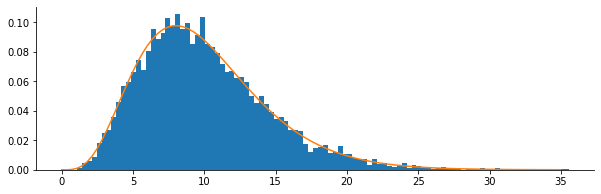

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


def main():
    df = 10
    n_samples = 10_000
    
    normal_samples = np.random.normal(size=(n_samples, df)) # (10000, 5)
    chi_square_samples = np.sum(normal_samples**2, axis=1) # (10000,)
    
    fig, ax = plt.subplots(figsize=(10,3))
    
    ax.hist(chi_square_samples, bins=100, density=True)
    
    x = np.linspace(0, 35, 100)
    y = stats.chi2(df).pdf(x)
    ax.plot(x, y)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.show()
    
    
if __name__ == "__main__":
    main()

***Properties of Chi-Square Distribution $\chi^2_d$***

$$\begin{array}{lll}
(1)&&\chi^2_1\stackrel{d}{=}Z_1^2\stackrel{d}{=}\Gamma\left(\frac{1}{2},\frac{1}{2}\right)\\
(2)&&\chi^2_d\stackrel{d}{=}Z_1^2+\cdots+Z_d^2\stackrel{d}{=}
\Gamma\left(\frac{1}{2},\frac{1}{2}\right)\mathbin{*}\cdots\mathbin{*}\Gamma\left(\frac{1}{2},\frac{1}{2}\right)
\stackrel{d}{=}
\Gamma\left(\frac{d}{2},\frac{1}{2}\right)\\
(3)&&\phi_{\chi^2_d}(t)=\left(\frac{1}{\sqrt{1-2t}}\right)^d
\end{array}$$

***Proof***

For $x>0$
$$\begin{array}{lll}
P(Z_1^2\le x)
=P(-\sqrt{x}\le Z_1\le \sqrt{x})
=\int_{-\sqrt{x}}^{\sqrt{x}}\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
=2\int_{0}^{\sqrt{x}}\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
\end{array}$$
$$\begin{array}{llll}
&\Rightarrow&\displaystyle
f_{Z_1^2}(x)=2\frac{1}{\sqrt{2\pi}}e^{-\frac{x}{2}}\frac{1}{2}x^{-1/2}
=\frac{\frac{1}{2}\left(\frac{1}{2}x\right)^{\frac{1}{2}-1}e^{-\frac{1}{2}x}}{\Gamma(\frac{1}{2})}
=f_{\Gamma\left(\frac{1}{2},\frac{1}{2}\right)}(x)\\
\\
&\Rightarrow&\displaystyle
(1)\ \ \chi^2_1\stackrel{d}{=}Z_1^2\stackrel{d}{=}\Gamma\left(\frac{1}{2},\frac{1}{2}\right)
\end{array}$$

By the property (4) of Gamma distribution
$$\begin{array}{lll}
(2)&&\chi^2_d\stackrel{d}{=}Z_1^2+\cdots+Z_d^2\stackrel{d}{=}
\Gamma\left(\frac{1}{2},\frac{1}{2}\right)\mathbin{*}\cdots\mathbin{*}\Gamma\left(\frac{1}{2},\frac{1}{2}\right)
\stackrel{d}{=}
\Gamma\left(\frac{d}{2},\frac{1}{2}\right)
\end{array}$$


With $\lambda=\frac{1}{2}-t$
$$\begin{array}{lll}
(3)\ \ 
\phi_{\chi^2_d}(t)
&=&
\int_0^{\infty}e^{tx}\frac{\frac{1}{2}\left(\frac{1}{2}x\right)^{\frac{d}{2}-1}e^{-\frac{1}{2}x}}{\Gamma(\frac{d}{2})}dx\\
&=&
\int_0^{\infty}\frac{\frac{1}{2}\left(\frac{1}{2}x\right)^{\frac{d}{2}-1}e^{-{\color{red}(\frac{1}{2}-t)}x}}{\Gamma(\frac{d}{2})}dx
\\
&=&
\left(\frac{1}{\sqrt{1-2t}}\right)^d
\int_0^{\infty}\underbrace{\frac{\lambda\left(\lambda x\right)^{\frac{d}{2}-1}e^{-\lambda x}}{\Gamma(\frac{d}{2})}}_{\text{PDF of $\Gamma(\frac{d}{2},\lambda)$}}dx
=\left(\frac{1}{\sqrt{1-2t}}\right)^d
\end{array}$$

***Mean and Variance***

$$\begin{array}{|c||c|c|} \hline
&\text{mean}&\text{variance}\\
\hline \hline
Geo(p)&\frac{1}{p}&\frac{q}{p^2}\\\hline
\frac{1}{n}Geo(p)&\frac{1}{np}&\frac{q}{(np)^2}\\\hline
Exp(\lambda)=\Gamma(1,\lambda)&\frac{1}{\lambda}&\frac{1}{\lambda^2}\\\hline
\Gamma(n,\lambda)&\frac{n}{\lambda}&\frac{n}{\lambda^2}\\\hline
\Gamma(\alpha,\lambda)&\frac{\alpha}{\lambda}&\frac{\alpha}{\lambda^2}\\\hline
\chi^2_1=\Gamma(\frac{1}{2},\frac{1}{2})&\frac{\frac{1}{2}}{\frac{1}{2}}=1& \frac{\frac{1}{2}}{(\frac{1}{2})^2}=2\\\hline
\chi^2_d=\Gamma(\frac{d}{2},\frac{1}{2})&d&2d\\\hline
\end{array}$$

***Simulation of Chi Square Random Variables***

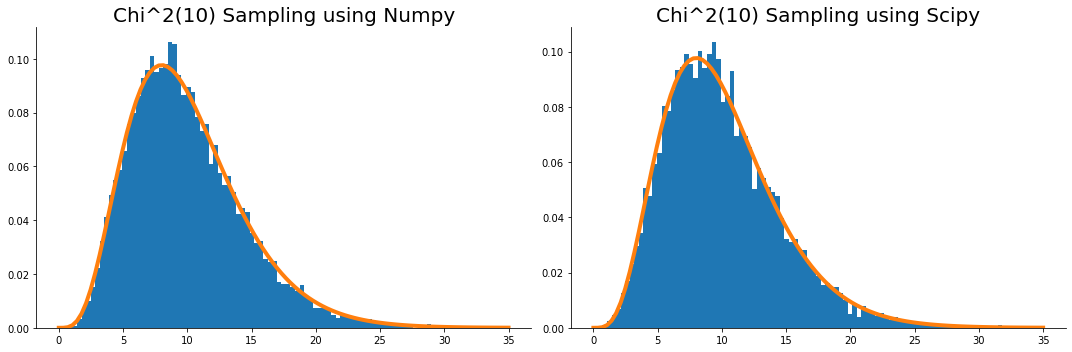

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import special
from scipy import stats


def main():
    sample_size = 10_000
    df = 10
    df_ = df / 2
    const = (1/2)**df_ / special.gamma(df_) 

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
    ax0.set_title(f"Chi^2({df}) Sampling using Numpy", fontsize=20)
    
    x = np.random.chisquare(df, size=(sample_size,))
    x_fig = np.linspace(0,35,100)
    y_fig = const * x_fig**( df_ - 1 ) * np.exp( - x_fig / 2 )
    
    ax0.hist(x, density=True, bins=x_fig)
    ax0.plot(x_fig, y_fig, linewidth=4)
    
    ax1.set_title(f"Chi^2({df}) Sampling using Scipy", fontsize=20)
    
    x = stats.chi2(df).rvs(size=10_000)
    #x_fig = np.linspace(0,35,100)
    y_fig = stats.chi2(df).pdf(x_fig)
    
    ax1.hist(x, density=True, bins=x_fig)
    ax1.plot(x_fig, y_fig, linewidth=4)
    
    for ax in (ax0, ax1):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

        
if __name__ == "__main__":
    main()

####***Section 2 Student $t$ Distribution $t_d$***

***Definition***

$$
\frac{Z}{\sqrt{\frac{V}{d}}}\sim t_d\quad\quad\quad\quad\text{where$\quad$ $Z\sim N(0,1^2)$ and
$V\sim\chi^2_d$ are independent}
$$

***PDF***

$$
f_{T}(t)
\quad=\quad
\frac{1}{\sqrt{d}B\left(\frac{1}{2},\frac{d}{2}\right)}\left(1+\frac{t^2}{d}\right)^{-\frac{d+1}{2}}
$$

***Proof***

With $t=\frac{z}{\sqrt{\frac{v}{d}}}$ 
and $u=v$, 
where $Z\sim N(0,1^2)$ and $V\sim\chi^2_d$ are independent,
$$
\left|\frac{\partial (z,v)}{\partial (t,u)}\right|
=
\left|\frac{\partial (t,u)}{\partial (z,v)}\right|^{-1}
=
\left|det\left(\begin{array}{cc}\frac{1}{\sqrt{\frac{v}{d}}}&*\\0&1\end{array}\right)\right|^{-1}
=\sqrt{\frac{v}{d}}
$$

With $\lambda=\frac{1+\frac{t^2}{d}}{2}$,

$$\begin{array}{lll}
f_{T,U}(t,u)
&=&
f_{Z,V}(z,v)\left|\frac{\partial (z,v)}{\partial (t,u)}\right|\\
&=&
\frac{\frac{1}{2}(\frac{1}{2}v)^{\frac{d}{2}-1}}{\sqrt{2\pi}\Gamma(\frac{d}{2})}e^{-\frac{z^2}{2}}e^{-\frac{1}{2}v}\sqrt{\frac{v}{d}}\\
&=&
\frac{\frac{1}{2}(\frac{1}{2}u)^{\frac{d}{2}-1}}{\sqrt{2\pi}\Gamma(\frac{d}{2})}e^{-\frac{1+\frac{t^2}{d}}{2}}u\sqrt{\frac{u}{d}}
%=\frac{\frac{1}{2}(\frac{1}{2}u)^{\frac{r}{2}-1}}{\sqrt{2\pi}\Gamma(\frac{d}{2})}e^{-\lambdau}\sqrt{\frac{u}{r}}
\\
&=&
\frac{1}{\sqrt{d}B\left(\frac{1}{2},\frac{d}{2}\right)}\left(1+\frac{t^2}{d}\right)^{-\frac{d+1}{2}}
\quad\cdot\quad
\underbrace{\left[\frac{\lambda \left(\lambda u\right)^{\frac{d+1}{2}-1}e^{-\lambda u}}{\Gamma(\frac{r+1}{2})}\right]}_{\text{$U|T=t)$ is $Gamma(\frac{d+1}{2},\lambda)$}}
\end{array}$$

$$
\Rightarrow\quad
f_{T}(t)
\quad=\quad
\frac{1}{\sqrt{d}B\left(\frac{1}{2},\frac{d}{2}\right)}\left(1+\frac{t^2}{d}\right)^{-\frac{d+1}{2}}
$$

***Mean and Variance***

$$\begin{array}{llllll}
\text{Mean}&&0&&\text{for $d>1$}\\
\text{Variance}&&\displaystyle \frac{d}{d-2}&&\text{for $d>2$}\\
\end{array}$$



***Related Distribution - Cauchy Distribution ($d=1$)***

$$
f(x)\propto\frac{1}{1+x^2}
\ \ \Rightarrow\ \ 
f(x)
=
\frac{1}{\pi}\cdot\frac{1}{1+x^2}
$$

***Student t Distribution has a Fat Tail***

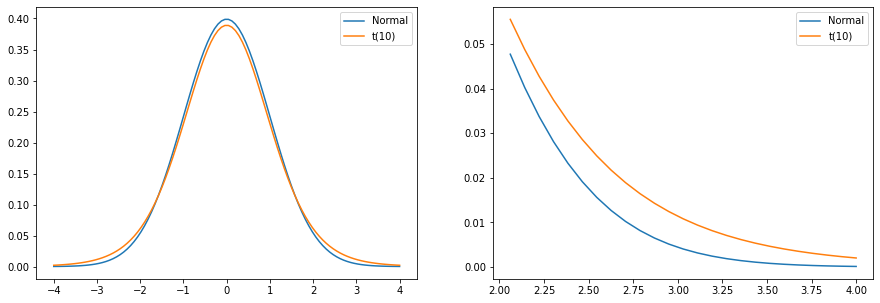

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special, stats

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(15,5))
    
x = np.linspace(-4,4,100)
pdf_normal = stats.norm().pdf(x)
pdf_t = stats.t(df=10).pdf(x)
    
ax0.plot(x, pdf_normal, label='Normal')
ax0.plot(x, pdf_t, label='t(10)')
    
ax1.plot(x[-25:], pdf_normal[-25:], label='Normal')
ax1.plot(x[-25:], pdf_t[-25:], label='t(10)')
    
for ax in (ax0, ax1):
    ax.legend()
plt.show()

***Why Chi-Square and Student $t$***

For $n$ iid samples $X_i$ from $N(\mu,\sigma^2)$,
let $\bar{X}$ and $S^2$
be 
the sample mean and variance:
$$
\bar{X}=\frac{\sum_{i=1}^nX_i}{n}\ \ \ \ \ \text{and}\ \ \ \ \ 
S^2=\frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-1}
$$
Then,
$$\begin{array}{lll}
(1)&&\text{$\bar{X}$ and $S^2$ are independent}\\
(2)&&\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}\stackrel{d}{=}N(0,1^2)\ \ \ \ \ \text{and}\ \ \ \ \ \frac{(n-1)S^2}{\sigma^2}=\sum_{i=1}^n\left(\frac{X_i-\bar{X}}{\sigma}\right)^2\stackrel{d}{=}\chi^2_{n-1}\\
(3)&&\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}=\frac{\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}}{\sqrt{\frac{\frac{(n-1)S^2}{\sigma^2}}{n-1}}}
\stackrel{(2)}{=}\frac{N(0,1)}{\sqrt{\frac{\chi^2_{n-1}}{n-1}}}\stackrel{(1)}{=}t_{n-1}
\end{array}$$



***Recall - Multivariate Normal ${\bf x}\sim N(\mu,\Sigma)$***

$$\begin{array}{lllll}
(1)&\text{$\mu$ and $\Sigma$ completely determine the multivariate normal distribution}\\
(2)&\text{If off diagonals of $\Sigma$ are all 0, then all the components of ${\bf x}$ are independent}\\
(3)&\text{If for fixed $i$, $\Sigma_{ij}=0$ for all $j\neq i$, then ${\bf x}_i$ is independent to ${\bf x}_j$, $j\neq i$}\\
\end{array}$$

***Proof***

(1)
$$\begin{array}{lll}
Cov(\bar X,X_i-\bar X)
&=&Cov(\bar X,X_i)-Cov(\bar X,\bar X)\\
&=&Cov\left(\frac{\sum_{j=1}^nX_j}{n},X_i\right)-Cov\left(\frac{\sum_{j=1}^nX_j}{n},\frac{\sum_{k=1}^nX_k}{n}\right)\\
&=&\frac{1}{n}\cdot\sigma^2-\frac{1}{n^2}\cdot n\sigma^2=0
\end{array}$$

So, by the property of the multivariate normal distribution

$$\begin{array}{lll}
&&
\text{$\bar X, X_1-\bar X, X_2-\bar X,\cdots, X_n-\bar X$ are multivariate normal}\\
&\Rightarrow&
\text{Since %by the lemma 
$Cov(\bar X,X_i-\bar X)=0$,
$\bar X$ and $X_1-\bar X,\cdots, X_n-\bar X$ are independent}\\
&\Rightarrow&
\text{$\bar X$ and $S^2$ are independent}
\end{array}$$

(2)

$$\begin{array}{lll}
\sum_{i=1}^n(X_i-\mu)^2
&=&\sum_{i=1}^n((X_i-\bar X)+(\bar X-\mu))^2\\
&=&\sum_{i=1}^n(X_i-\bar X)^2+n(\bar X-\mu)^2+2(\bar X-\mu)\sum_{i=1}^n(X_i-\bar X)\\
&=&\sum_{i=1}^n(X_i-\bar X)^2+n(\bar X-\mu)^2
\end{array}$$


$$\begin{array}{lcl}
&&
\underbrace{\sum_{i=1}^n\left(\frac{X_i-\mu}{\sigma}\right)^2}_{\chi^2_n}
\quad=\quad
\sum_{i=1}^n\left(\frac{X_i-\bar X}{\sigma}\right)^2
\quad+\quad
\underbrace{\left(\frac{\bar X-\mu}{\frac{\sigma}{\sqrt{n}}}\right)^2}_{\chi^2_1}\\
\\
&\stackrel{\text{Consequence of key fact}}{\Rightarrow}&
\left(\frac{1}{\sqrt{1-2t}}\right)^n
\quad=\quad
\phi_{\sum_{i=1}^n\left(\frac{X_i-\bar X}{\sigma}\right)^2}(t)
\quad\cdot\quad
\left(\frac{1}{\sqrt{1-2t}}\right)\\
\\
&\Rightarrow&
\phi_{\sum_{i=1}^n\left(\frac{X_i-\bar X}{\sigma}\right)^2}(t)
\quad=\quad
\left(\frac{1}{\sqrt{1-2t}}\right)^{n-1}\\
\\
&\Rightarrow&
\sum_{i=1}^n\left(\frac{X_i-\bar X}{\sigma}\right)^2
\quad\sim\quad
\chi^2_{n-1}
\end{array}$$

(3) follows from (1) and (2).

####***Section 3 $F$ Distribution $F_{d_1,d_2}$***

***Definition***

$$
\frac{V_1/d_1}{V_2/d_2}\quad\quad\quad\quad\text{where$\quad$ $V_1\sim\chi^2_{d_1}$ and
$V_2\sim\chi^2_{d_2}$ independent}
$$

***PDF***

$$
f_{F}({\color{red}x})
\quad
=
\quad
\frac{1}{B\left(\frac{d_1}{2},\frac{d_2}{2}\right){\color{red}x}}
\quad
\cdot
\quad
\sqrt{\frac{(d_1{\color{red}x})^{d_1}\cdot d_2^{d_2}}{(d_1{\color{red}x}+d_2)^{d_1+d_2}}}
\quad\quad\quad\quad 
\text{for ${\color{red}x}>0$}
$$

***Proof***

With $f=\frac{x/d_1}{y/d_2}$ and $z=y$,
where $X\sim \chi^2_{d_1}$ and $Y\sim \chi^2_{d_2}$ are independent,
%With $f=\frac{\frac{x}{r_1}}{\frac{y}{r_2}}$ and $z=y$, the Jacobian is given by
$$
\left|\frac{\partial (x,y)}{\partial (f,z)}\right|
=
\left|\frac{\partial (f,z)}{\partial (x,y)}\right|^{-1}
=
\left|det\left(\begin{array}{cc}\frac{1/d_1}{z/d_2}&\mathbin{*}\\0&1\end{array}\right)\right|^{-1}
=\frac{z/d_2}{1/d_1}
$$



With ${\color{red}\lambda}=\frac{1}{2} (1+\frac{d_1}{d_2}{\color{red}f})$
$$\begin{array}{lll}
f_{F,Z}(f,z)
&=&
f_{X,Y}(x,y)\left|\frac{\partial (x,y)}{\partial (f,z)}\right|\\
&=&
\frac{
    \frac{1}{2}\left(\frac{1}{2} x\right)^{\frac{d_1}{2}-1} e^{-\frac{1}{2} x}
}{
    \Gamma\left(\frac{d_1}{2}\right)
}
\cdot
\frac{
    \frac{1}{2}\left(\frac{1}{2} y\right)^{\frac{d_2}{2}-1} e^{-\frac{1}{2} y}
}{
    \Gamma\left(\frac{d_2}{2}\right)
}
\cdot
\frac{z/d_2}{1/d_1}\\
&=&
\frac{
    \frac{1}{2}\left(f\frac{d_1}{d_2}\right)^{\frac{d_1}{2}-1}
}{
    \Gamma\left(\frac{d_1}{2}\right)
}
\cdot
\frac{
    \left(\frac{1}{2} z\right)^{\frac{d_1+d_2}{2}-1} e^{-\frac{1}{2}(1+\frac{d_1}{d_2}f)z}
}{
    \Gamma\left(\frac{d_2}{2}\right)
}
\cdot
\frac{1/d_2}{1/d_1}\\
&=&
\frac{1}{B\left(\frac{d_1}{2},\frac{d_2}{2}\right) f}
\quad
\cdot
\quad
\sqrt{\frac{\left(d_1f\right)^{d_1}\cdot d_2^{d_2}}{(d_1f+d_2)^{d_1+d_2}}}
\quad
\cdot
\quad
\underbrace{\left[
\frac{\lambda\left(\lambda z\right)^{\frac{d_1+d_2}{2}-1}e^{-\lambda z}}{\Gamma\left(\frac{d_1+d_2}{2}\right)}
\right]}_{\text{$Z|F=f)$ is $Gamma(\frac{d_1+d_2}{2},\lambda)$}}
\end{array}$$



$$
\Rightarrow\quad
f_{F}(f)
\quad
=
\quad
\frac{1}{B\left(\frac{d_1}{2},\frac{d_2}{2}\right) f}
\quad
\cdot
\quad
\sqrt{\frac{\left(d_1f\right)^{d_1}\cdot d_2^{d_2}}{(d_1f+d_2)^{d_1+d_2}}}
\quad\quad\quad\quad 
\text{for $f>0$}
$$



####***Section 4 Log-Normal Distribution $Log-N(\mu,\sigma^2)$***

######***Definition of Log-Normal Distribution $Log-N(\mu,\sigma^2)$***

***Definition***

$$
X=e^Y\sim Log-N(\mu,\sigma^2)
\quad\Leftrightarrow\quad
Y\sim N(\mu,\sigma^2)
$$

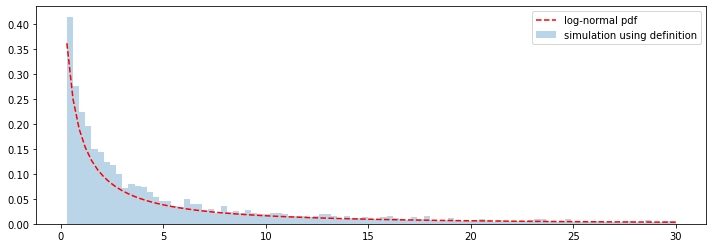

In [ ]:
#@title Simulation using Definition
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

# normal sampling from package
mu = 1
sigma = 2
n_samples = 10_000
y = stats.norm(loc=mu,scale=sigma).rvs(size=(n_samples,))

# log-normal sampling using definition
x = np.exp(y)

fig, ax = plt.subplots(figsize=(12,4))

# histogram of x, log-normal sampling
x_lim = 30
bins = np.linspace(0,x_lim,101)[1:]
ax.hist(x,bins=bins,density=True,alpha=0.3,label="simulation using definition")

# plot of log-normal pdf
# for parameter setting for the log-normal distribution, see
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
s = sigma
scale = np.exp(mu)
pdf = stats.lognorm(s=s,scale=scale).pdf(bins)
ax.plot(bins,pdf,"--r",label="log-normal pdf")

ax.legend()

plt.show()

######***PDF of Log-Normal Distribution $Log-N(\mu,\sigma^2)$***

***PDF***

$$
\displaystyle \frac{1}{x\sqrt{2\pi\sigma^2}}e^{-\frac{(\log x-\mu)^2}{2\sigma^2}}\quad\text{for $x>0$}
$$

***Proof***

$$
\displaystyle 
f_Y(y)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y-\mu)^2}{2\sigma^2}}\ \ \Rightarrow\ \
f_X(x)=f_Y(y)\left|\frac{d y}{d x}\right|
=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(\log x-\mu)^2}{2\sigma^2}}\cdot\frac{1}{x}\quad\text{for $x>0$}
$$

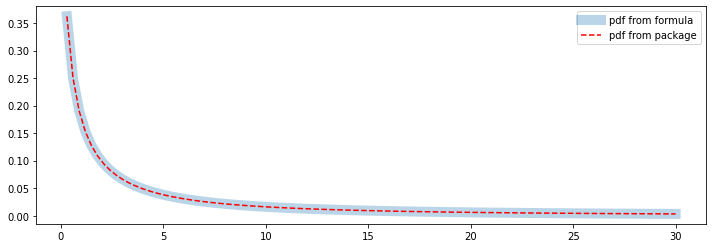

In [ ]:
#@title PDF using Definition vs PDF using Package
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

# range to plot pdf
x_lim = 30
x = np.linspace(0,x_lim,101)[1:]

# pdf from formula
mu = 1
sigma = 2
pdf0 = np.exp(-(np.log(x)-mu)**2 / (2*sigma**2)) / (x*np.sqrt(2*np.pi*sigma**2))

# pdf from package
# for parameter setting for the log-normal distribution, see
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
s = sigma
scale = np.exp(mu)
pdf1 = stats.lognorm(s=s,scale=scale).pdf(x)

fig, ax = plt.subplots(figsize=(12,4))

# plot of pdf from formula
ax.plot(x,pdf0,lw=10,alpha=0.3,label="pdf from formula")

# plot of pdf from package
ax.plot(x,pdf1,"--r",label="pdf from package")
ax.legend()
plt.show()

######***Mean and Variance of Log-Normal Distribution $Log-N(\mu,\sigma^2)$***

***Mean and Variance***

$$
\begin{array}{llll}
\text{Mean}&&\displaystyle e^{\mu+\frac{1}{2}\sigma^2}\\
\text{Variance}&&\displaystyle \left(e^{\sigma^2}-1\right)e^{2\mu+\sigma^2}
\end{array}
$$

In [ ]:
#@title Mean and Variance from Formula vs Simulation
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats

# log-normal sampling from package
# for parameter setting for the log-normal distribution, see
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
mu = 1
sigma = 2
n_samples = 1_000_000
s = sigma
scale = np.exp(mu)
x = stats.lognorm(s=s,scale=scale).rvs(size=(n_samples,))

print(f"number of samples : {n_samples:,}",end="\n\n")

print(f"mean from fomular  : {np.exp(mu+0.5*sigma**2)}")
print(f"mean from sampling : {x.mean()}",end="\n\n")

print(f"variance from fomular  : {(np.exp(sigma**2)-1)*np.exp(2*mu+sigma**2)}")
print(f"variance from sampling : {x.var()}")

number of samples : 1,000,000

mean from fomular  : 20.085536923187668
mean from sampling : 20.10520622209681

variance from fomular  : 21623.03700131398
variance from sampling : 17914.870803356687


###***Chapter 15 Tail Bound***

###### ***Tail Bound***

$$\begin{array}{ll}
\mbox{[Markov's inequality]}&\displaystyle\quad \mathbb{P}(|X|\ge \varepsilon)\le \frac{\mathbb{E}|X|}{\varepsilon}\\
\\
\mbox{[Chebyshev's inequality]}&\displaystyle\quad \mathbb{P}(|X-EX|\ge \varepsilon)\le\frac{Var(X)}{\varepsilon^2}\\
\\
\mbox{[One-sided Chebyshev's inequality]}&\displaystyle\quad \mathbb{P}(X-\mathbb{E}X\ge\ \  \varepsilon)\le\frac{Var(X)}{\varepsilon^2+Var(X)}\\
\\
&\displaystyle\quad \mathbb{P}(X-\mathbb{E}X\le -\varepsilon)\le\frac{Var(X)}{\varepsilon^2+Var(X)}\\
\\
\mbox{[Chernoff's bound]}&\displaystyle\quad \mathbb{P}(X\ge \varepsilon)\le \mbox{min}_{t>0}\frac{\mathbb{E}e^{t X}}{e^{t\varepsilon}}\\
\end{array}$$

***Proof***

For any $\varepsilon>0$ and $b>0$

\begin{eqnarray}
\displaystyle 
X-\mathbb{E}X\ge \varepsilon
&\Leftrightarrow&\displaystyle X-\mathbb{E}X+b\ge \varepsilon+b\nonumber\\
&\Rightarrow&\displaystyle (X-\mathbb{E}X+b)^2\ge (\varepsilon+b)^2\nonumber
\end{eqnarray}

Hence, by Markov's inequality with $b=\frac{\sigma^2}{\varepsilon}$

$$
\displaystyle 
\mathbb{P}(X-\mathbb{E}X\ge \varepsilon)
\le \frac{\mathbb{E}(X-\mathbb{E}X+b)^2}{(\varepsilon+b)^2}
= \frac{\sigma^2+b^2}{(\varepsilon+b)^2}
= \frac{\sigma^2}{\varepsilon^2+\sigma^2}
$$

###### ***Example - $B(1000,0.01)$***



\begin{array}{cccccc}\hline
B(1000,0.01)&\mbox{Markov}&\mbox{Chebyshev}&\mbox{one-sided Chebyshev}&\mbox{Chernoff}&\mbox{CLT approximation}\\\hline
\mathbb{P}(X\ge 20)&0.5&0.0990&0.0901&0.0210&7.4094\times10^{-4}\\
\mathbb{P}(X\ge 100)&0.1&0.0012&0.0012&1.2204\times10^{-61}&0\\\hline
\end{array}

$$
\displaystyle 
\mathbb{E}X=np=10,\quad
Var(X)=npq=9.9
$$

$$
\begin{array}{llllllll}
\mbox{[Markov]}&&
\displaystyle \mathbb{P}(X\ge 20)&\le&\displaystyle\frac{\mathbb{E}X}{20}=\frac{10}{20}=0.5\nonumber\\
\mbox{[Chebyshev]}&&
\displaystyle \mathbb{P}(X\ge 20)&\displaystyle\le&\displaystyle \mathbb{P}(|X-\mathbb{E}X|\ge 10)\le \frac{Var(X)}{10^2}=\frac{9.9}{10^2}=0.0990\nonumber\\
\mbox{[One-sided Chebyshev]}&&
\displaystyle \mathbb{P}(X\ge 20)&\le&\displaystyle\frac{Var(X)}{10^2+Var(X)}=\frac{9.9}{10^2+9.9}=0.0901\nonumber
\end{array}
$$

To calculate Chernoff's bound we need the MGF of $X$.
Let $X$ be $X=\sum_{i=1}^{n}X_i$, where $X_i$ be iid $B(p)$.
Then, we have the following upper bound of the MGF of $X$;

$$
\displaystyle 
\mathbb{E}e^{t X}=\left(\mathbb{E}e^{t X_1}\right)^n=(e^t\cdot p+1\cdot(1-p))^n
=(1+p(e^t-1))^n
\le(e^{p(e^t-1)})^n
=e^{np(e^t-1)}
$$

So, with $t$ such that $e^t=2$

$$
\displaystyle 
\mbox{[Chernoff]}\quad
\mathbb{P}(X\ge 20)\le\mbox{min}_{t>0}\frac{\mathbb{E}e^{t X}}{e^{20t}}\le\mbox{min}_{t>0}\frac{e^{10 (e^t-1)}}{e^{20t}}
\le \frac{e^{10 (2-1)}}{e^{20\log 2}}=0.0210$$


We can also use the CLT approximation.

$$
\displaystyle 
\mathbb{P}(X\ge 20)
=\mathbb{P}\left(\frac{X-10}{\sqrt{9.9}}\ge \frac{20-10}{\sqrt{9.9}}\right)
\approx N\left(-\frac{20-10}{\sqrt{9.9}}\right)
=7.4094\times 10^{-4}
$$

###### ***Example - $Po(100)$***



\begin{array}{cccccc}\hline
Po(100)&\mbox{Markov}&\mbox{Chebyshev}&\mbox{one-sided Chebyshev}&\mbox{Chernoff}&\mbox{CLT approximation}\\\hline
\mathbb{P}(X\ge 200)&0.5&0.0100&0.0099&1.6728\times 10^{-17}&7.6199\times 10^{-24}\\
\mathbb{P}(X\ge 110)&0.9091&1&0.5&0.6162&0.1587\\\hline
\end{array}

$$
\displaystyle 
\mathbb{E}X=\lambda=100,\quad
Var(X)=\lambda=100
$$

$$
\begin{array}{llllll}
\mbox{[Markov]}&&
\displaystyle \mathbb{P}(X\ge 200)&\le&\displaystyle\frac{\mathbb{E}X}{200}=\frac{100}{200}=0.5\nonumber\\
\mbox{[Chebyshev]}&&
\displaystyle \mathbb{P}(X\ge 200)&\le&\displaystyle\mathbb{P}(|X-\mathbb{E}X|\ge 100)\le \frac{Var(X)}{100^2}=0.0100\nonumber\\
\mbox{[One-sided Chebyshev]}&&
\displaystyle \mathbb{P}(X\ge 200)&\le&\displaystyle\frac{Var(X)}{100^2+Var(X)}=\frac{9.9}{10^2+9.9}=0.0099\nonumber
\end{array}
$$

To calculate Chernoff's bound we need the MGF of $X$. With $\lambda=100$

$$
\displaystyle 
\mathbb{E}e^{t X}
=\sum_{k=0}^{\infty}e^{tk}e^{-\lambda}\frac{\lambda^k}{k!}
=e^{-\lambda}\sum_{k=0}^{\infty}\frac{(\lambda e^t)^k}{k!}
=e^{-\lambda}e^{\lambda e^t}
=
e^{\lambda(e^t-1)}
$$

So, with $t$ such that $e^t=2$

$$
\displaystyle 
\mbox{[Chernoff]}\quad
\mathbb{P}(X\ge 200)\le\mbox{min}_{t>0}\frac{\mathbb{E}e^{t X}}{e^{200t}}\le\mbox{min}_{t>0}\frac{e^{\lambda(e^t-1)}}{e^{200t}}
\le \frac{e^{100}}{e^{200\log 2}}=1.6728\times 10^{-17}$$

We can also use the CLT approximation.

$$
\displaystyle 
\mathbb{P}(X\ge 200)
=\mathbb{P}\left(\frac{X-100}{\sqrt{100}}\ge 10\right)
\approx 
 N\left(-10\right)
=7.6199\times 10^{-24}
$$

###***Chapter 16 Law of Large Numbers***

####***Section 1 Law of Large Numbers***

***Law of Large Numbers***

For iid $X_k$ with mean $\mu$

$$
\frac{\sum_{k=1}^nX_k}{n}\approx\mu
$$

There are two different approximation senses. According to these two other approximation senses, there are two laws of large numbers: the strong and weak laws of large numbers. The strong law is not stronger than the weak law. They use different convergence senses: the strong law uses strong convergence, and the weak law uses weak convergence. The strong convergence is not stronger than the weak convergence. 

***Weak and Strong Convergence***

$$
X_n
\approx
X
$$

***Weak Convergence***

$$
X_n\rightarrow X\quad\text{in probability}
\quad\text{if}\quad
\mathbb{P}\left(|X_n-X|>\varepsilon\right)\rightarrow 0\quad\text{for any $\varepsilon>0$}
$$

***Strong Convergence***

$$
X_n\rightarrow X\quad\text{a.s.\ (almost surely)}
\quad\text{if}\quad
\mathbb{P}\left(X_n\rightarrow X\ \text{as $n\rightarrow\infty$}\right)=1
$$

***Exercise - Which One is Strong Law of Large Numbers?***

We flip a fair coin and record 1 if head, 0 otherwise.
In the top we flip a fair coin many times and record the sample mean as a function of the number of flips. In the bottom we flip a fair coin 1000 times and record the sample mean. We do this 10000 times and draw the histogram of the sample mean of the 1000 flips.
Which one is the weak law and which one is the strong law?

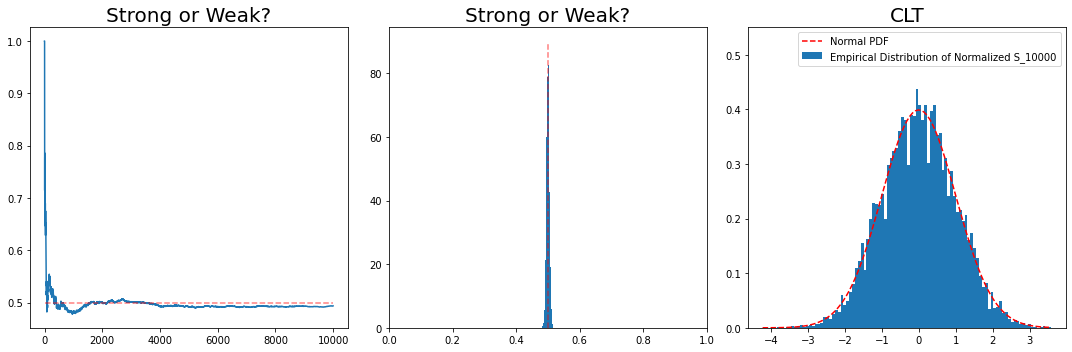

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from scipy import stats


def main():
    n = 1
    p = 0.5
    n_samples = 10_000
    n_coin_flips_for_each_sample = 10_000

    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    
    a = np.random.binomial(n, p, (n_samples,))
    cum_average = np.cumsum(a)/(np.arange(n_samples)+1)
    
    ax0.set_title("Strong or Weak?", fontsize=20)
    ax0.plot(cum_average)
    ax0.plot( ( 0 ,n_samples - 1 ), ( p, p ), 'r--', alpha=0.5)

    a = np.random.binomial(n, p, (n_samples, n_coin_flips_for_each_sample))
    samples = np.sum(a,axis=1) / n_coin_flips_for_each_sample

    ax1.set_title("Strong or Weak?", fontsize=20)
    ax1.hist(samples, bins=100, density=True) 
    ax1.plot( (p, p), (0, 90), '--r', alpha=0.5)
    ax1.set_xlim( (0, 1) )

    mu = samples.mean()
    std = samples.std()
    normalized_samples = (samples - mu) / std
    
    ax2.set_title("CLT", fontsize=20)
    _, bins, _ = ax2.hist( normalized_samples, bins=100, density=True,
                          label=f"Empirical Distribution of Normalized S_{n_samples}")
    
    x = bins
    y = stats.norm().pdf(x)
    
    ax2.plot(x,y,'--r',label='Normal PDF')
    ax2.set_ylim(0, 0.55)
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

####***Section 2 Weak Law of Large Numbers***

***Weak Law of Large Numbers***

$$
\mbox{$X_i$ iid with $E|X_i|<\infty$}
\quad\Rightarrow\quad
\frac{1}{n}\sum_{i=1}^nX_i\rightarrow EX\quad\mbox{in probability}
$$

***Proof (with finite 2nd moment)***

$$\begin{array}{lll}
\mbox{Mean}&&\displaystyle \mathbb{E}\left(\frac{S_n}{n}\right)=\mu\nonumber\\
\mbox{Variance}&&\displaystyle Var\left(\frac{S_n}{n}\right)=\frac{\sigma^2}{n}\nonumber\\
\mbox{Chebyshev}&&\displaystyle \mathbb{P}\left(\left|\frac{S_n}{n}-\mu\right|>\varepsilon\right)\le \frac{Var(\frac{S_n}{n})}{\varepsilon^2}=\frac{\sigma^2/n}{\varepsilon^2}=Cn^{-1}\rightarrow 0\nonumber\\
\end{array}$$

#####***Weak Law of Large Numbers - Coin Flip***

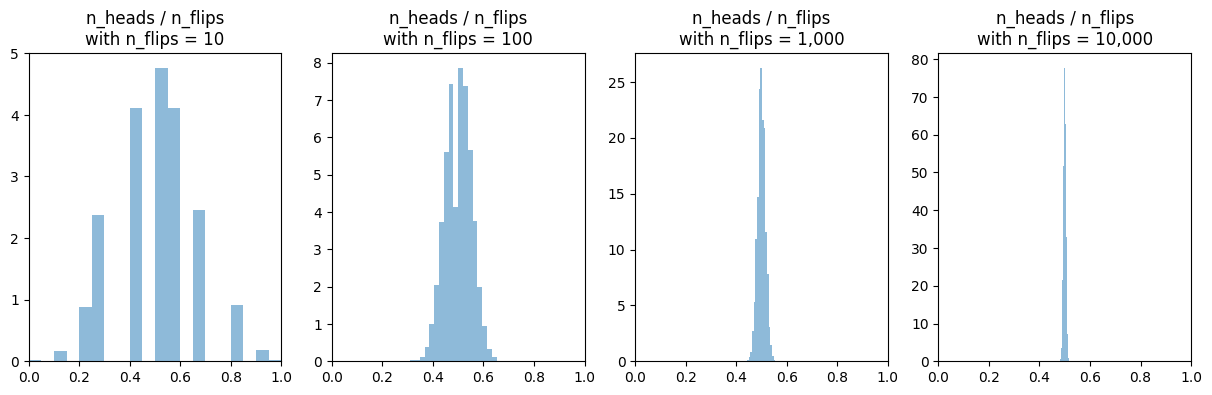

In [22]:
def main():
    p = 0.5
    obj = Coin(p=p)

    num_paths = 10_000 
    num_steps = 10_000 
    seed = 0
    c = obj.run_MC(num_paths=num_paths, num_steps=num_steps, seed=seed)
    cumsum = c.cumsum(axis=1) # number of heads so far

    fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(15,4))
    ax0.hist(cumsum[:,10-1]/10,density=True,alpha=0.5,bins=20)
    ax1.hist(cumsum[:,100-1]/100,density=True,alpha=0.5,bins=20)
    ax2.hist(cumsum[:,1_000-1]/1_000,density=True,alpha=0.5,bins=20)
    ax3.hist(cumsum[:,10_000-1]/10_000,density=True,alpha=0.5,bins=20)
    for ax, n_flips in zip((ax0,ax1,ax2,ax3),(10,100,1_000,10_000)):
        ax.set_title("n_heads / n_flips\nwith n_flips = {:,}".format(n_flips))
        ax.set_xlim(0,1)
    plt.show()

if __name__ == "__main__":
    main()


#####***Weak Law of Large Numbers - Real Data***

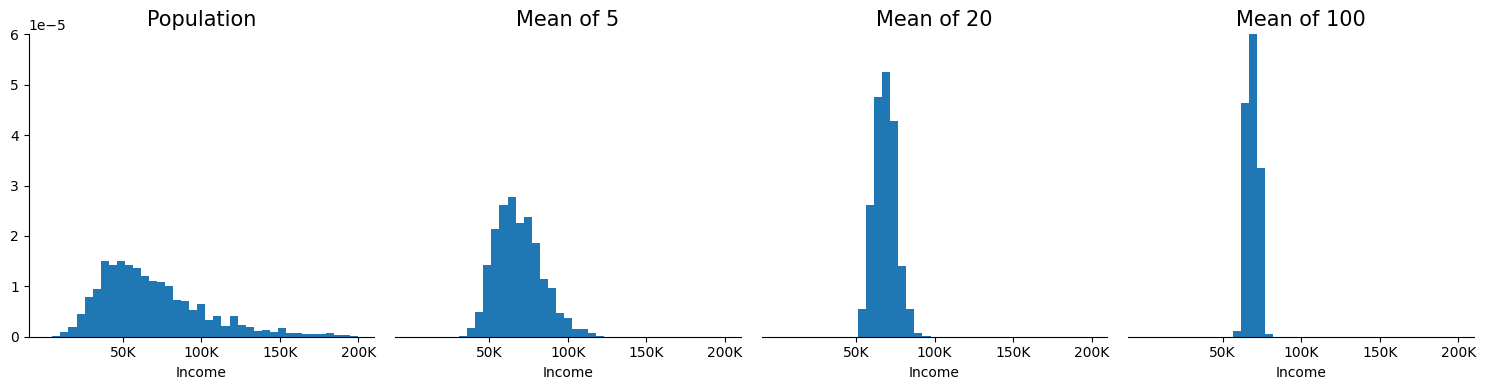

In [25]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    population = pd.read_csv(url)["x"] # pandas series Name: x, Length: 50000, dtype: int64
    sampling_mean_5 = [population.sample(5).mean() for _ in range(1000)]
    sampling_mean_20 = [population.sample(20).mean() for _ in range(1000)]
    sampling_mean_100 = [population.sample(100).mean() for _ in range(1000)]
    
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(15,4))
    
    bins = np.linspace(0, 200000, 40)
    ax0.hist(population, bins=bins, density=True)
    ax1.hist(sampling_mean_5, bins=bins, density=True)
    ax2.hist(sampling_mean_20, bins=bins, density=True)
    ax3.hist(sampling_mean_100, bins=bins, density=True)
    
    for ax, title in zip((ax0,ax1,ax2,ax3),('Population','Mean of 5','Mean of 20','Mean of 100')):
        ax.set_title(title, fontsize=15)
        ax.set_ylim(0,6e-5)
        ax.set_xlabel('Income')
        ax.set_xticks( (50_000,100_000,150_000,200_000) )
        ax.set_xticklabels( ("50K","100K","150K","200K") )
        for location in ('right','top'):
            ax.spines[location].set_visible(False)
        if ax in (ax1, ax2, ax3):
            ax.spines['left'].set_visible(False)
            ax.set_yticks( () )
    
    plt.tight_layout()
    plt.show()

    
if __name__ == "__main__":
    main()

***Coupon Collector Problem***

Let $T_n$ be time to collect all $n$ different coupons. Then

$$
\displaystyle 
\frac{T_n}{n\log n}\rightarrow 1\quad\mbox{in probability}
$$

***Proof***

Let $\tau_i$ be the minimum number of the happy meals that I have to eat
to collect the $i$-th new toy after I get the $(i-1)$-th new toy.
Then,

\begin{eqnarray}
(1)&&\quad\displaystyle T_n=\sum_{i=1}^n\tau_i\nonumber\\
(2)&&\quad\displaystyle \tau_i\ \mbox{is $Geo(\frac{N-(i-1)}{N})$}\nonumber\\
(3)&&\quad\displaystyle \tau_i\ \mbox{are independent}\nonumber
\end{eqnarray}

[Step 1] Compute the mean.

$$
\displaystyle 
\mathbb{E}T_n=\sum_{i=1}^n\mathbb{E}\tau_i=n\left(1+\frac{1}{2}+\frac{1}{3}+\cdots+\frac{1}{n}\right)\sim n\log n
$$

[Step 2] Compute the variance.

$$
\displaystyle 
Var(T_n)=\sum_{i=1}^nVar(\tau_i)\le Cn^2
$$

[Step 3] Apply Chebyshev's inequality.

$$
\displaystyle 
\mathbb{P}\left(\left|\frac{T_n-ET_n}{a_n}\right|>\varepsilon\right)\le \frac{Var(T_n)}{\varepsilon^2a_n^2}\rightarrow 0
$$

where we choose $a_n$ as $a_n=n\log n$ so that

\begin{eqnarray}
(A)&&\displaystyle \frac{Var(T_n)}{a_n^2}\rightarrow 0\nonumber\\
(B)&&\displaystyle \frac{ET_n}{a_n}\rightarrow 1\nonumber
\end{eqnarray}

####***Section 3 Strong Law of Large Numbers***

#####***Strong Law of Large Numbers***



$$
\mbox{$X_i$ iid with $E|X_i|<\infty$}
\quad\Rightarrow\quad
\frac{1}{n}\sum_{i=1}^nX_i\rightarrow EX\quad\mbox{a.s.}
$$



######***Proof (with finite 4th moment)***



\begin{eqnarray}
\sum_{n=1}^{\infty}
\mathbb{E}\left(\frac{S_n-n\mu}{n}\right)^4
\le
C
\sum_{n=1}^{\infty}
n^{-2}
<\infty
&\Rightarrow&
\sum_{n=1}^{\infty}
\left(\frac{S_n-n\mu}{n}\right)^4<\infty
\quad\mbox{a.s.}\nonumber\\
&\Rightarrow&
\left(\frac{S_n-n\mu}{n}\right)^4\rightarrow 0
\quad\mbox{a.s.}\nonumber\\
&\Rightarrow&
\frac{S_n}{n}\rightarrow \mu
\quad\mbox{a.s.}\nonumber
\end{eqnarray}

#####***Coin Flip***

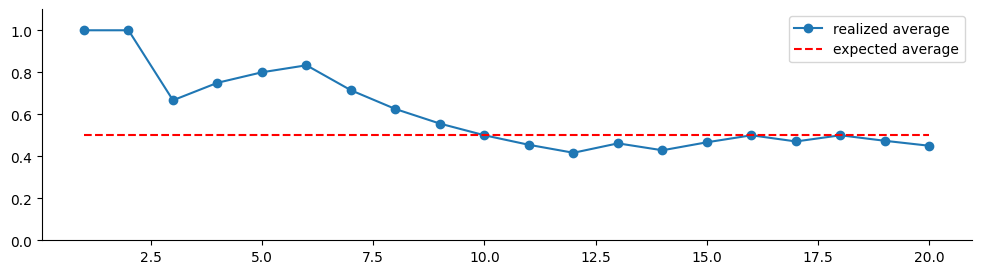

In [ ]:
def main():
    p = 0.5
    obj = Coin(p=p)

    n = 20
    c = obj.run_MC(num_steps=n, seed=3)
    cum_n = np.arange(1,n+1) # number of coin flips so far
    cum_c_expected = 0.5 * cum_n # expected number of coin flips so far
    cum_c = c.cumsum() # number of heads so far

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(cum_n,cum_c/cum_n,"-o",label='realized average')
    ax.plot(cum_n,cum_c_expected/cum_n,'--r',label='expected average')
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,1.1)
    plt.show()

if __name__ == "__main__":
    main()

#####***MontyStick***

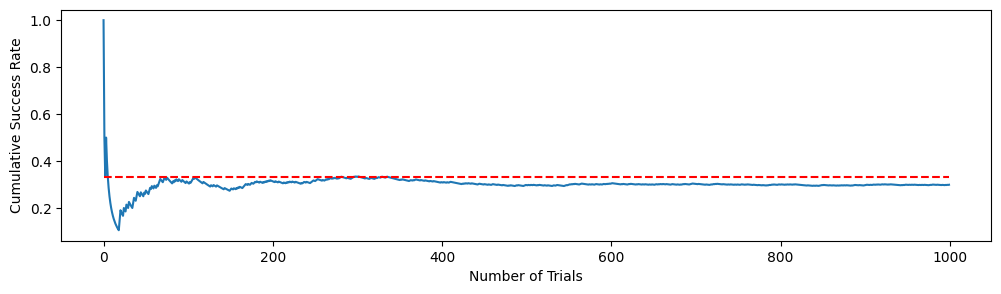

In [ ]:
def main():
    n_tries = 1000
    results = []
    for _ in range(n_tries):
        results.append(MontyStick().run())

    results = np.array(results)
    cum_success_rates = results.cumsum() / np.arange(1, n_tries+1)
    
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(cum_success_rates)
    ax.plot(np.ones_like(cum_success_rates) * (1/3), '--r')
    ax.set_xlabel("Number of Trials")
    ax.set_ylabel("Cumulative Success Rate")
    plt.show()
   
if __name__ == "__main__":
    main()

#####***MontySwitch***

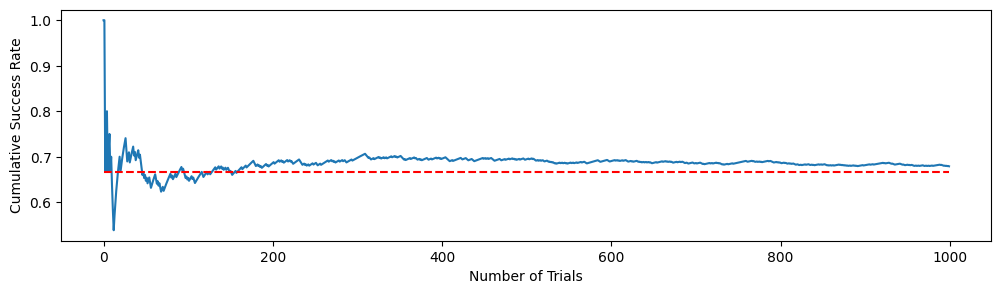

In [ ]:
def main():
    n_tries = 1000
    results = []
    for _ in range(n_tries):
        results.append(MontySwitch().run())

    results = np.array(results)
    cum_success_rates = results.cumsum() / np.arange(1, n_tries+1) 
    
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(cum_success_rates)
    ax.plot(np.ones_like(cum_success_rates) * (2/3), '--r')
    ax.set_xlabel("Number of Trials")
    ax.set_ylabel("Cumulative Success Rate")
    plt.show()
    
if __name__ == "__main__":
    main()

#####***Monte Carlo Estimation of $\pi$***

- Draw $n$ random points $X_i$ from $[0,1]^2$

- Record $R_i$ whether the point is inside of the unit circle.
$$
R_i=\left\{\begin{array}{ll}
1&\mbox{if $X_i$ is inside of the unit circle}\\
0&\mbox{otherwise}
\end{array}\right.
$$

$$
\frac{\pi}{4}\quad=\quad\mathbb{E}R\quad\approx\quad\frac{1}{n}\sum_{i=1}^nR_i
$$
or
$$
\pi\quad\approx\quad\frac{4}{n}\sum_{i=1}^nR_i
$$

Number of generated points: 10000
Estimation of pi          : 3.1472


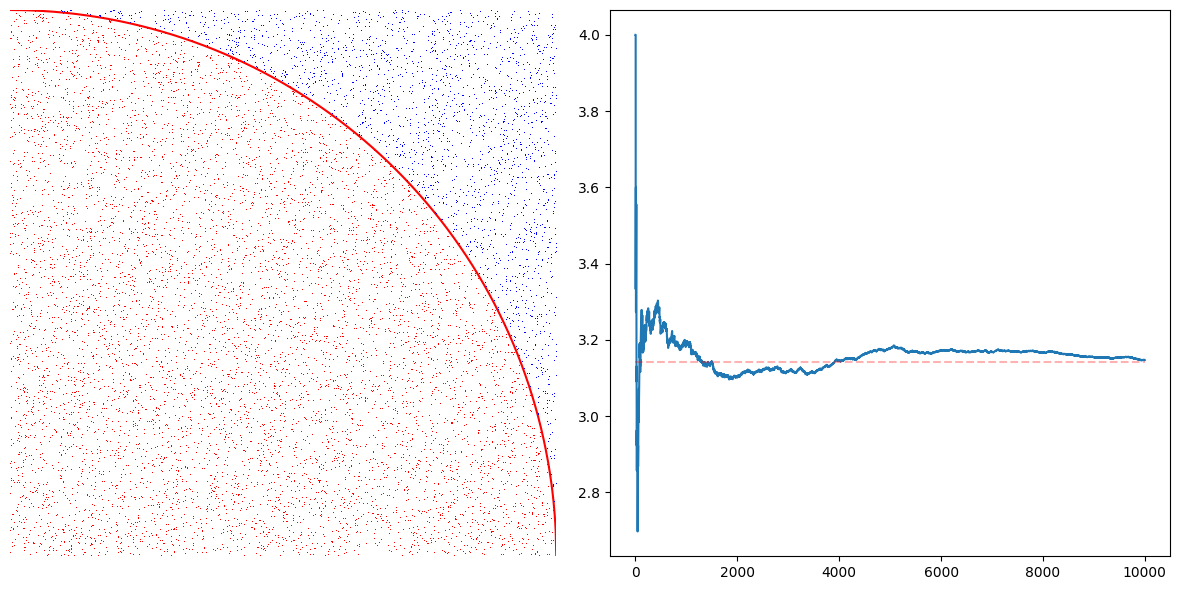

In [ ]:
def main():
    N_POINTS = 10_000

    x = np.random.uniform(0, 1, (2, N_POINTS))
    r_square = np.sum(x**2, axis=0)

    idx = np.zeros_like(r_square)
    idx[r_square<1] = 1

    print(f"Number of generated points: {N_POINTS}")
    print(f"Estimation of pi          : {(4/N_POINTS) * np.sum(idx)}")

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,6))

    ax0.axis([0,1,0,1]) 
    boundary_x = np.linspace(0, 1, 1000)
    boundary_y = np.sqrt(1 - boundary_x**2)
    ax0.plot(boundary_x, boundary_y, 'r')
    ax0.plot(x[0,idx==1], x[1,idx==1], 'r,')
    ax0.plot(x[0,idx==0], x[1,idx==0], 'b,')
    ax0.set_aspect('equal')
    ax0.axis('off')

    ax1.plot(4*np.cumsum(idx)/np.cumsum(np.ones_like(idx)))
    ax1.hlines(y=np.pi,xmin=0,xmax=len(idx)-1,ls='--',color='r',alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####***Buffon's Needle***



- On a paper we draw parallel lines 1 units apart.

- We drop a needle of length 1 onto the paper $n$ times and record $R_i$ whether the needle intersect the line.
$$
R_i=\left\{\begin{array}{ll}
1&\mbox{if the needle intersect the line at the $i$-th drop}\\
0&\mbox{otherwise}
\end{array}\right.
$$

$$
\frac{2}{\pi}\quad=\quad\mathbb{E}R\quad\approx\quad\frac{1}{n}\sum_{i=1}^nR_i
$$
or
$$
\pi\quad\approx\quad\frac{2n}{\sum_{i=1}^nR_i}
$$

<img src="http://www.clayford.net/statistics/wp-content/uploads/2013/02/buf_02.png">

Sorce [Buffon’s Needle Problem, or How to use Probability to Estimate Pi](http://www.clayford.net/statistics/wp-content/uploads/2013/02/buf_02.png)

Number of Needles             :  10000
Monte Carlo Estimate of $\pi$ :  3.1756113051762465


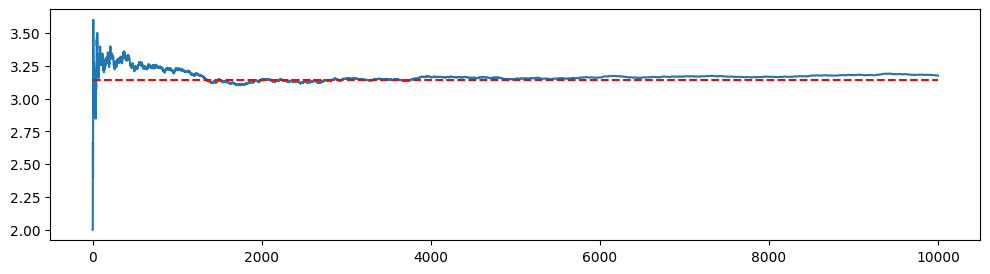

In [ ]:
def main():
    np.random.seed(0)
    n = 10_000                         # Number of random samples generated
    x = np.random.uniform(0, 1, (n,2)) # 0th column = height of lower end, 1st column = angle/pi 
    h = x[:,0] + np.sin(np.pi*x[:,1])  # Height of higher end
    N = np.sum(h>=1)                   # Number of random samples hit the upper bar at y=1
    Estimated_pi = 2*n/N               # Estimated pi
    print("Number of Needles             : ", n)
    print("Monte Carlo Estimate of $\pi$ : ", Estimated_pi)

    # plot of Monte Carlo Estimate of $\pi$ 
    # as a function of Number of Buffon's Needles 
    N_cum = np.cumsum(h>=1) 
    Estimated_pi_cum = 2*(np.arange(0,n)+1)/(N_cum+0.00000001) 

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(Estimated_pi_cum)
    ax.plot([0,n-1],[np.pi,np.pi],'--r')
    plt.show()

if __name__ == "__main__":
    main()

###### ***Simulation - Gamber's Ruin***

Suppose you have $k$ dollar. Each time you are betting 1 dollar  on some gambling
that we will win 1 dollar  with probability $p(\le 1/2)$ and lose 1 dollar  with probability $q:=1-p$.
If you lose all the money, you ruin!

In [ ]:
def main():
    p = 0.49
    initial = 10
    goal = 20
    gambler = GamblerRuin(p=p, initial=initial, goal=goal)

    num_paths = 1_000
    num_steps = 100
    gambler.run_MC(num_paths=num_paths, num_steps=num_steps,seed=0, verbose=True)

    Q = gambler.compute_ruin_probability()
    print(f"ruin probability by exact : {Q[initial]:.2%}")

if __name__ == "__main__":
    main()

num_paths = 1000
num_win = 256.0
num_loss = 383.0
ruin probability by simulation : 59.94%
ruin probability by exact : 59.87%


####***Section 4 CLT + LLN***

Let $X_i$ be iid with $EX_i^2<\infty$.
If we know $\sigma$,

$$
\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
\approx N(0,1)
\quad\mbox{by CLT}
$$

If we don't know $\sigma$,

$$
\frac{\bar{X}-\mu}{S/\sqrt{n}}
\approx N(0,1)
\quad\mbox{by CLT + LLN}
$$

where
$$
\bar{X}=\frac{1}{n}\sum_{i=1}^nX_i
\quad\mbox{and}\quad
S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X})^2
$$

***Proof***

\begin{eqnarray}
\displaystyle 
\sum_{i=1}^n(X_i-\mu)^2
&=&\displaystyle \sum_{i=1}^n((X_i-\bar{X})+(\bar{X}-\mu))^2\nonumber\\
&=&\displaystyle \sum_{i=1}^n(X_i-\bar{X})^2+n(\bar{X}-\mu)^2+2(\bar{X}-\mu)\sum_{i=1}^n(X_i-\bar{X})\nonumber\\
&=&\displaystyle \sum_{i=1}^n(X_i-\bar{X})^2+n(\bar{X}-\mu)^2\nonumber
\end{eqnarray}

$$
\displaystyle 
\frac{1}{n-1}\sum_{i=1}^n(X_i-\mu)^2
=S^2+\frac{n}{n-1}(\bar{X}-\mu)^2\nonumber
$$

$$
\displaystyle 
P(|\bar{X}-\mu|\ge\varepsilon)\le\frac{\sigma^2/n}{\varepsilon^2}\rightarrow 0,\quad
\frac{1}{n}\sum_{i=1}^n(X_i-\mu)^2
\rightarrow \sigma^2
\quad\Rightarrow\quad
S^2\rightarrow \sigma^2
$$